In [1]:
import wandb
from tqdm import tqdm
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
from datas.dataset1 import make_dataset
import torch.optim as optim
from datas.config import cfg
from models.apple_model import Efficientnet_AppleClassifier, Densenet_AppleClassifier, Resnet_AppleClassifier
from trains.train_model import run

In [2]:
!pip install wandb -qU

print("Installation is completed successfully.")

Installation is completed successfully.


In [3]:
# Log in to your W&B account
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tkdtn121 (sangsatan). Use `wandb login --relogin` to force relogin


True

## 데이터 로드

In [4]:
image_size=cfg['image_size']
batch_size = cfg['batch_size']
image_dir_train = './datas/train/'
csv_dir_train = './datas/train/'

image_dir_val = './datas/validation/'
csv_dir_val = './datas/validation/'

image_dir_test = './datas/test/'
csv_dir_test = './datas/test/'

# 데이터셋 생성
train_set = make_dataset(
    image_dir=image_dir_train,
    csv_dir=csv_dir_train,
    image_size=image_size
)

val_set = make_dataset(
    image_dir=image_dir_val,
    csv_dir=csv_dir_val,
    image_size=image_size
)

test_set = make_dataset(
    image_dir=image_dir_test,
    csv_dir=csv_dir_test,
    image_size=image_size
)

# DataLoader 생성
train_loader = DataLoader(
    train_set, 
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True,
    num_workers=0
)

val_loader = DataLoader(
    val_set, 
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
    num_workers=0
)

test_loader = DataLoader(
    test_set, 
    batch_size=batch_size,
    shuffle=True,
)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Resnet_AppleClassifier(cfg).to(device)
optimizer = optim.Adam(model.parameters(), lr=cfg['learning_rate'], weight_decay=cfg['weight_decay'])  # L2 정규화 적용
# 스케줄러 설정
scheduler = StepLR(optimizer, step_size=cfg['step_size'], gamma=cfg['gamma'])
criterion = nn.CrossEntropyLoss()

c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# 최고 성능 추적
best_accuracy = 0.0

Training:   0%|          | 0/67 [00:00<?, ?it/s]c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Validating: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it]


Epoch 1, Train Loss: 0.9934, Train Accuracy: 0.7439, Val Loss: 1.3126, Val Accuracy: 0.5417
Saved best model with accuracy: 0.5417


Training:   0%|          | 0/67 [00:00<?, ?it/s]c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Validating: 100%|██████████| 9/9 [00:14<00:00,  1.60s/it]


Epoch 2, Train Loss: 0.5033, Train Accuracy: 0.8343, Val Loss: 6.8843, Val Accuracy: 0.5694
Saved best model with accuracy: 0.5694


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it]


Epoch 3, Train Loss: 0.3982, Train Accuracy: 0.8870, Val Loss: 3.8480, Val Accuracy: 0.6667
Saved best model with accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.67s/it]


Epoch 4, Train Loss: 0.2402, Train Accuracy: 0.9134, Val Loss: 5.6649, Val Accuracy: 0.5556


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]
c:\result\trains\Evaluation_Metrics.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Epoch 5, Train Loss: 0.2922, Train Accuracy: 0.9209, Val Loss: 5.6535, Val Accuracy: 0.7500
Saved best model with accuracy: 0.7500


Training: 100%|██████████| 67/67 [07:08<00:00,  6.40s/it]
c:\result\trains\Evaluation_Metrics.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figsize=(8, 8))
Validating: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]


Epoch 6, Train Loss: 0.1683, Train Accuracy: 0.9454, Val Loss: 2.8063, Val Accuracy: 0.7778
Saved best model with accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it]


Epoch 7, Train Loss: 0.1044, Train Accuracy: 0.9586, Val Loss: 5.1796, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.68s/it]


Epoch 8, Train Loss: 0.0770, Train Accuracy: 0.9699, Val Loss: 2.9339, Val Accuracy: 0.7917
Saved best model with accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.62s/it]


Epoch 9, Train Loss: 0.1153, Train Accuracy: 0.9548, Val Loss: 4.5819, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.57s/it]


Epoch 10, Train Loss: 0.0614, Train Accuracy: 0.9793, Val Loss: 2.6083, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 11, Train Loss: 0.0989, Train Accuracy: 0.9661, Val Loss: 2.2444, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 12, Train Loss: 0.0796, Train Accuracy: 0.9699, Val Loss: 1.8487, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 13, Train Loss: 0.0236, Train Accuracy: 0.9906, Val Loss: 2.5570, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 14, Train Loss: 0.0293, Train Accuracy: 0.9906, Val Loss: 3.7454, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]


Epoch 15, Train Loss: 0.0641, Train Accuracy: 0.9680, Val Loss: 3.8820, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it]


Epoch 16, Train Loss: 0.0965, Train Accuracy: 0.9699, Val Loss: 2.6350, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]


Epoch 17, Train Loss: 0.0556, Train Accuracy: 0.9793, Val Loss: 2.5273, Val Accuracy: 0.7500


Validating: 100%|██████████| 9/9 [00:16<00:00,  1.81s/it]


Epoch 18, Train Loss: 0.0589, Train Accuracy: 0.9718, Val Loss: 3.0718, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.69s/it]


Epoch 19, Train Loss: 0.0548, Train Accuracy: 0.9793, Val Loss: 2.8829, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it]


Epoch 20, Train Loss: 0.0379, Train Accuracy: 0.9849, Val Loss: 3.3282, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.69s/it]


Epoch 21, Train Loss: 0.0659, Train Accuracy: 0.9699, Val Loss: 2.7575, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it]


Epoch 22, Train Loss: 0.0567, Train Accuracy: 0.9793, Val Loss: 3.5020, Val Accuracy: 0.7083


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]


Epoch 23, Train Loss: 0.0267, Train Accuracy: 0.9887, Val Loss: 2.7741, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.71s/it]


Epoch 24, Train Loss: 0.0414, Train Accuracy: 0.9868, Val Loss: 3.5691, Val Accuracy: 0.6528


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]


Epoch 25, Train Loss: 0.0835, Train Accuracy: 0.9736, Val Loss: 2.8649, Val Accuracy: 0.7361


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it]


Epoch 26, Train Loss: 0.0637, Train Accuracy: 0.9736, Val Loss: 3.0248, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


Epoch 27, Train Loss: 0.0545, Train Accuracy: 0.9831, Val Loss: 3.7667, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]


Epoch 28, Train Loss: 0.0515, Train Accuracy: 0.9774, Val Loss: 3.1676, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it]


Epoch 29, Train Loss: 0.0369, Train Accuracy: 0.9887, Val Loss: 2.9626, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it]


Epoch 30, Train Loss: 0.0389, Train Accuracy: 0.9812, Val Loss: 2.3450, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it]


Epoch 31, Train Loss: 0.0635, Train Accuracy: 0.9868, Val Loss: 3.1044, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]


Epoch 32, Train Loss: 0.0829, Train Accuracy: 0.9680, Val Loss: 2.7291, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:16<00:00,  1.84s/it]


Epoch 33, Train Loss: 0.0656, Train Accuracy: 0.9793, Val Loss: 3.1381, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]


Epoch 34, Train Loss: 0.0403, Train Accuracy: 0.9887, Val Loss: 2.9062, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 35, Train Loss: 0.0500, Train Accuracy: 0.9831, Val Loss: 3.0984, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 36, Train Loss: 0.0477, Train Accuracy: 0.9812, Val Loss: 1.7134, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 37, Train Loss: 0.0512, Train Accuracy: 0.9774, Val Loss: 2.7833, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 38, Train Loss: 0.0486, Train Accuracy: 0.9868, Val Loss: 3.1101, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 39, Train Loss: 0.0478, Train Accuracy: 0.9831, Val Loss: 2.8997, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 40, Train Loss: 0.0666, Train Accuracy: 0.9755, Val Loss: 2.9685, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 41, Train Loss: 0.0348, Train Accuracy: 0.9925, Val Loss: 2.7019, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]


Epoch 42, Train Loss: 0.0415, Train Accuracy: 0.9887, Val Loss: 2.2258, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 43, Train Loss: 0.0517, Train Accuracy: 0.9755, Val Loss: 2.4702, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 44, Train Loss: 0.0772, Train Accuracy: 0.9736, Val Loss: 2.4083, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 45, Train Loss: 0.0456, Train Accuracy: 0.9849, Val Loss: 3.1528, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 46, Train Loss: 0.0674, Train Accuracy: 0.9736, Val Loss: 3.1795, Val Accuracy: 0.7500


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


Epoch 47, Train Loss: 0.0375, Train Accuracy: 0.9831, Val Loss: 3.1396, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]


Epoch 48, Train Loss: 0.0376, Train Accuracy: 0.9868, Val Loss: 2.7766, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]


Epoch 49, Train Loss: 0.0677, Train Accuracy: 0.9718, Val Loss: 3.2667, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 50, Train Loss: 0.0594, Train Accuracy: 0.9736, Val Loss: 2.8380, Val Accuracy: 0.8056
Saved best model with accuracy: 0.8333


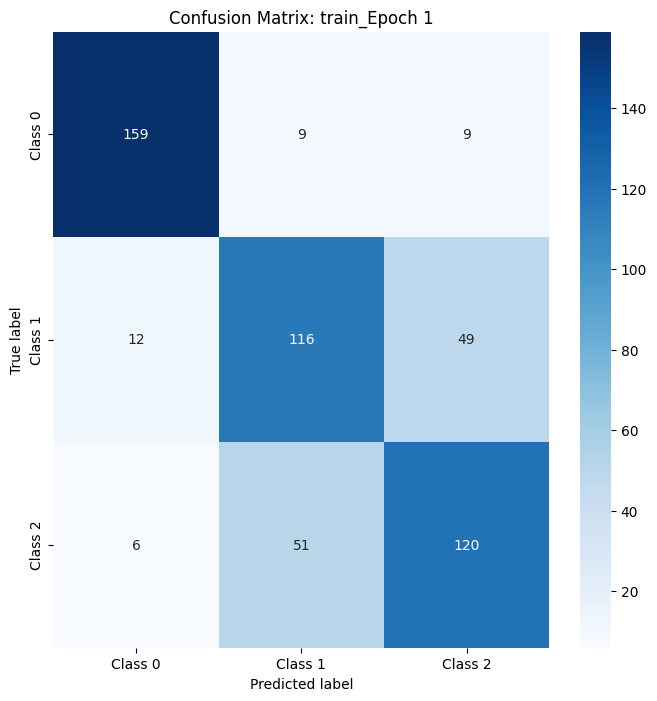

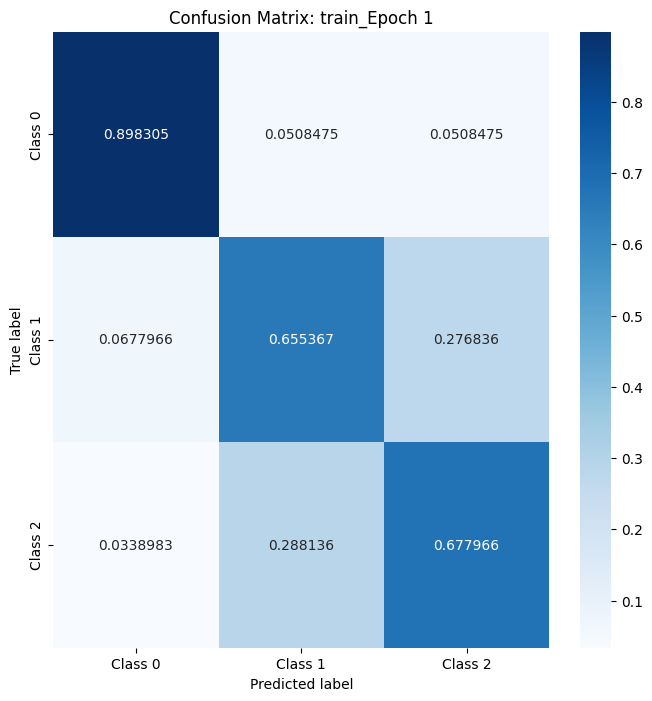

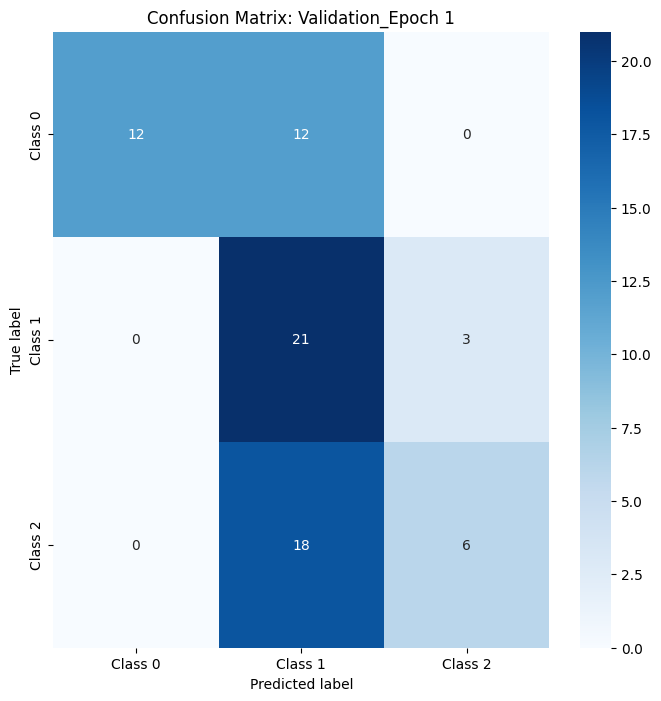

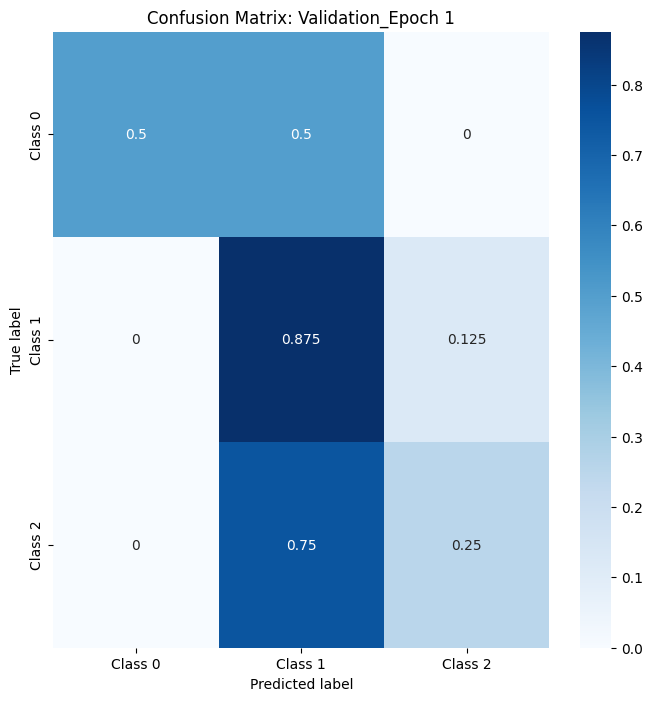

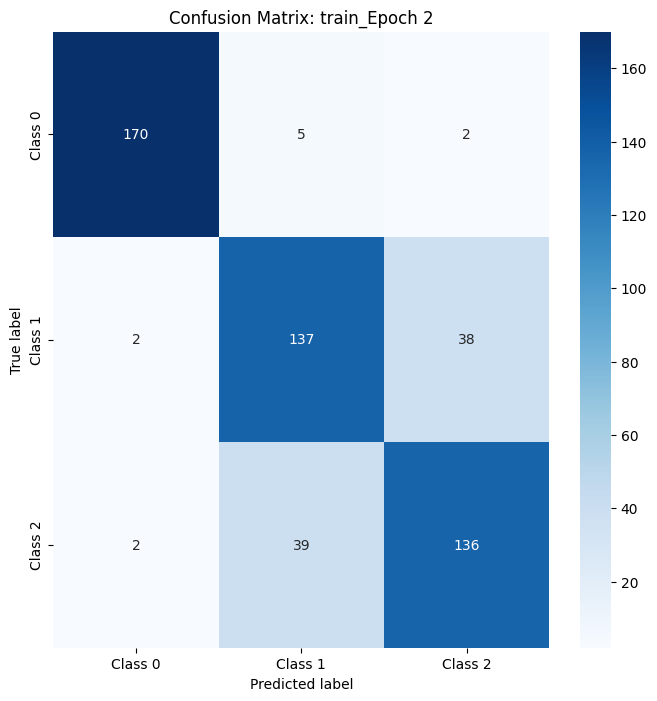

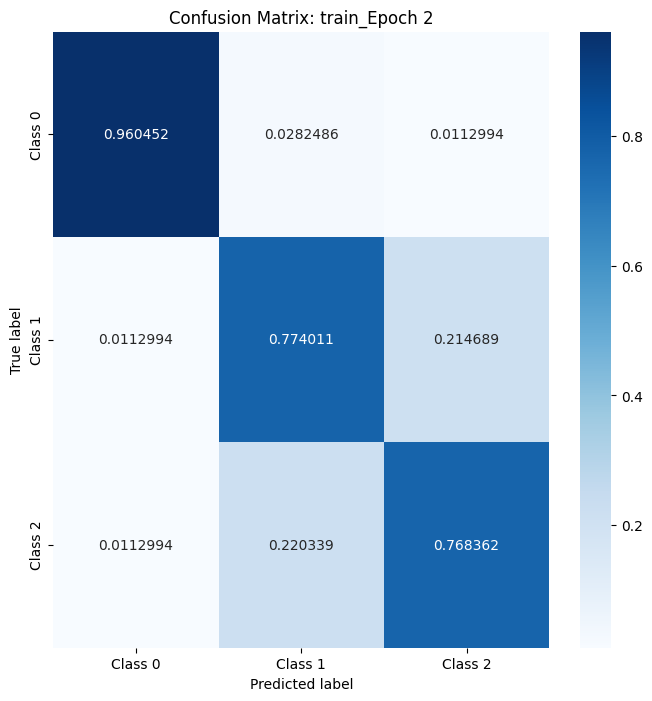

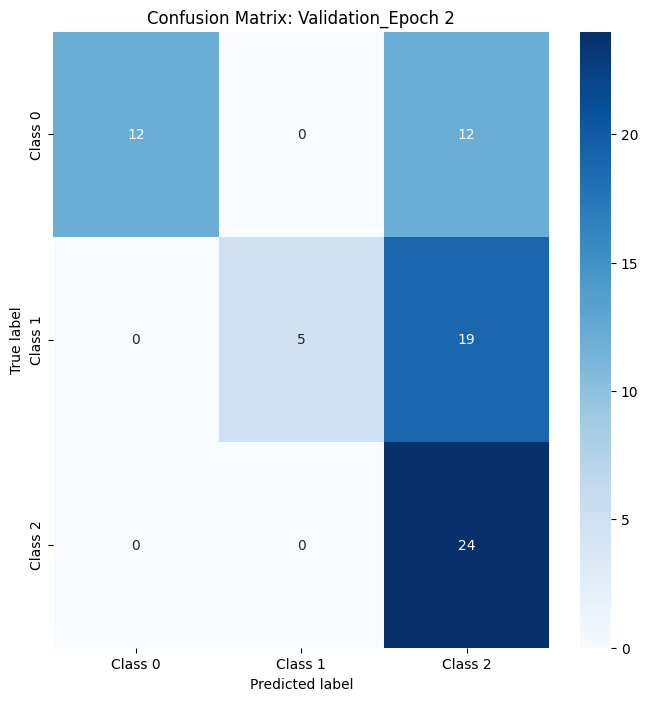

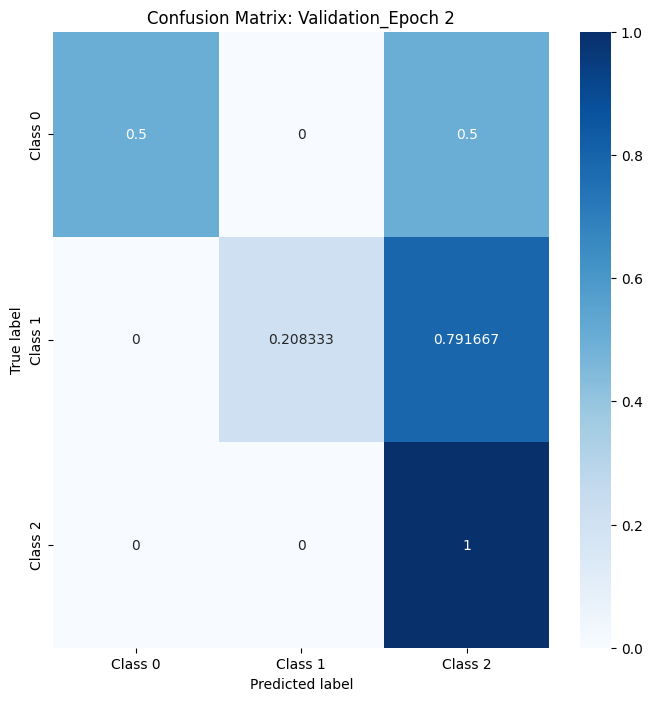

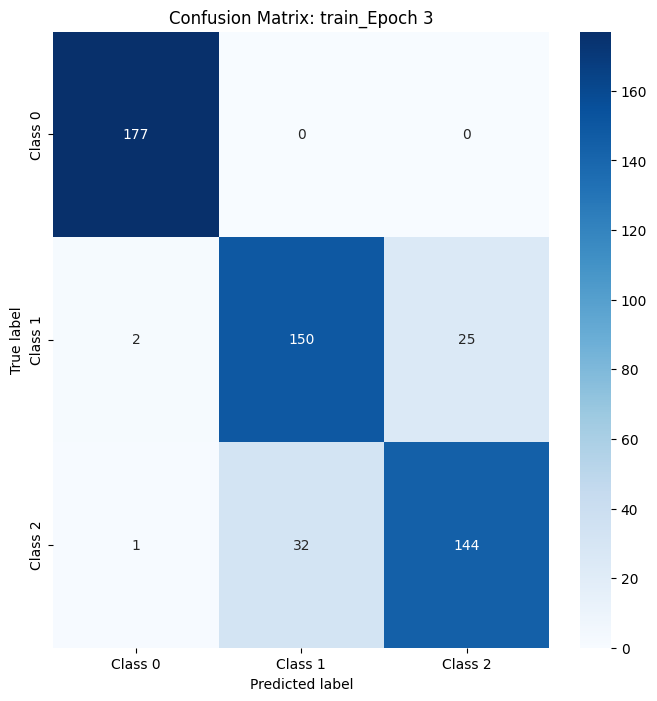

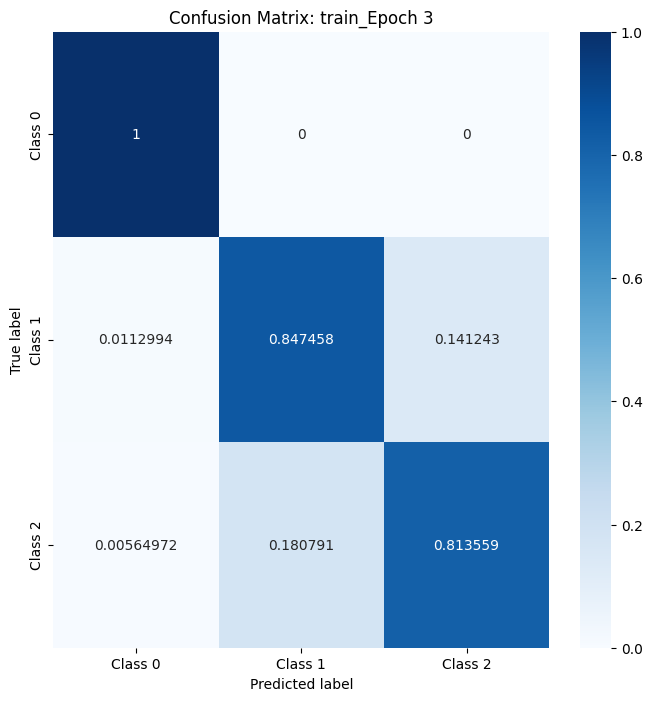

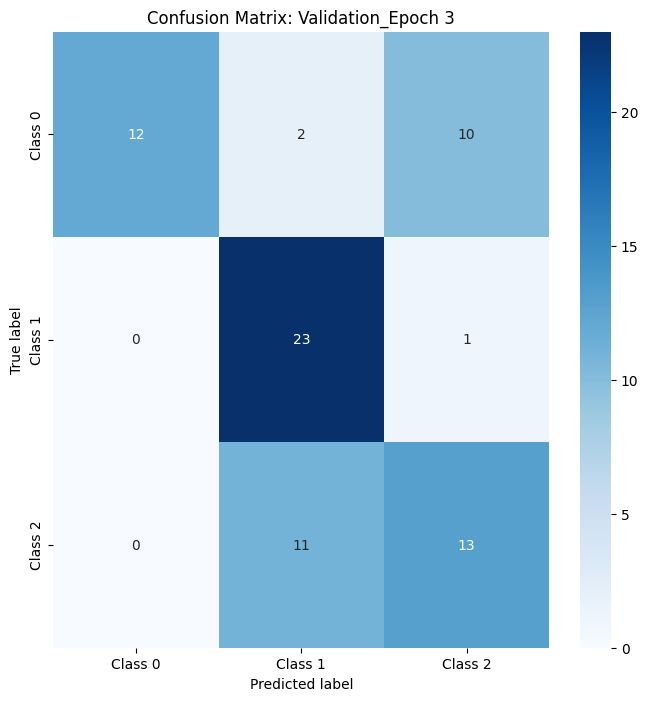

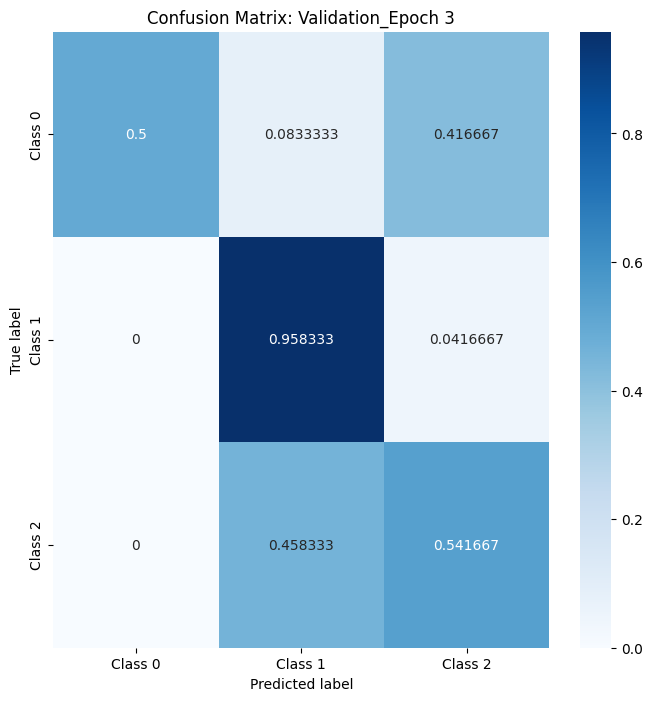

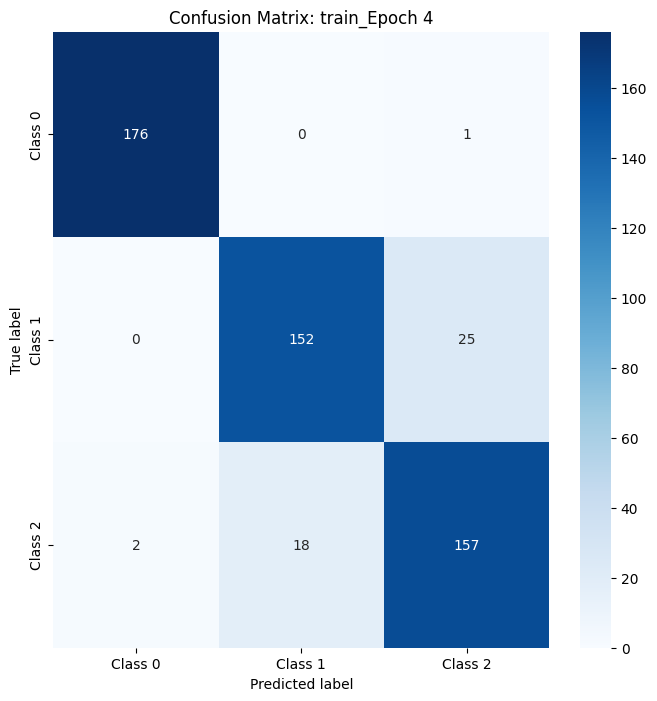

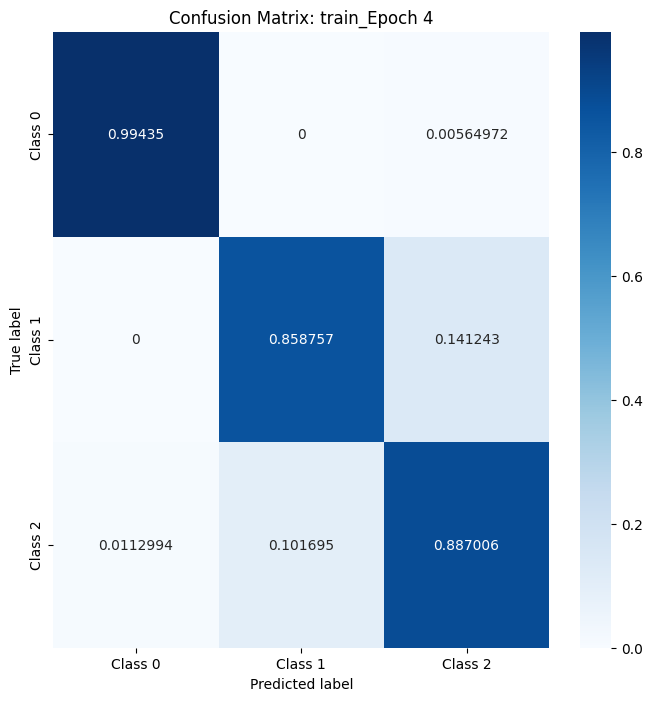

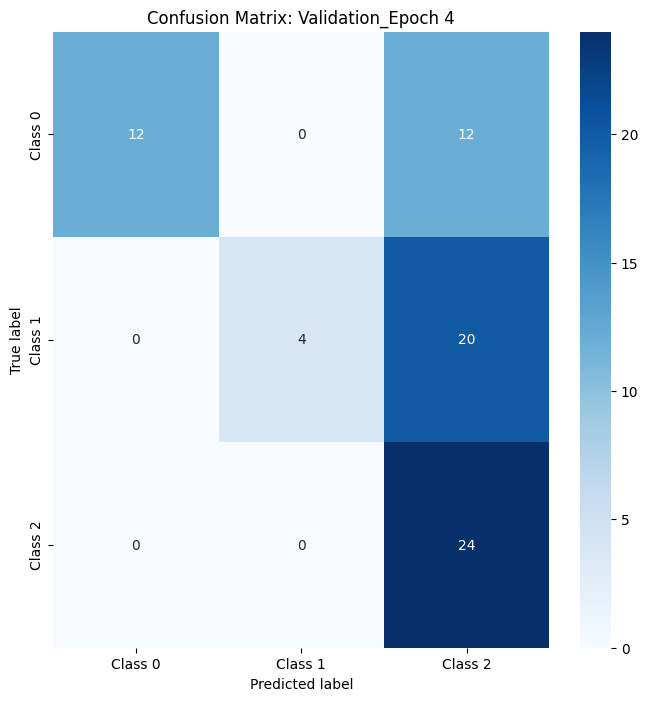

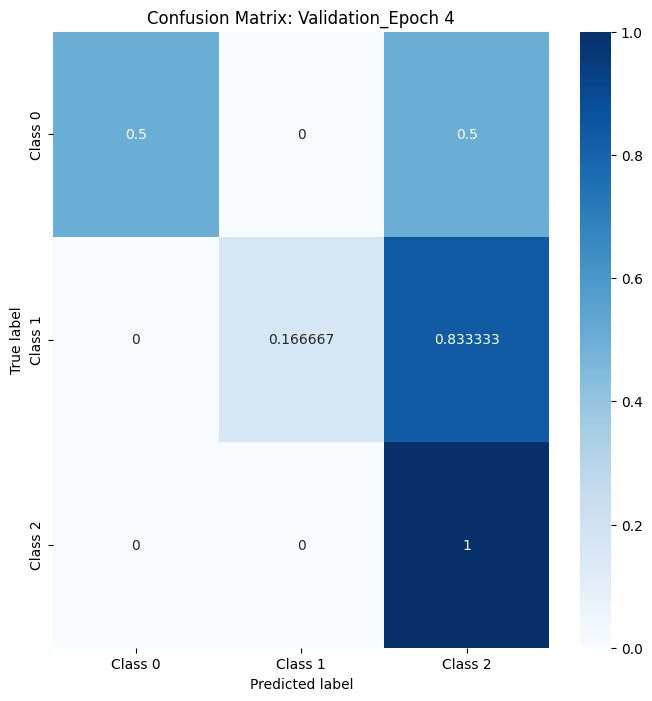

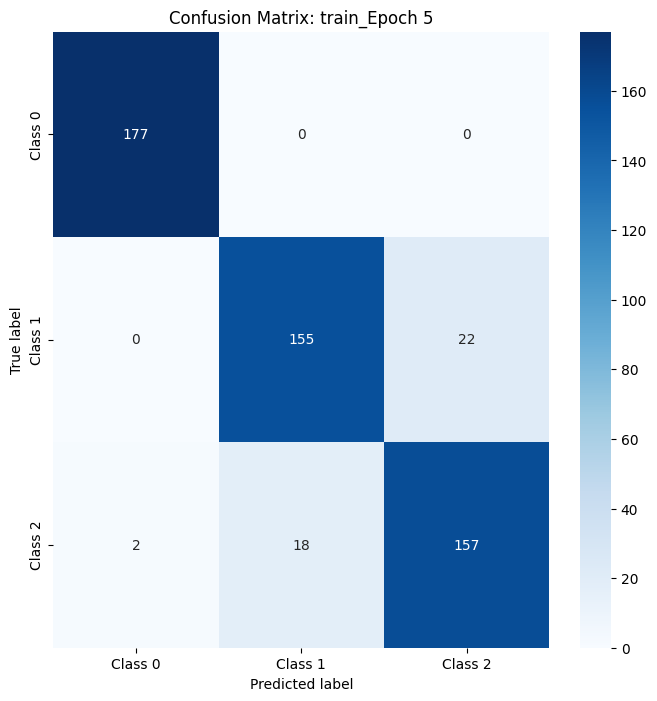

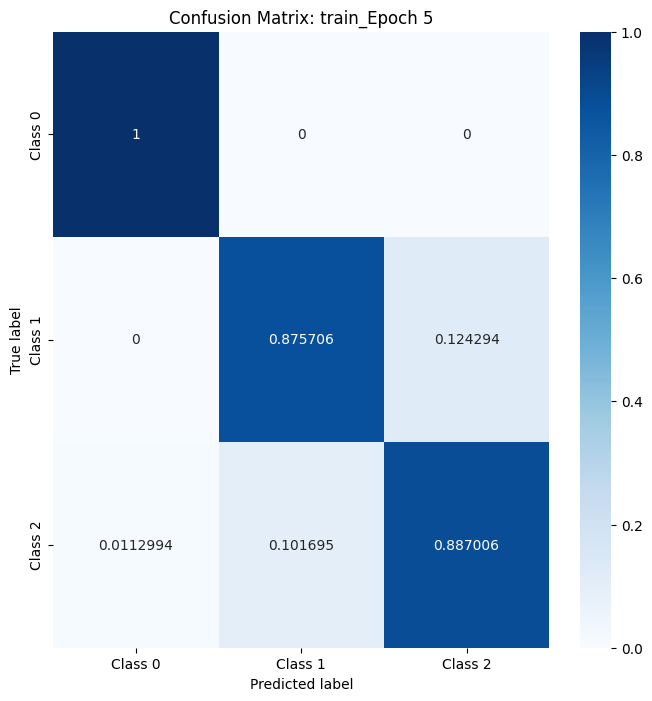

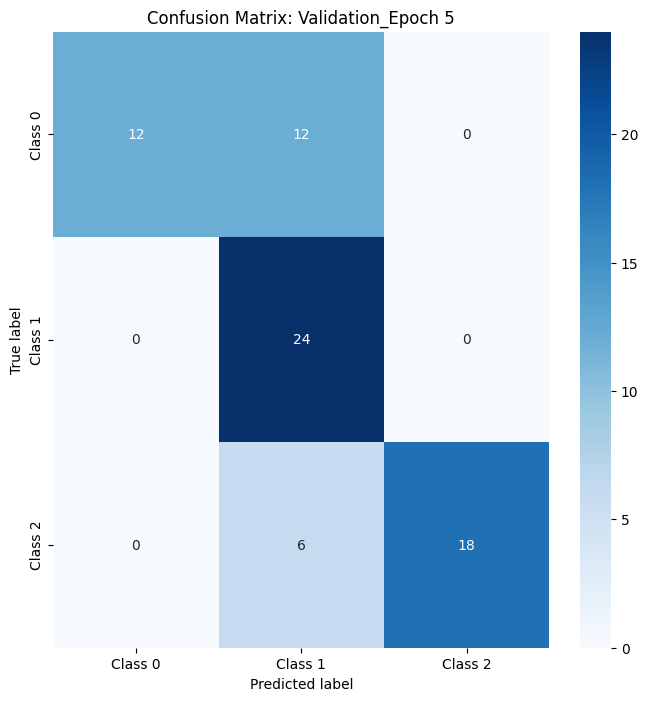

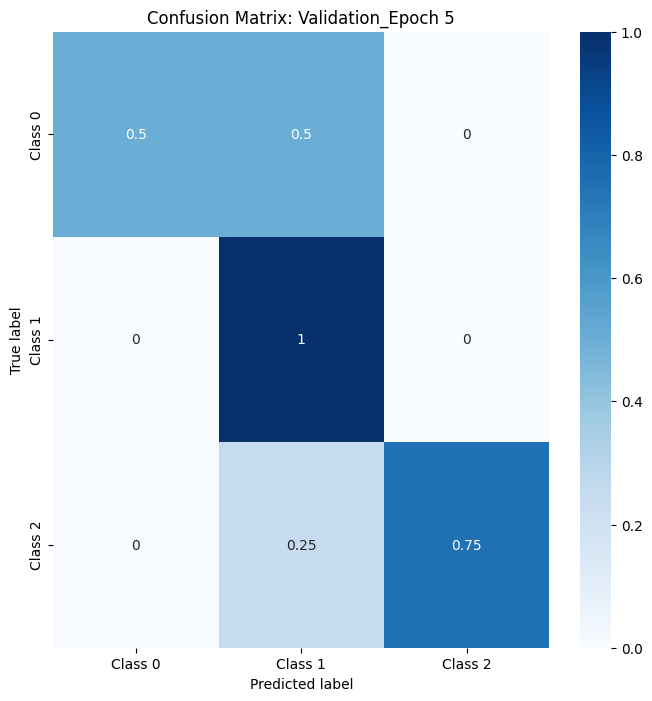

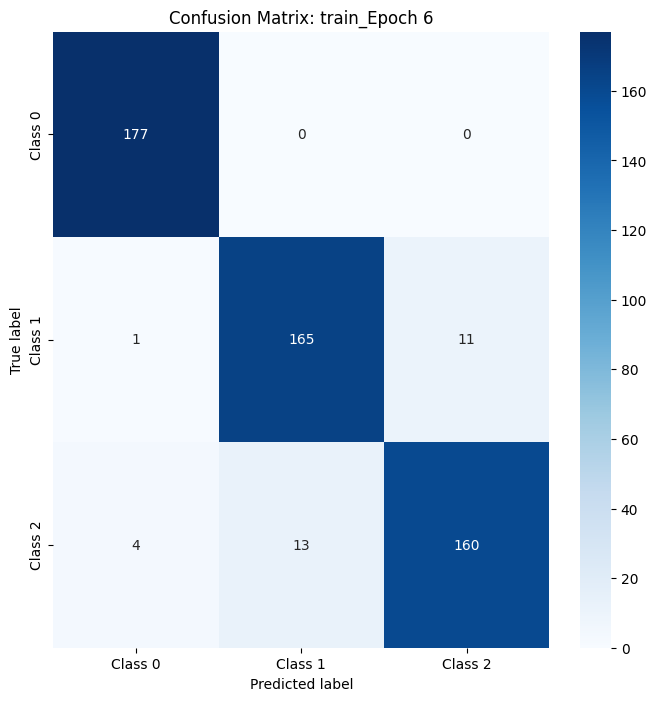

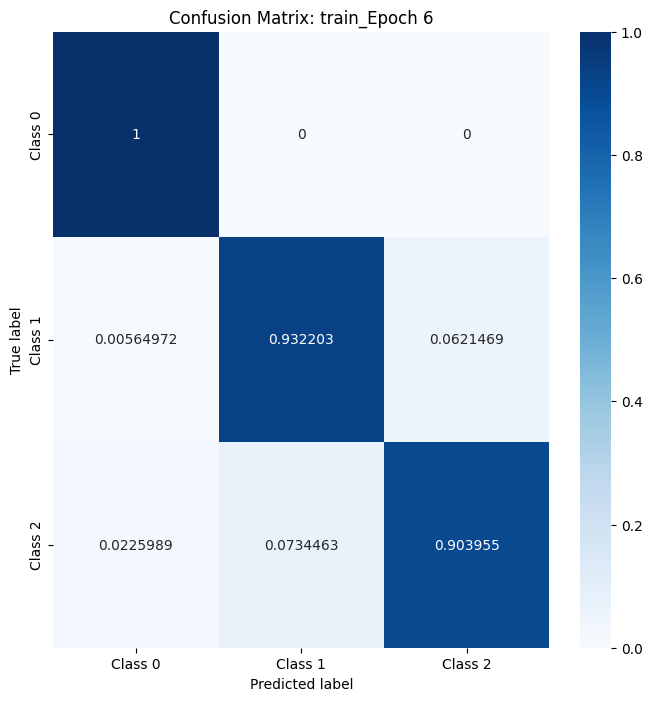

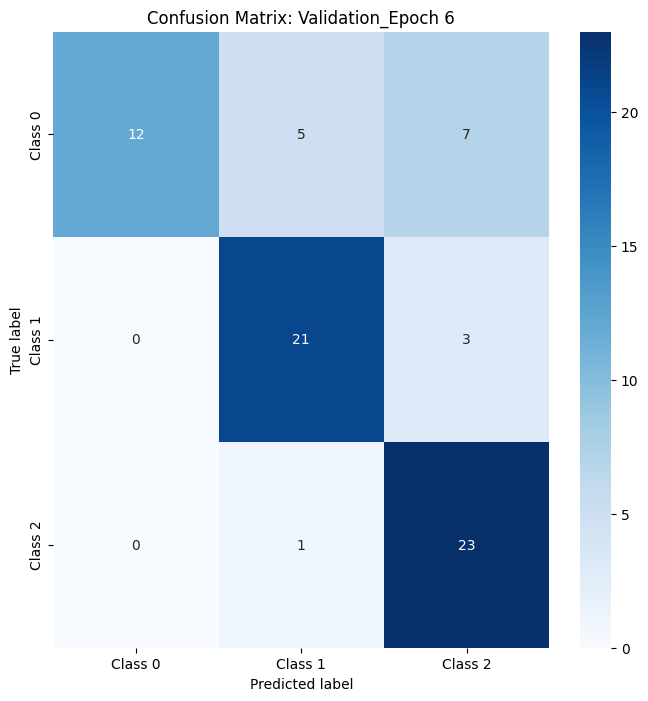

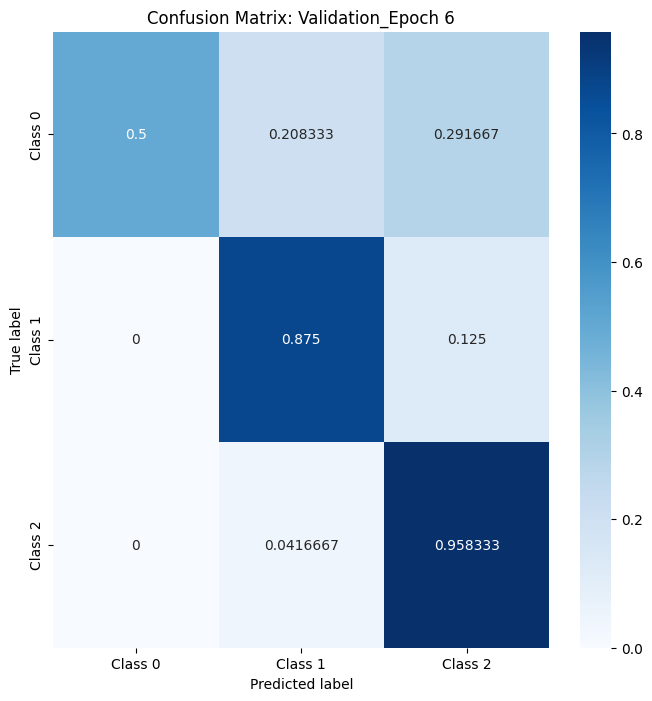

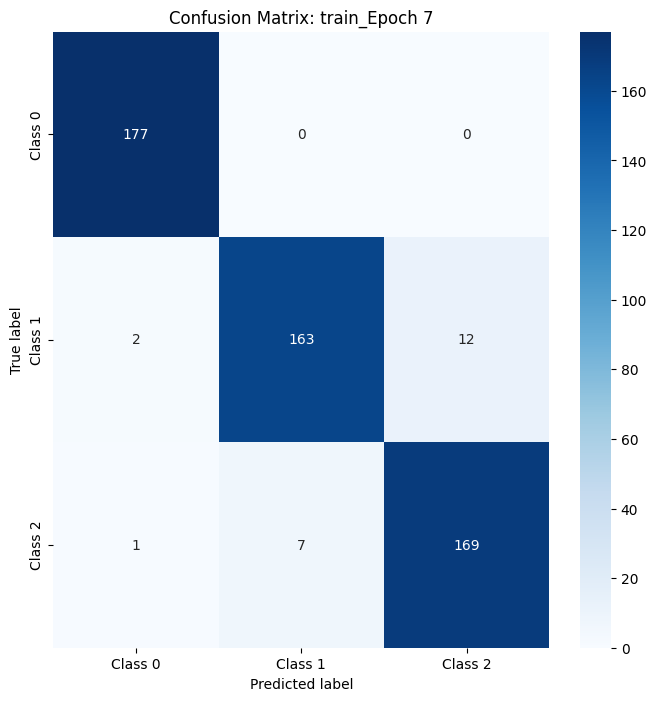

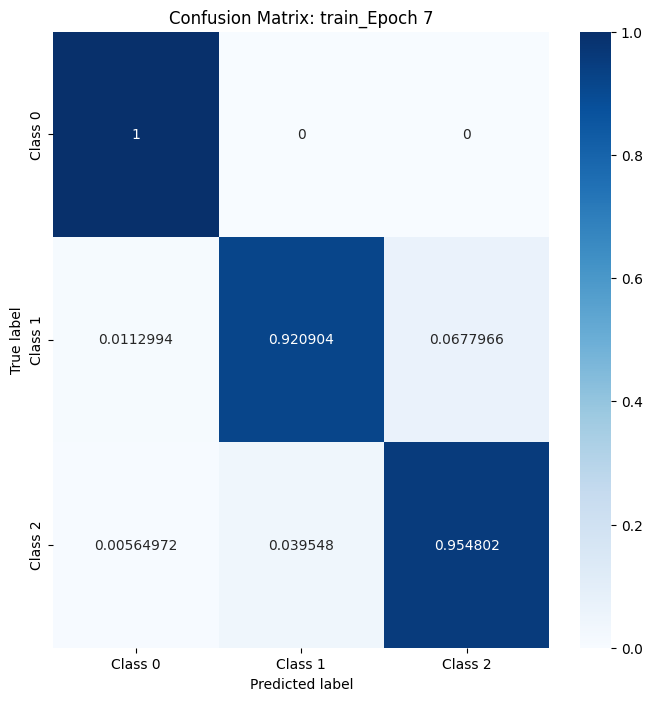

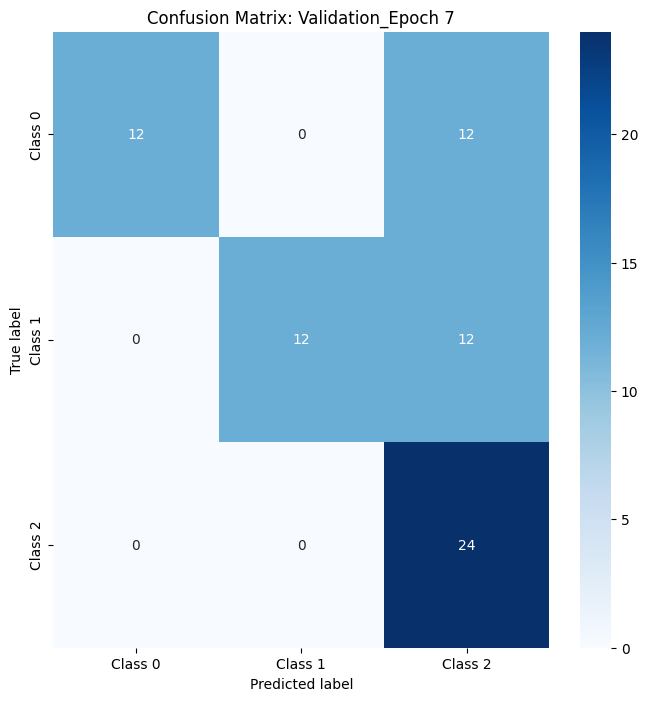

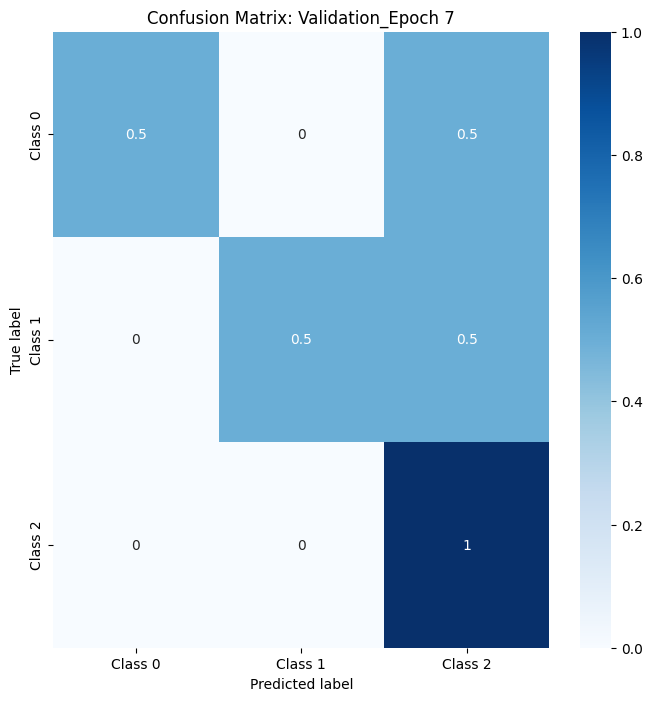

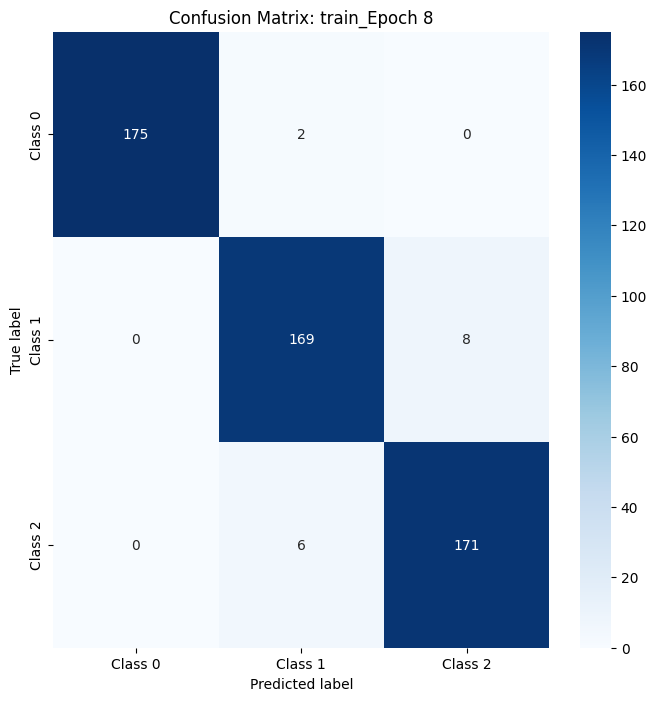

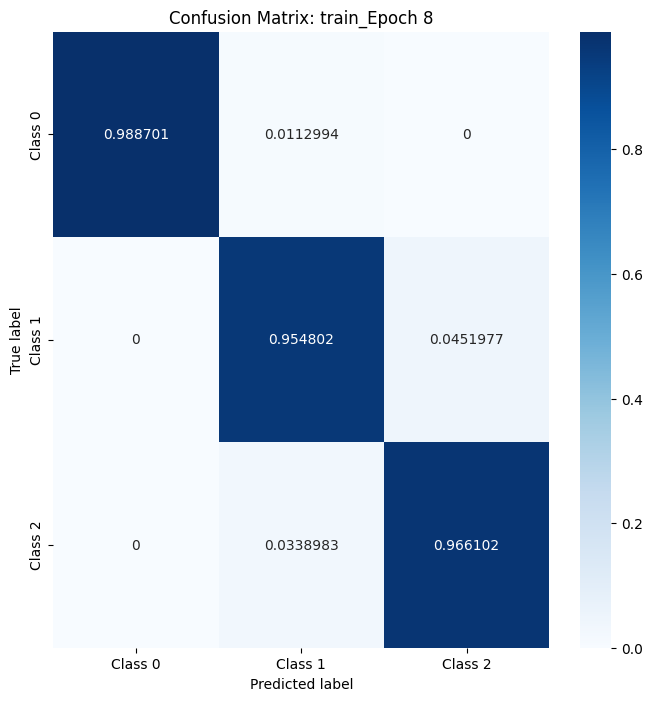

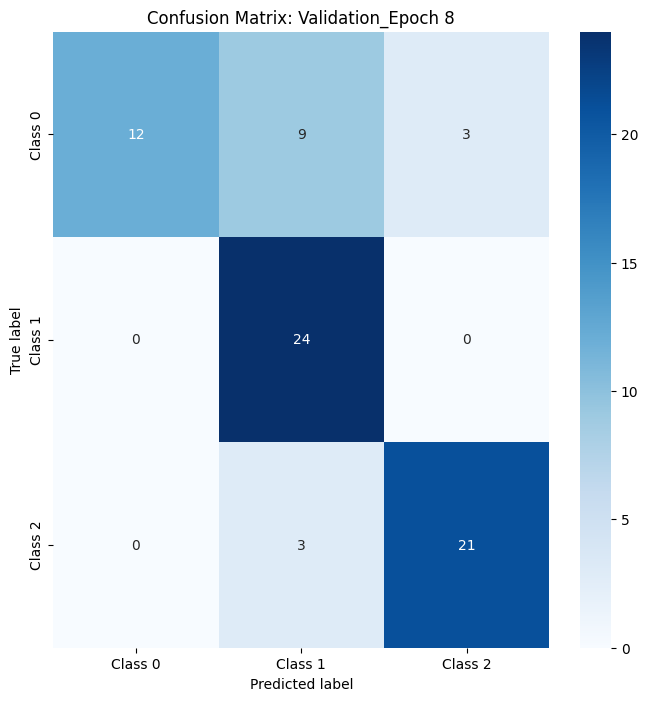

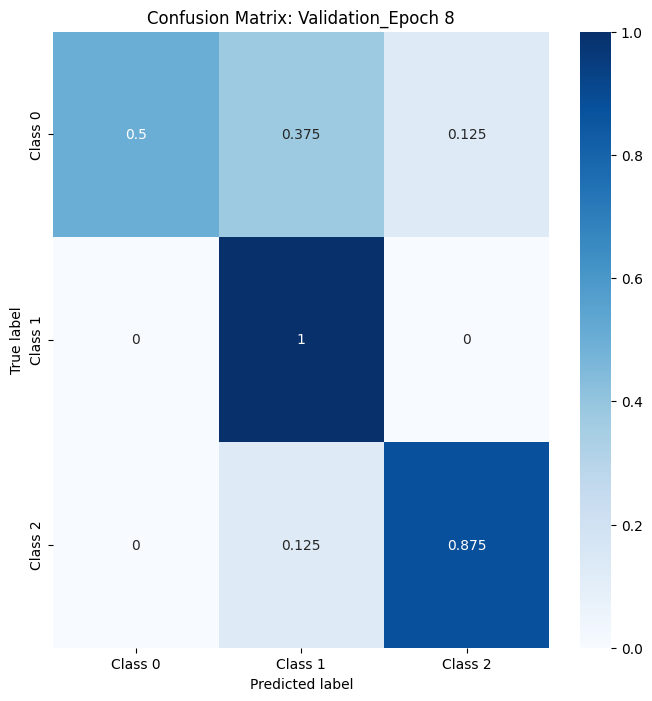

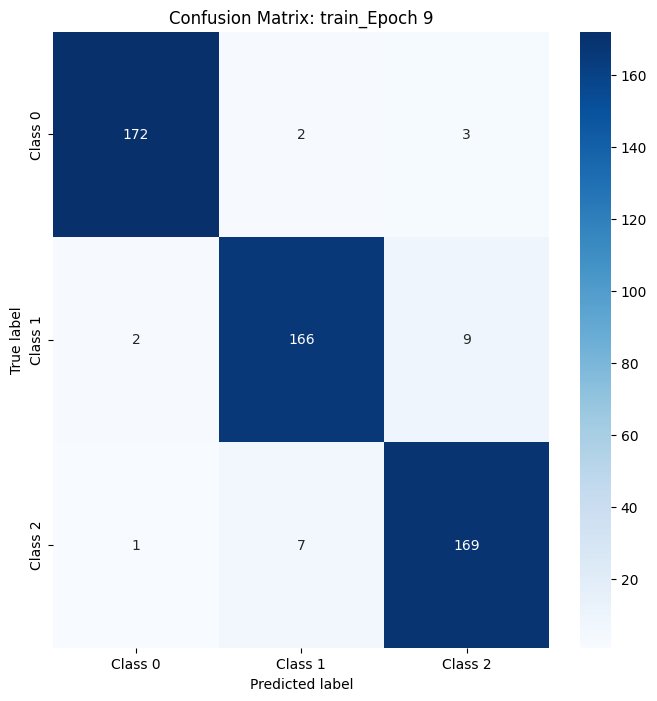

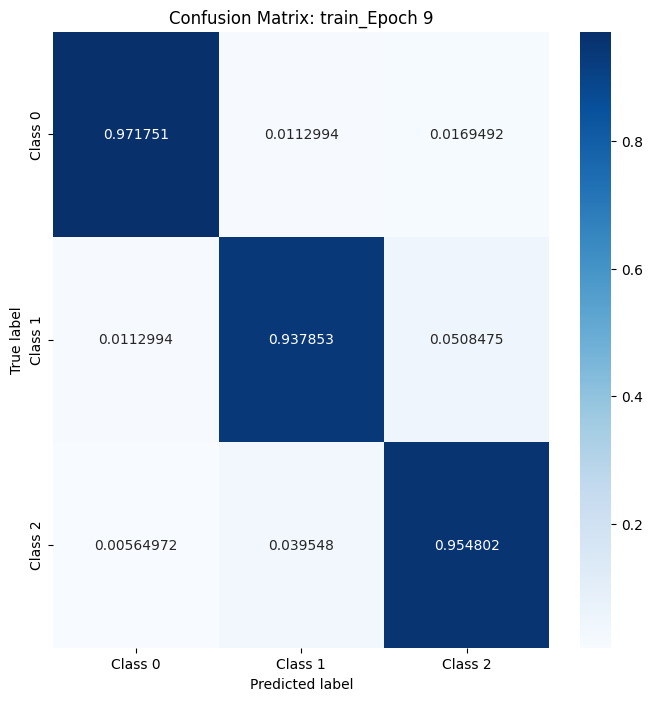

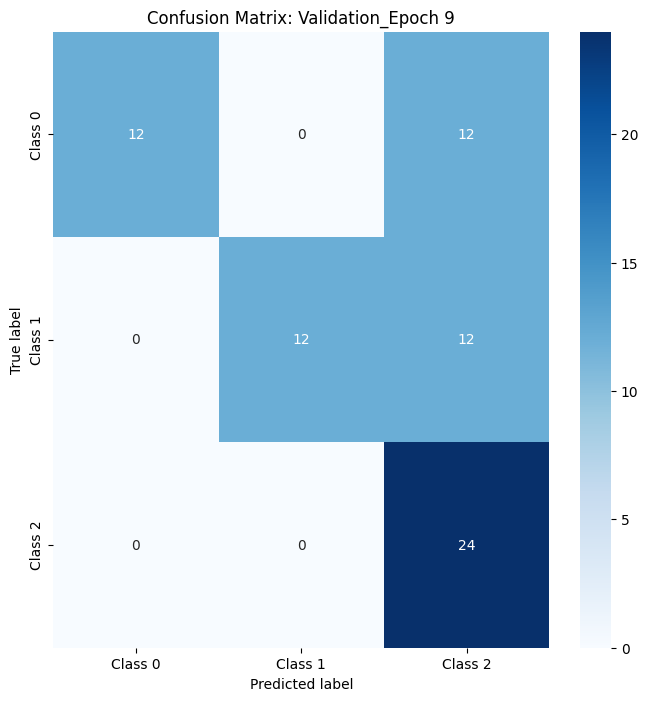

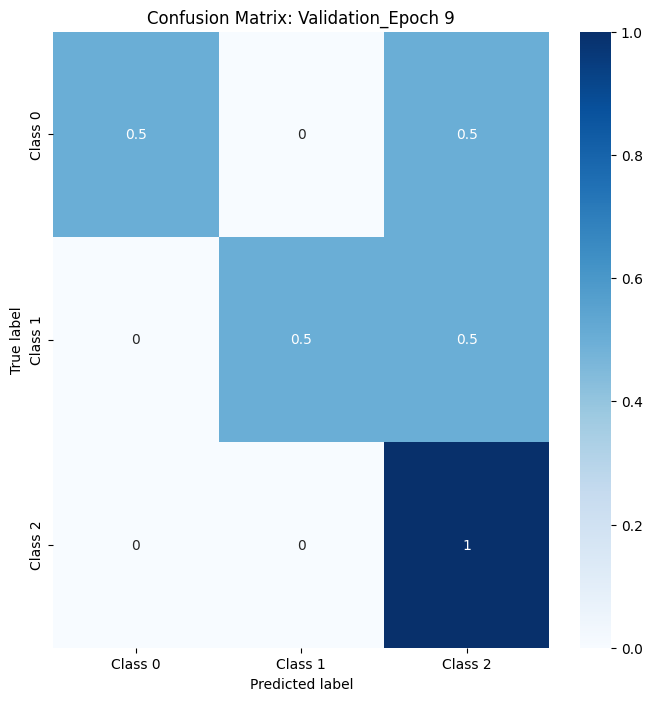

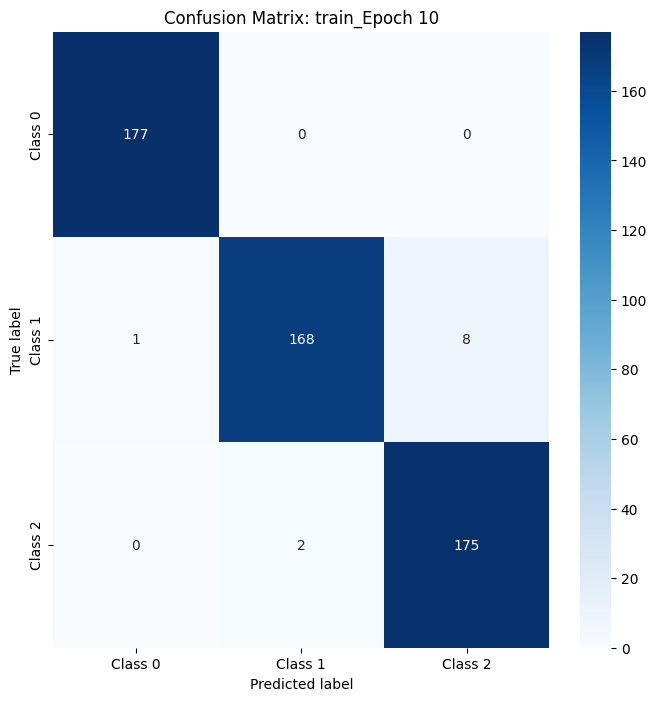

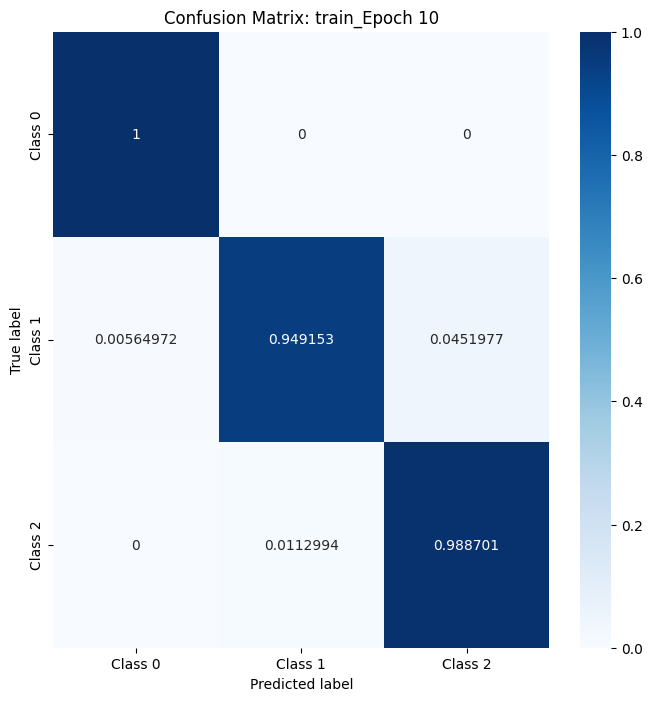

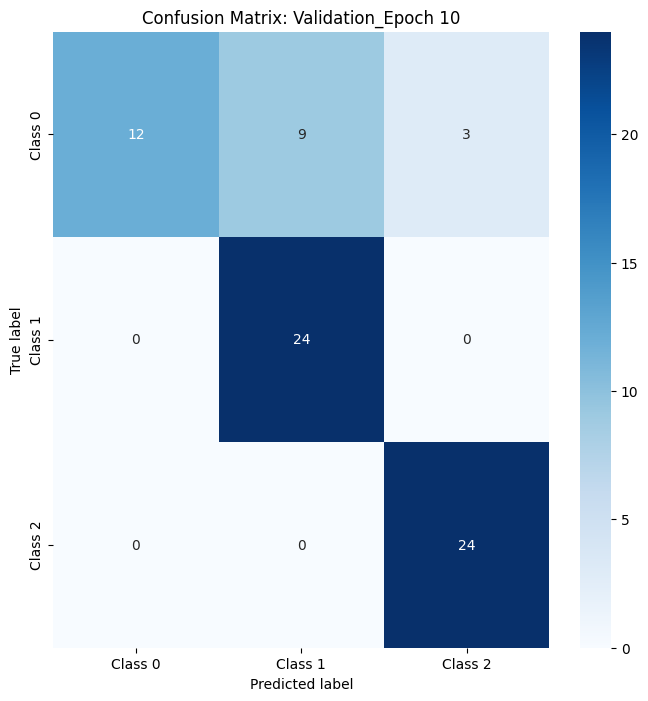

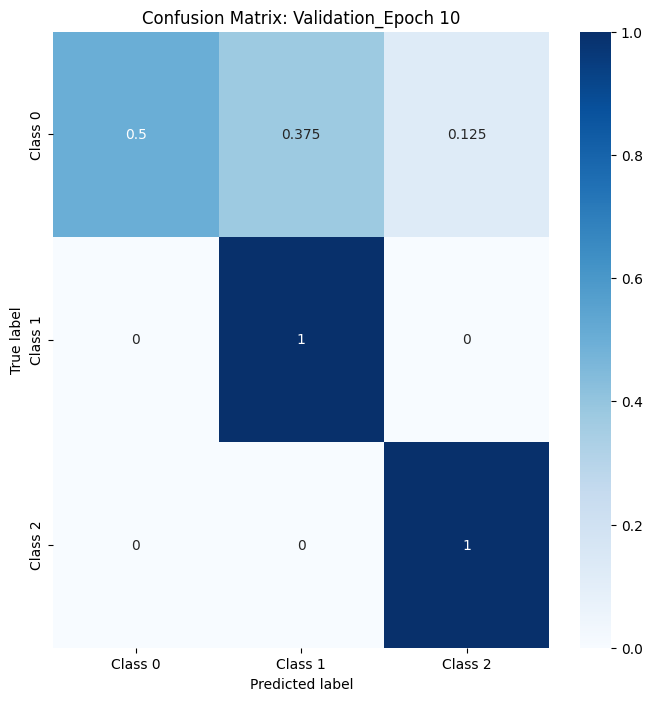

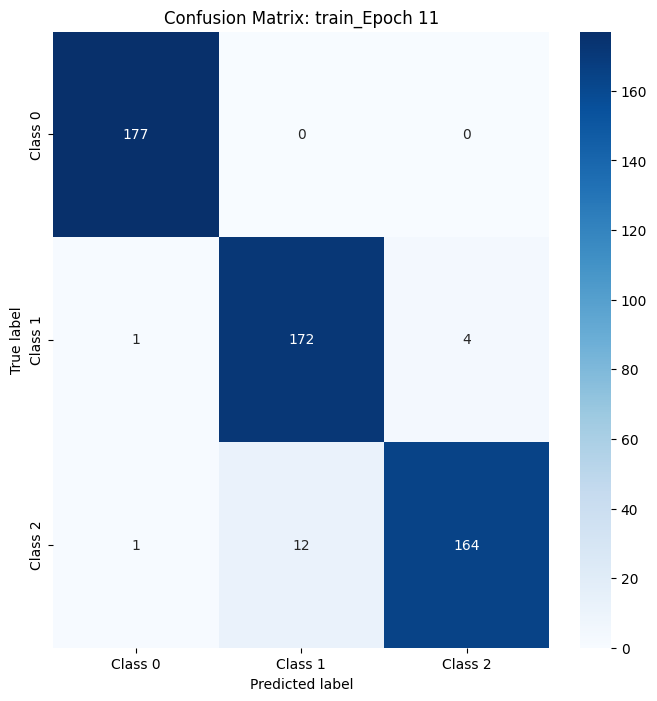

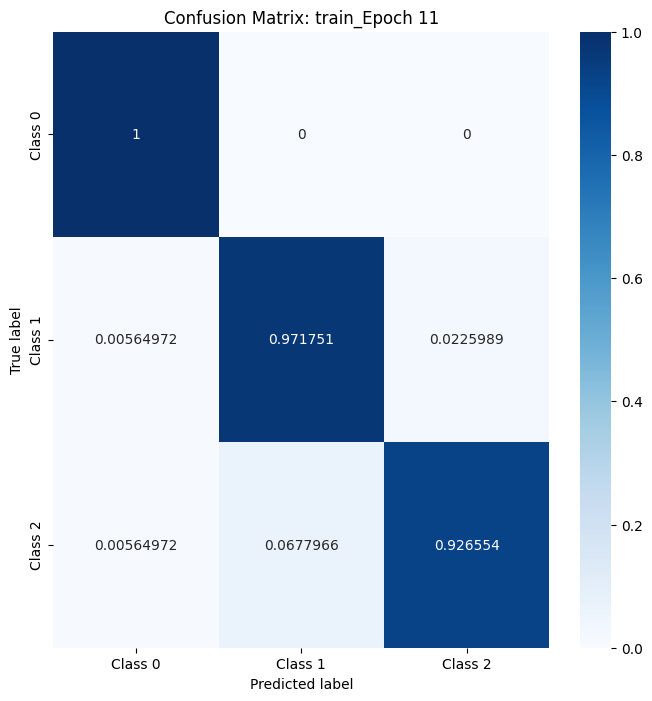

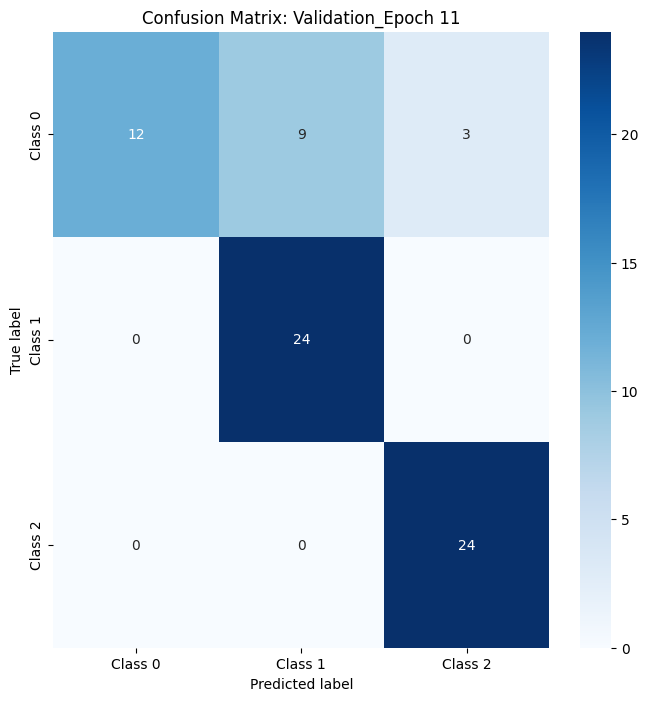

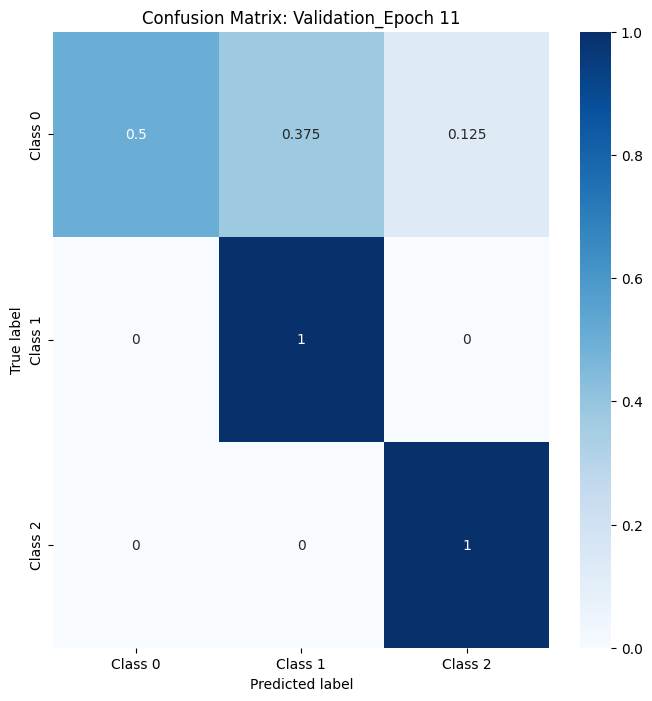

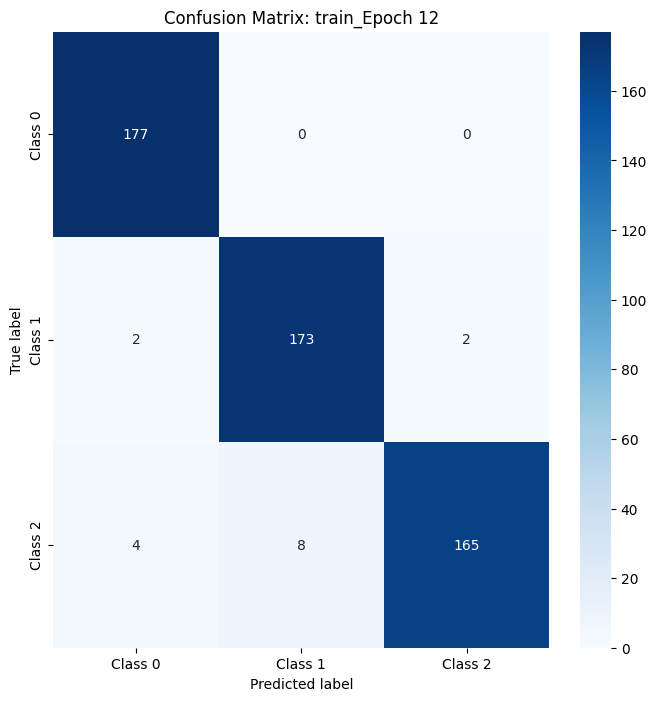

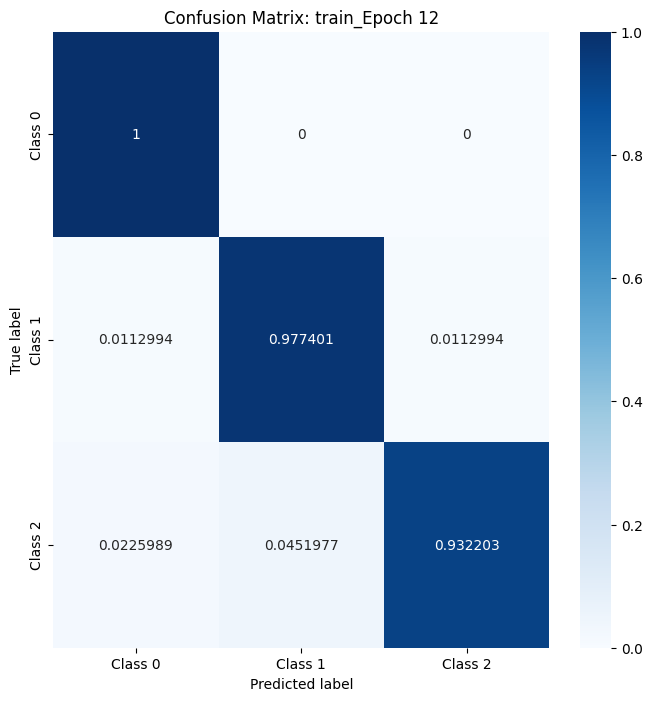

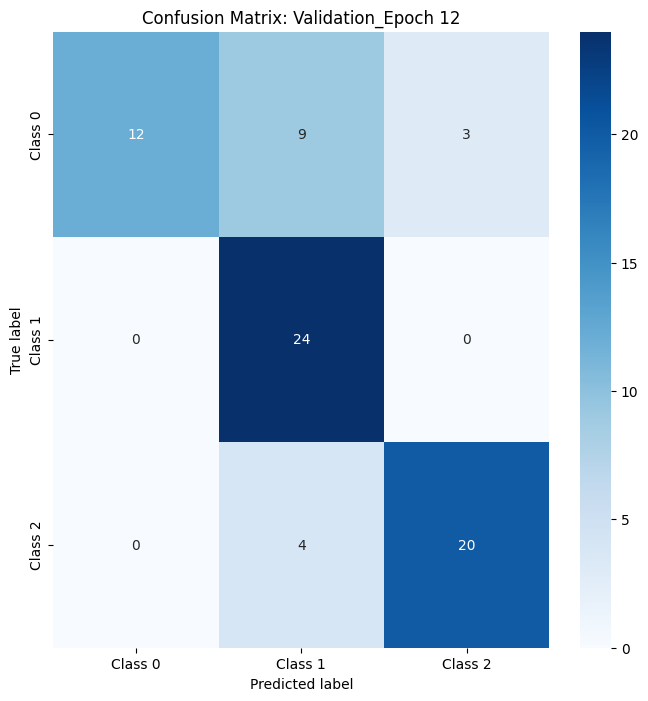

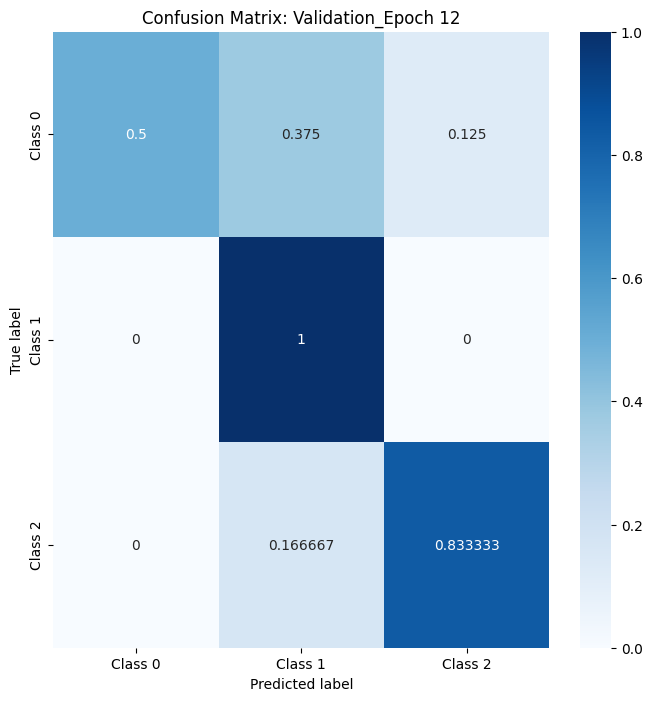

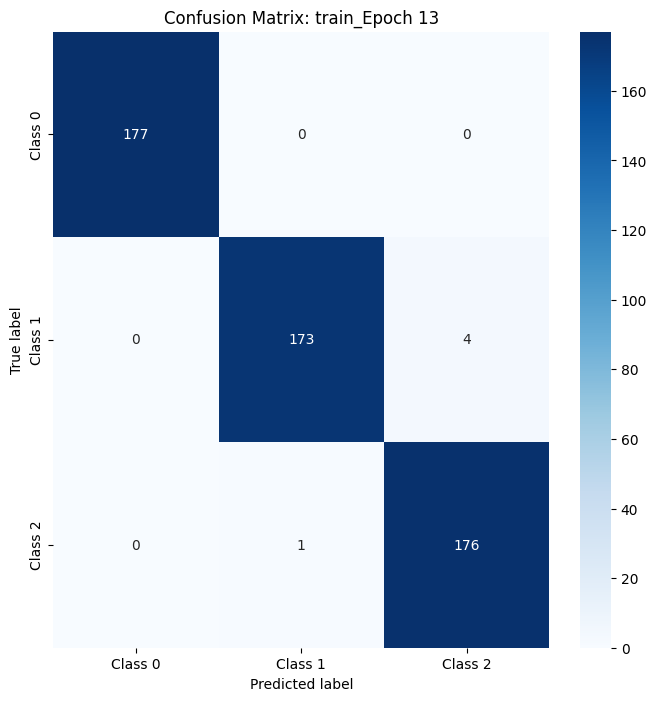

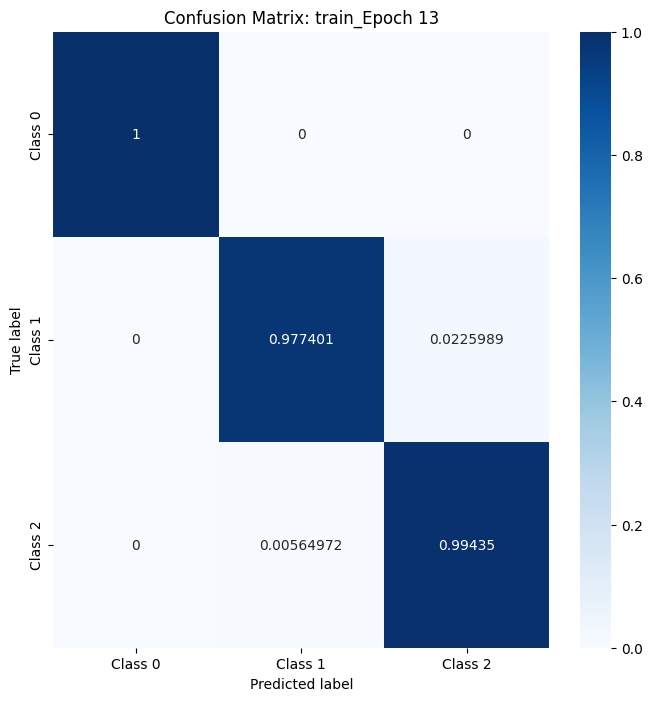

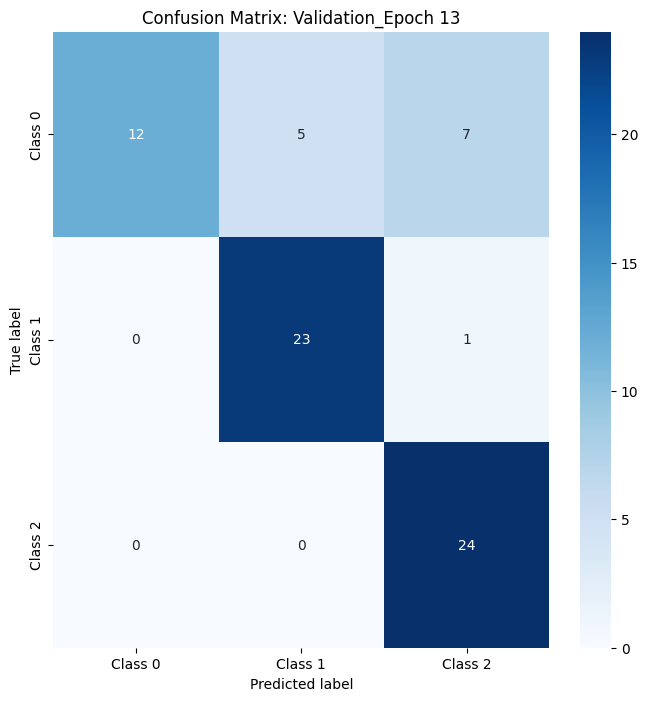

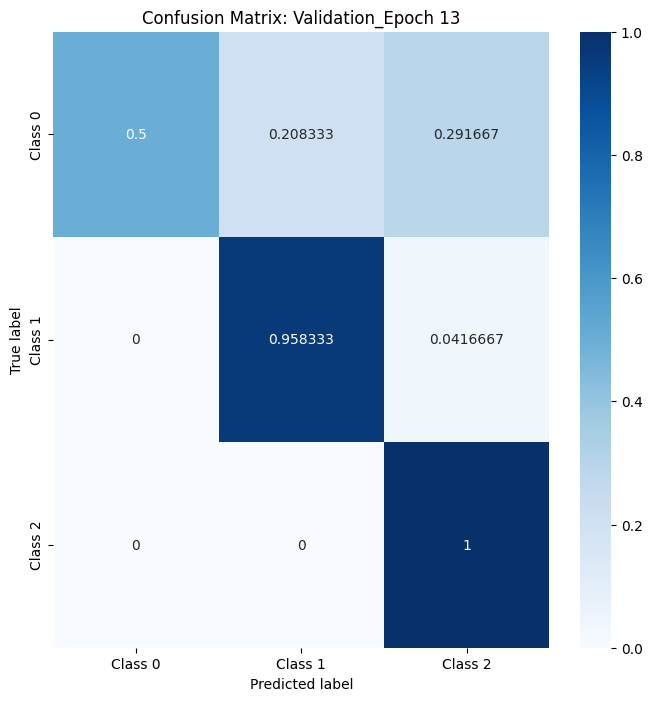

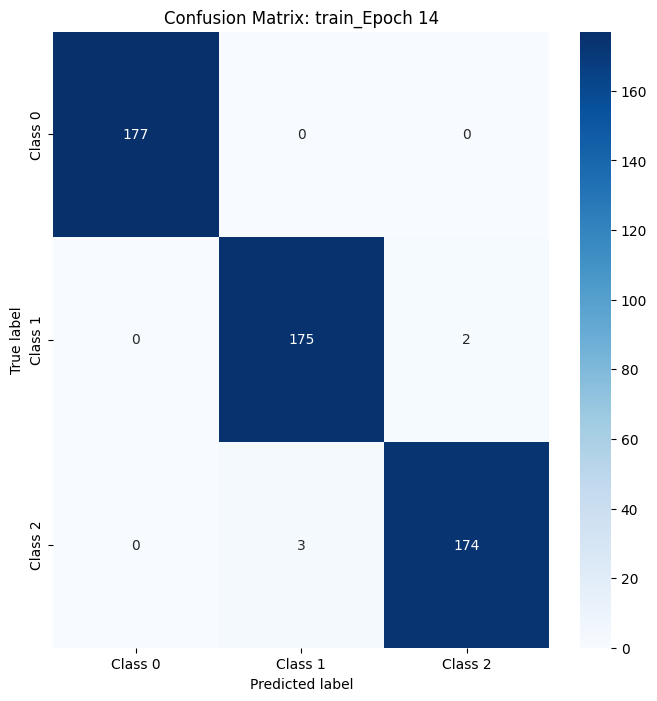

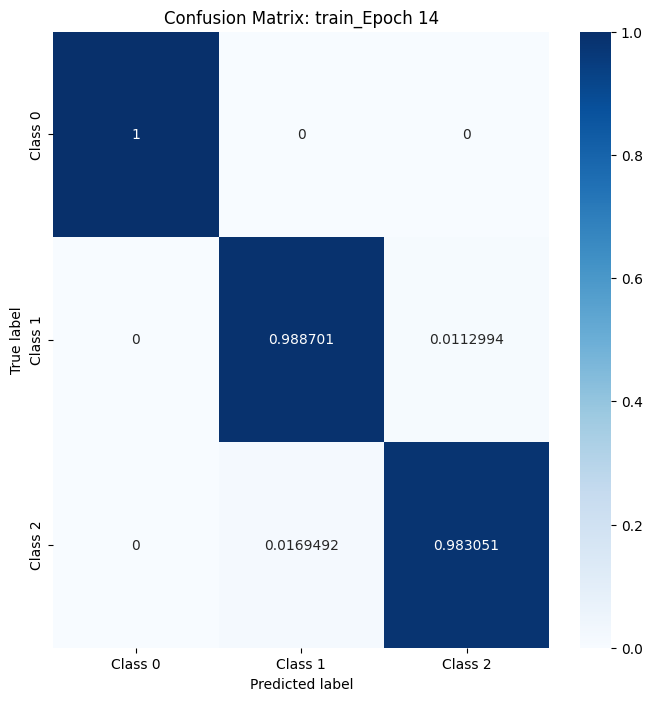

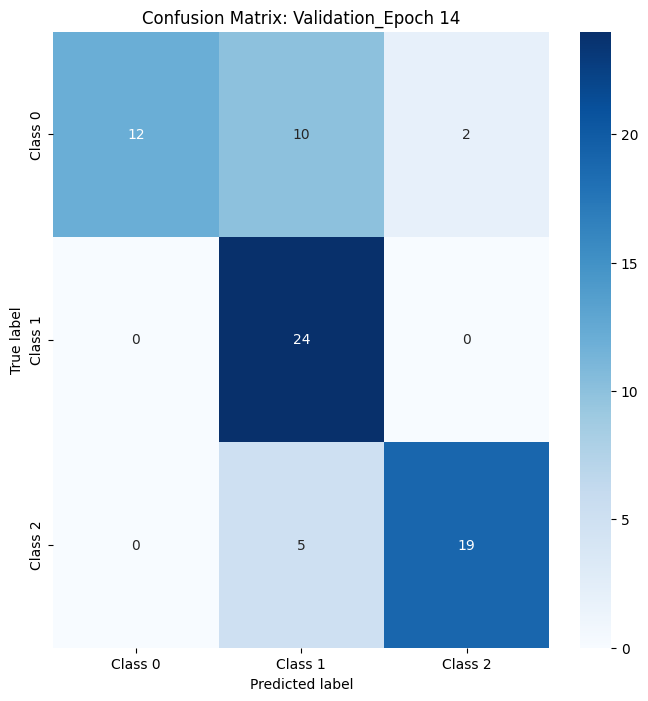

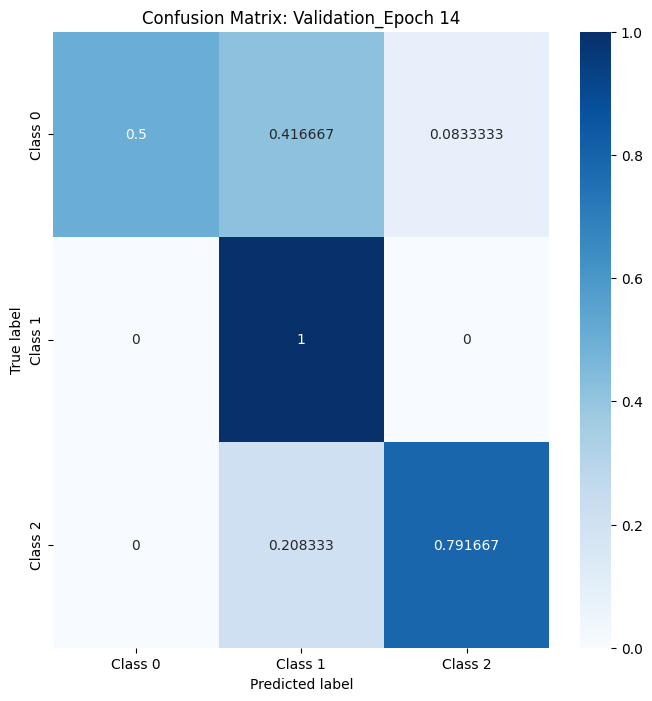

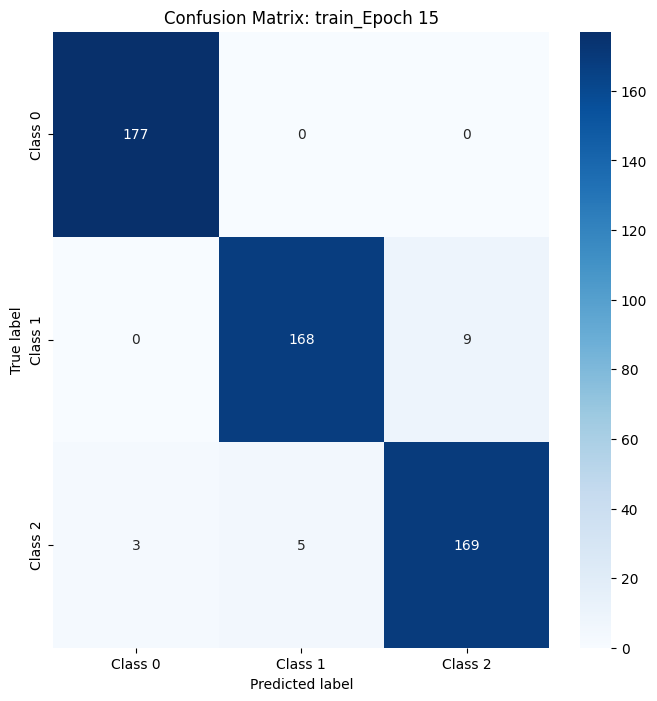

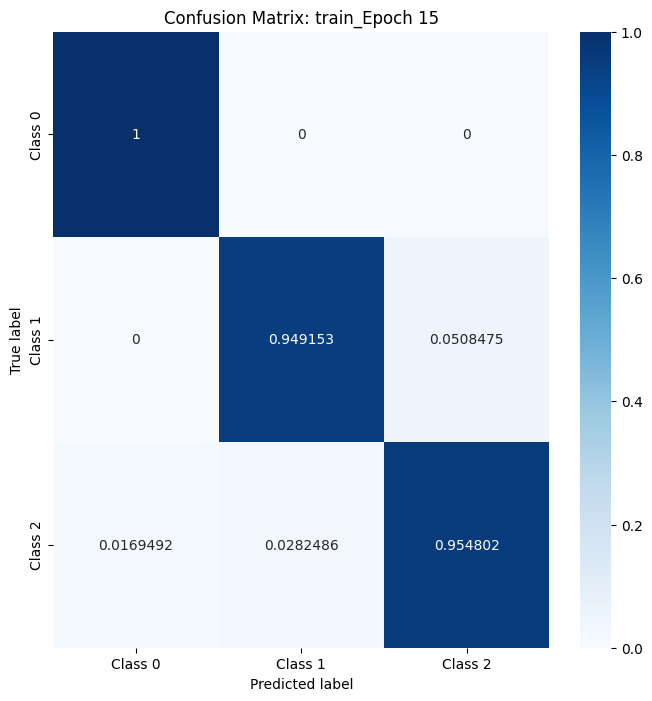

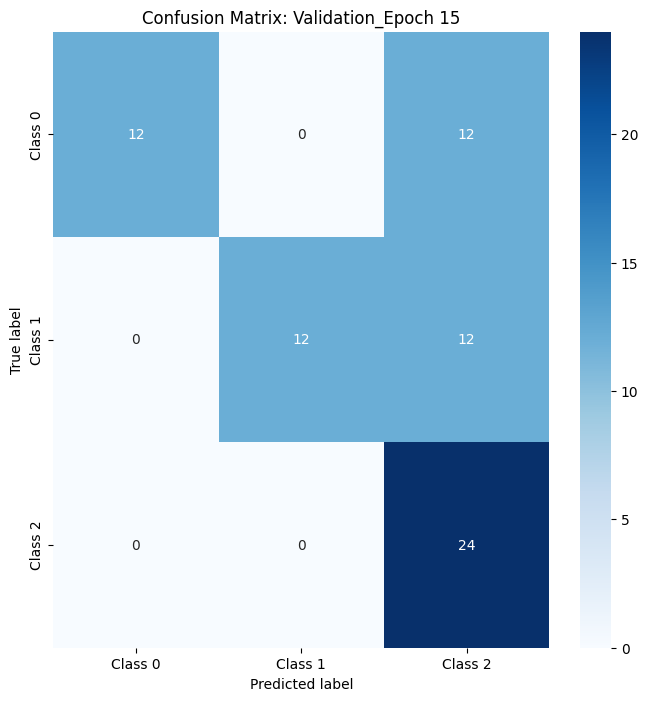

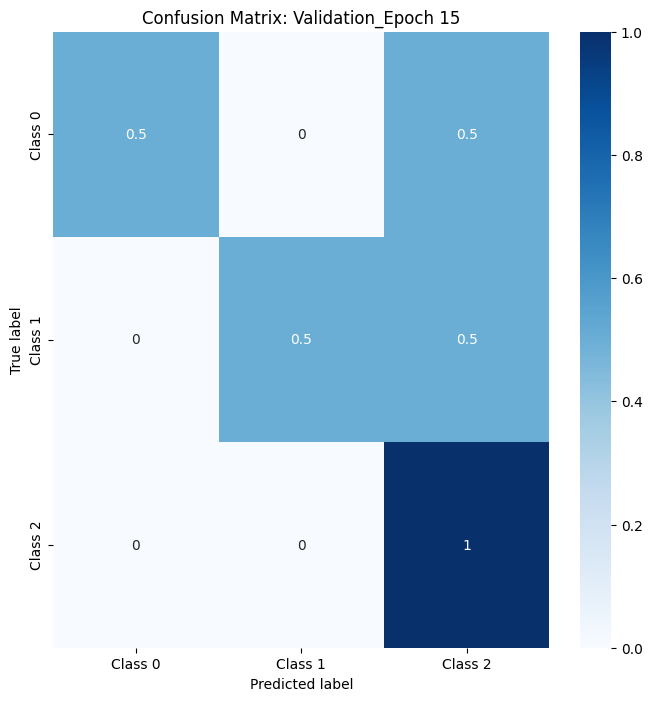

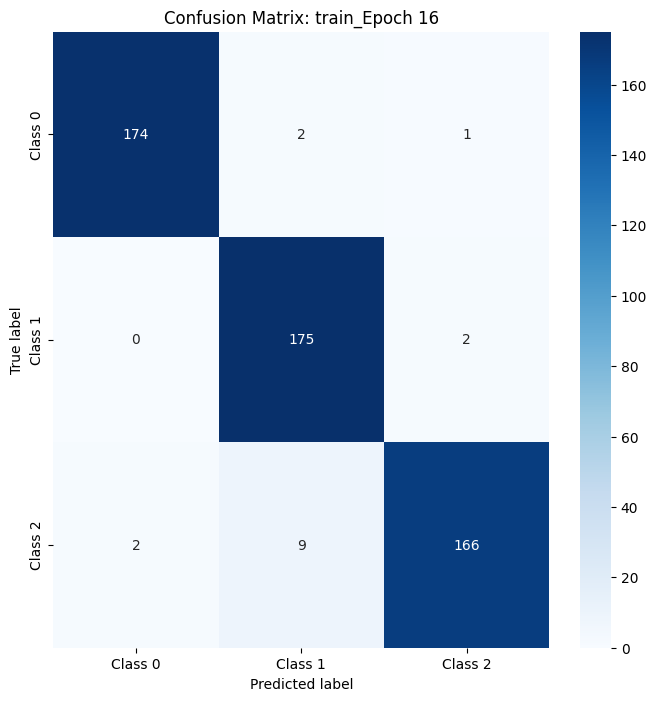

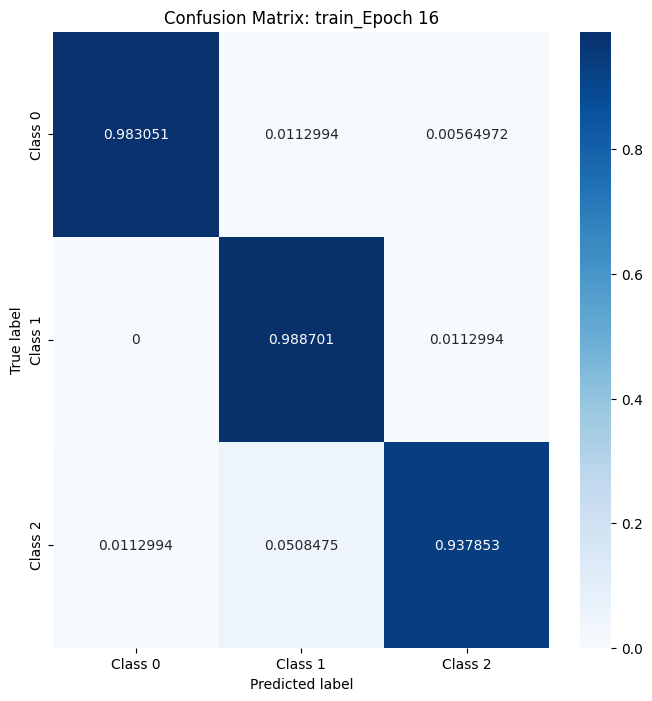

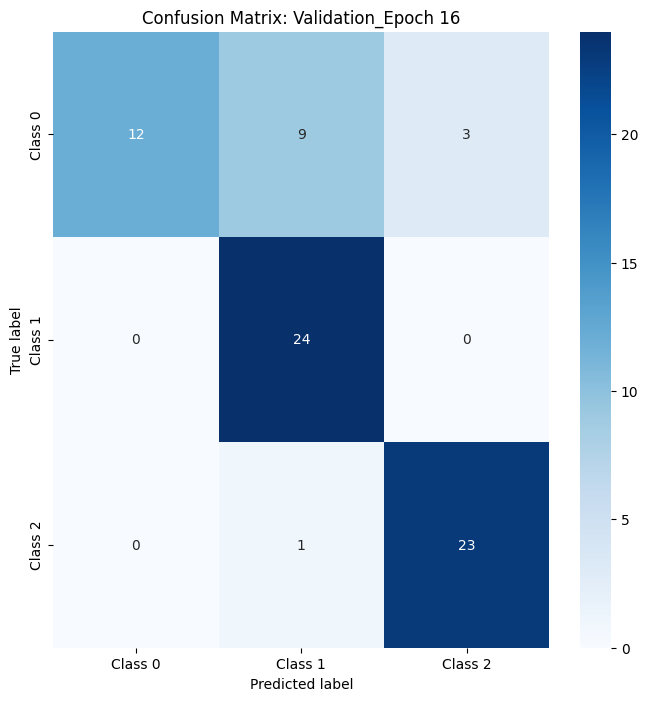

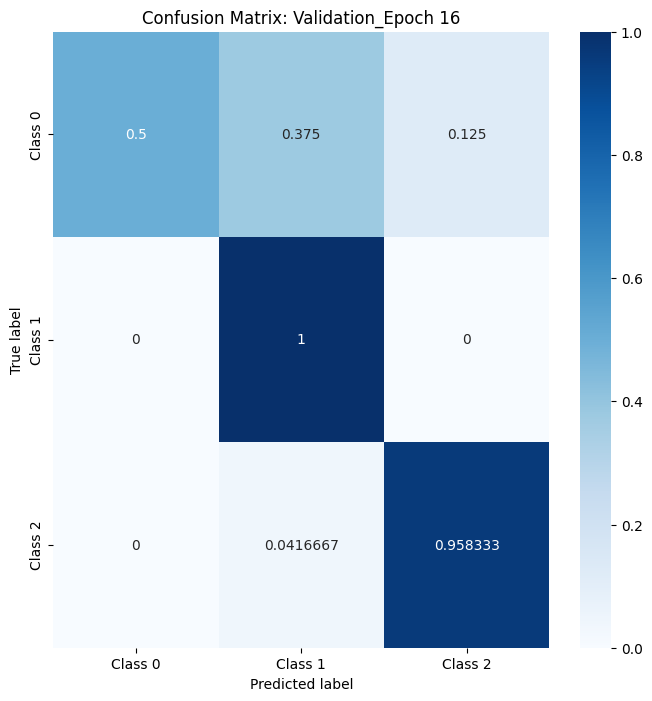

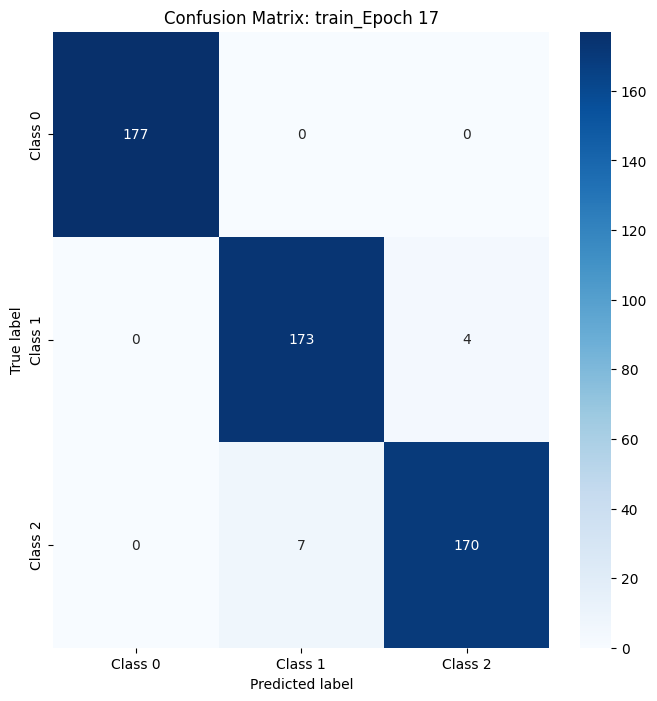

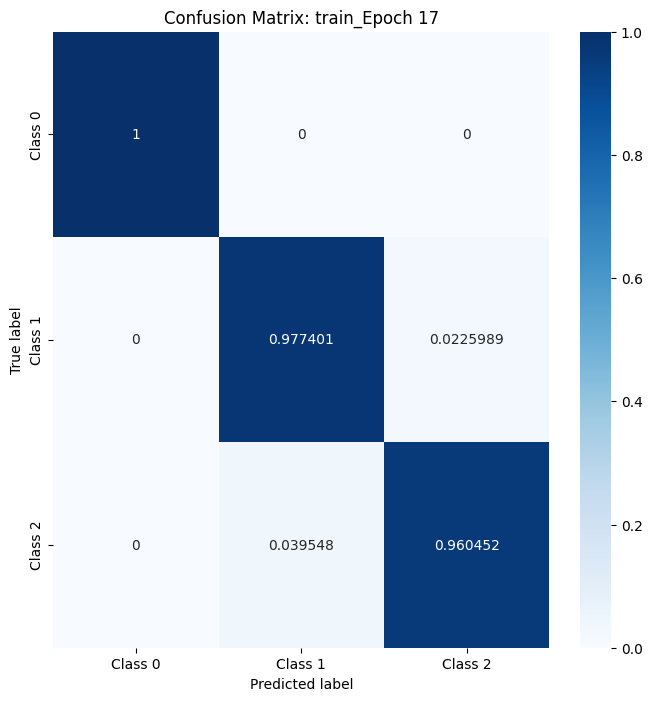

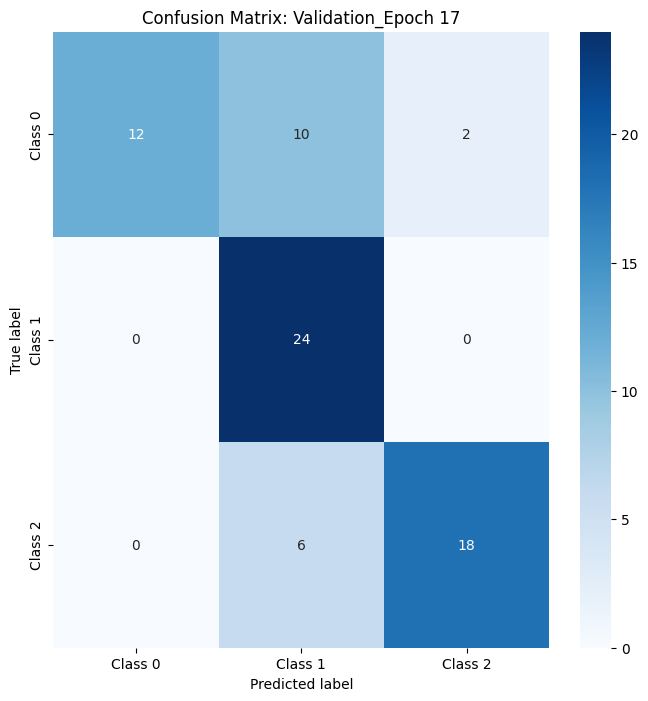

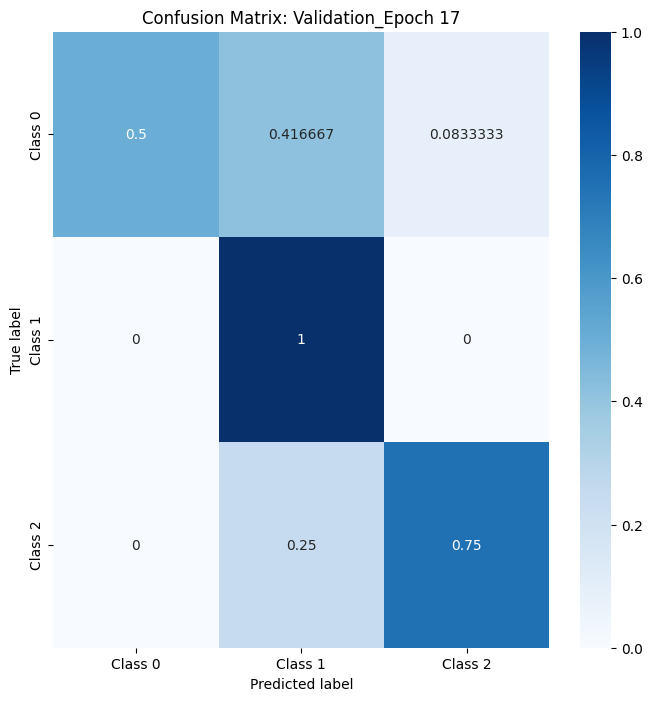

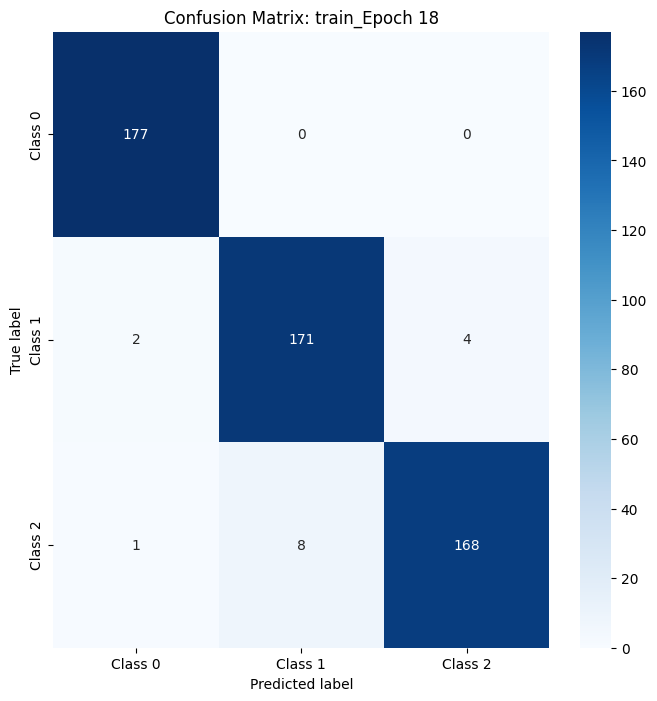

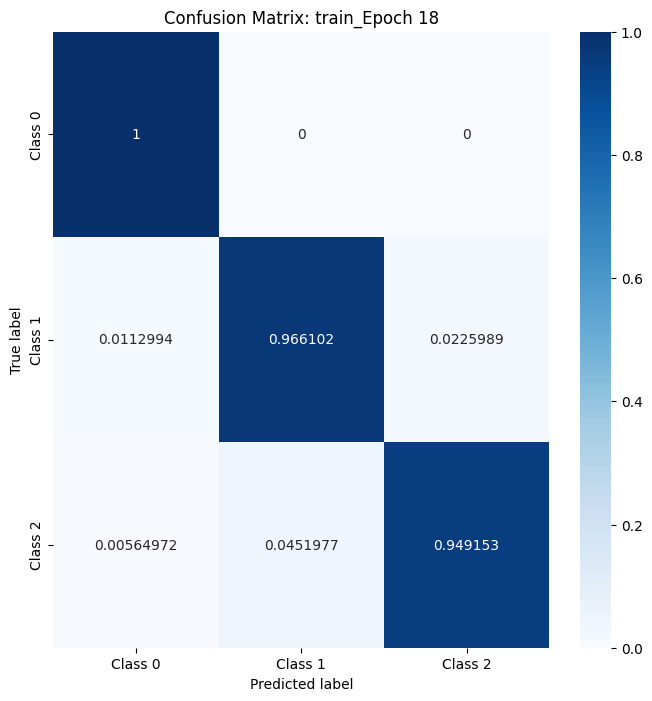

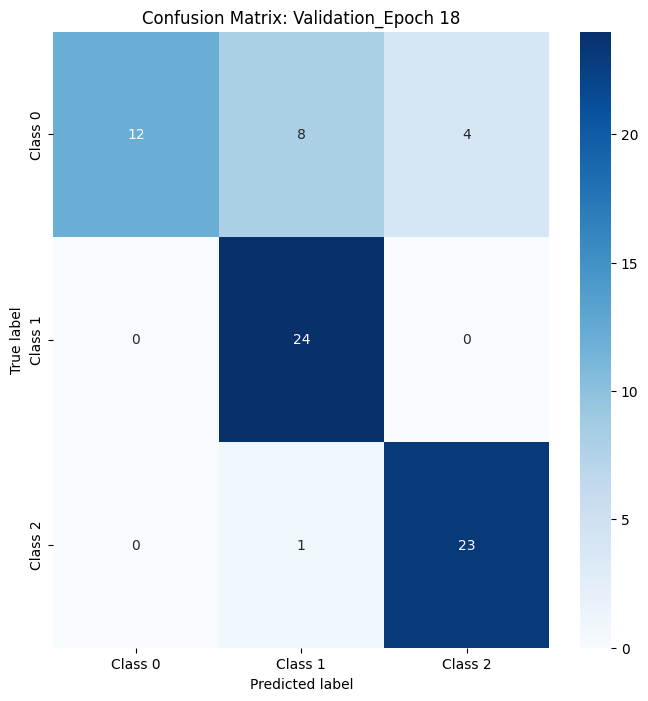

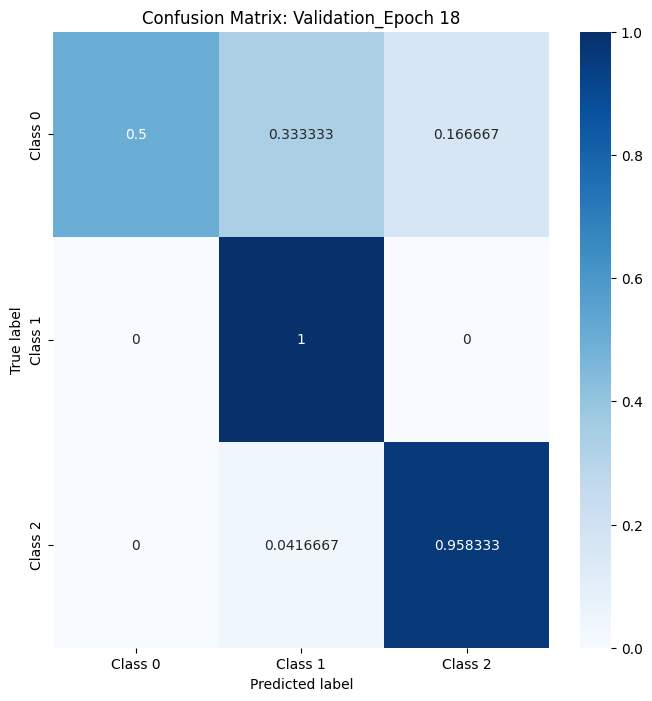

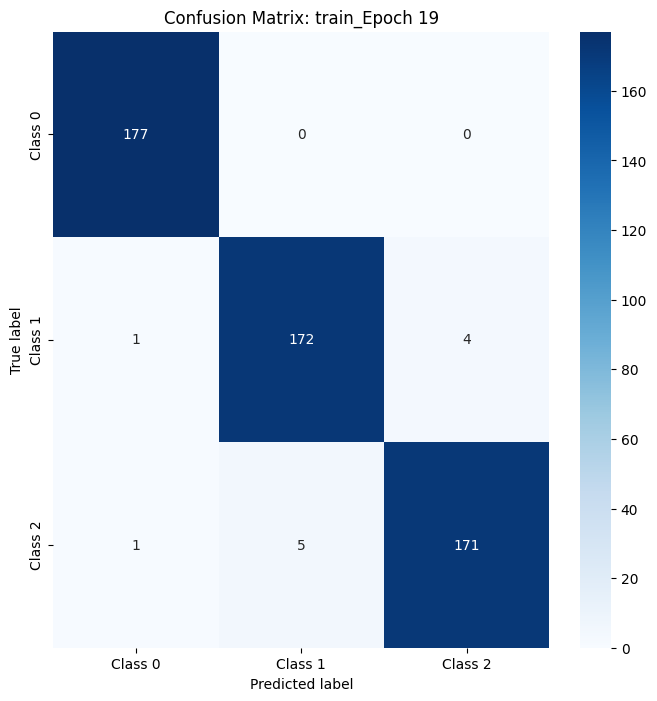

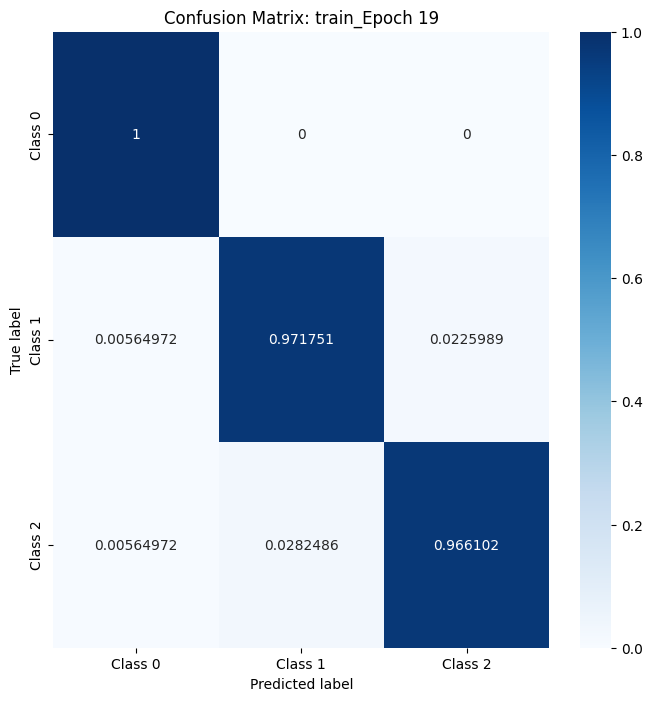

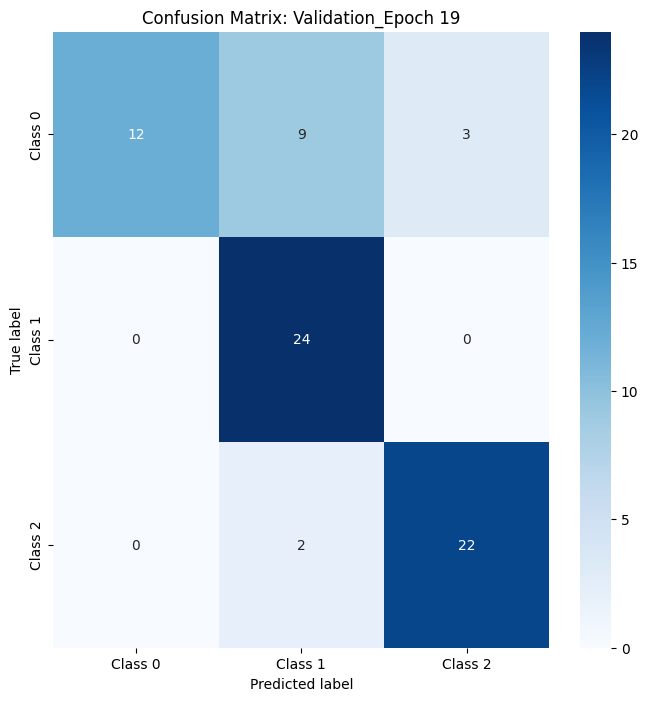

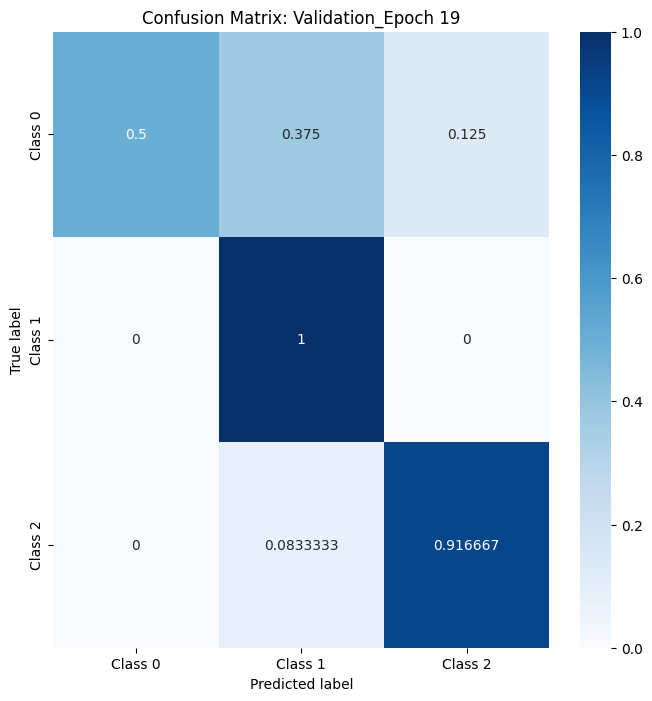

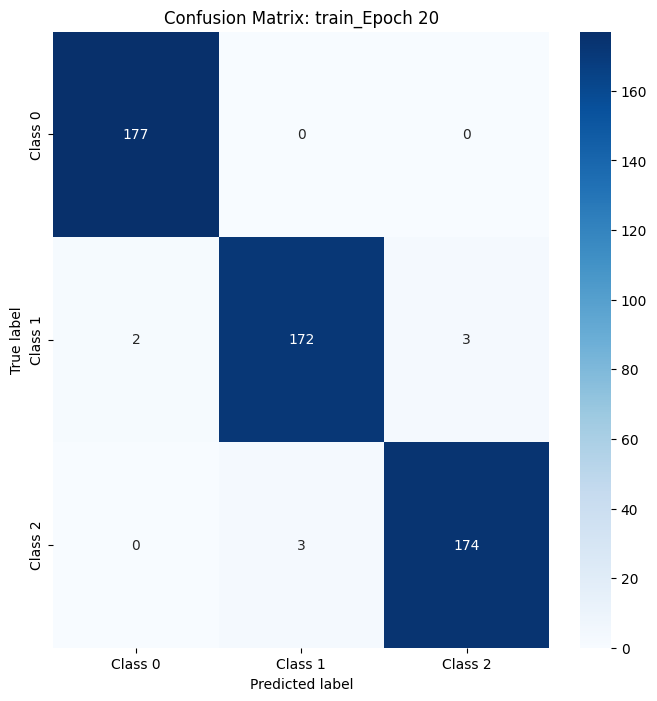

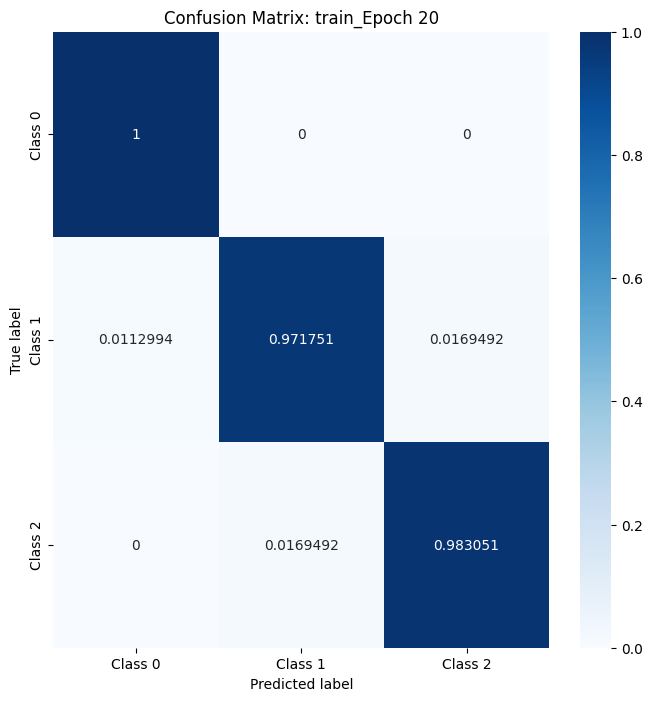

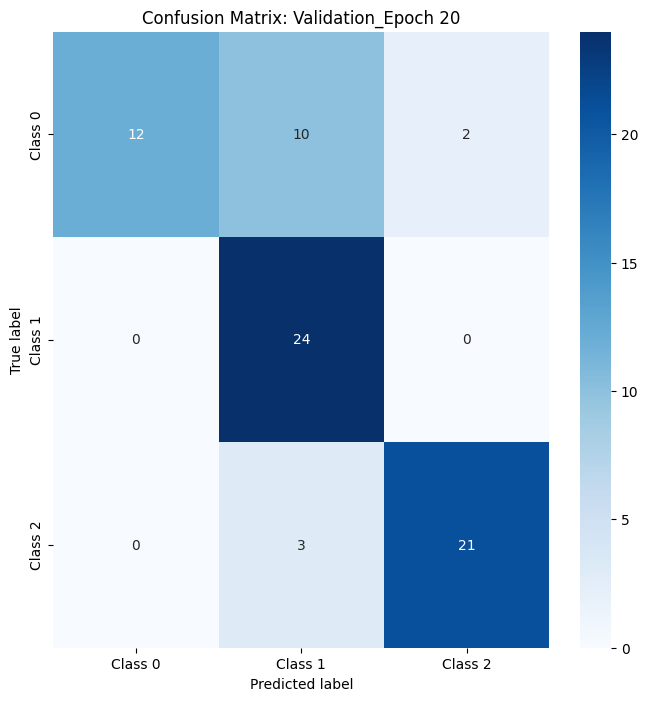

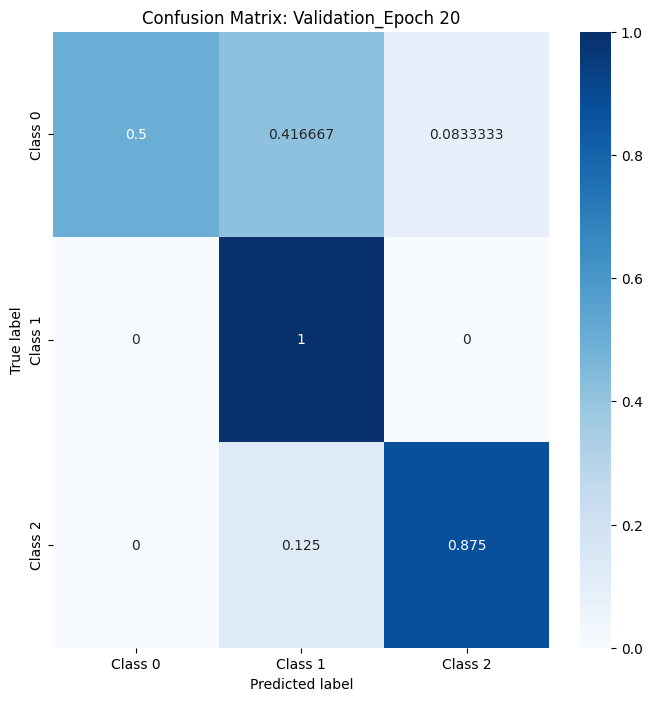

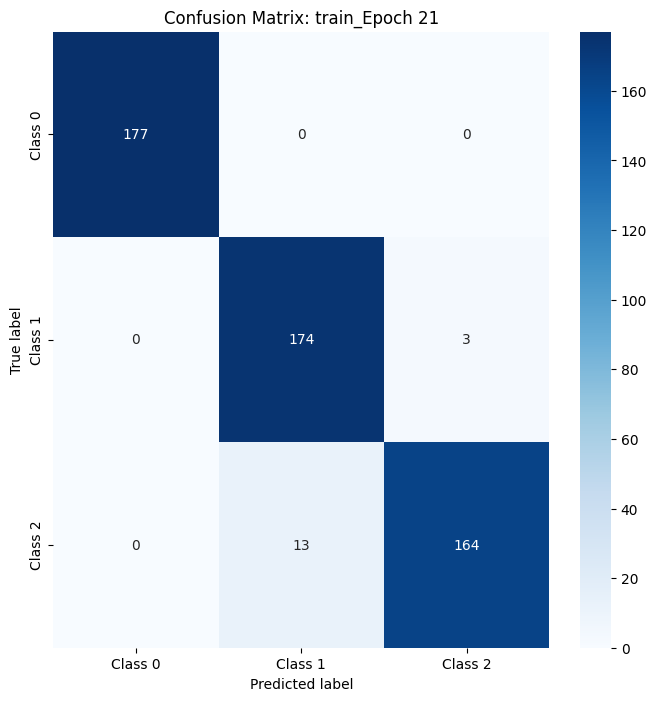

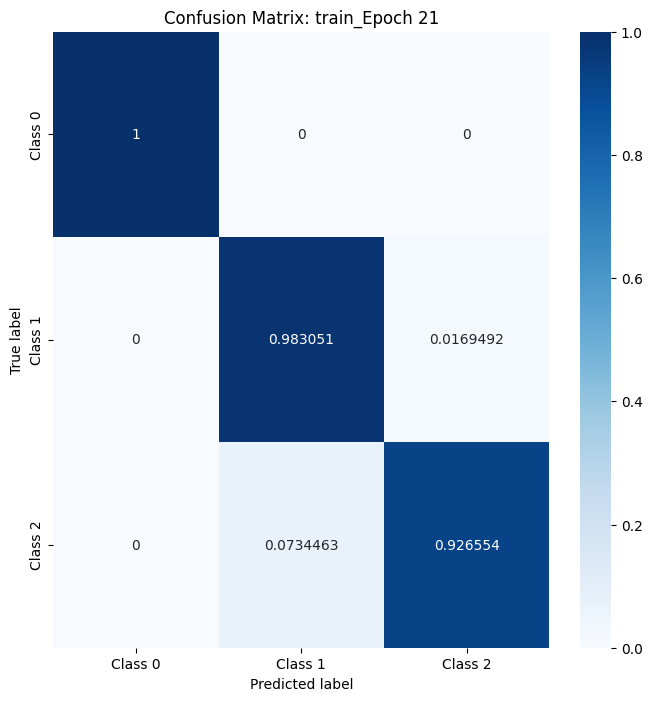

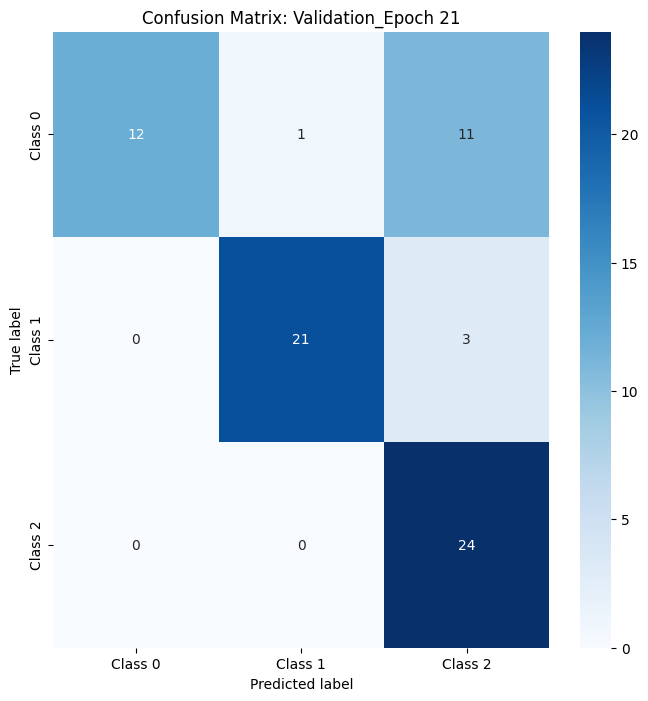

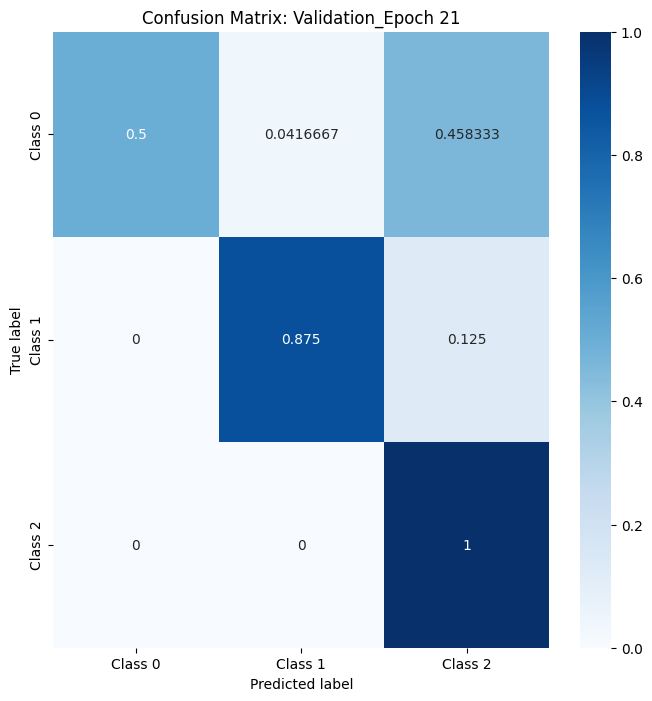

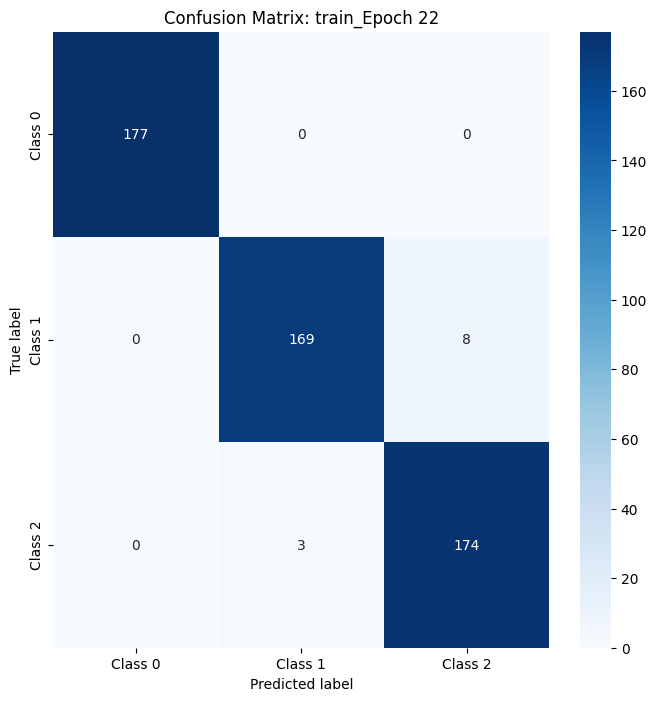

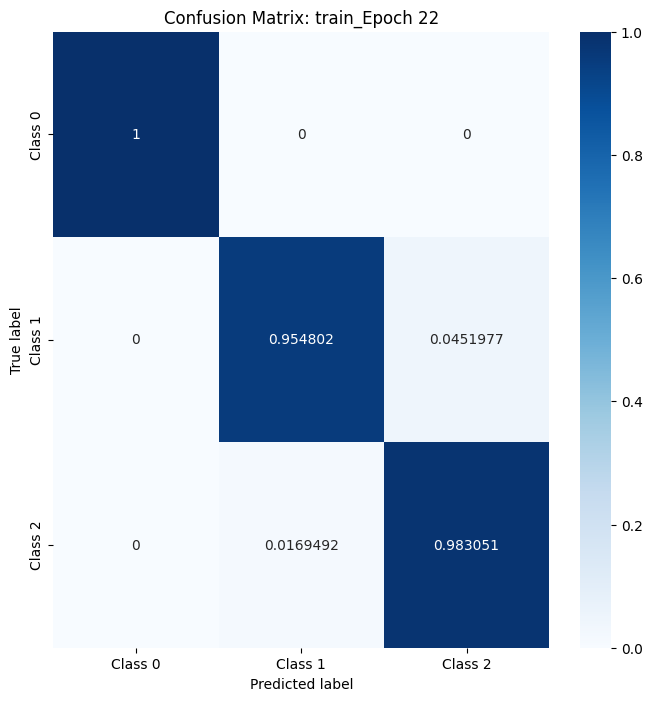

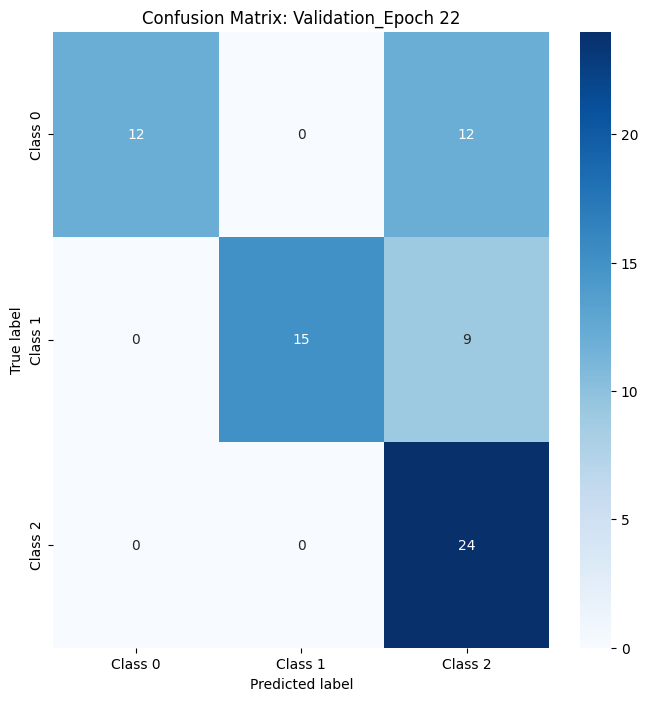

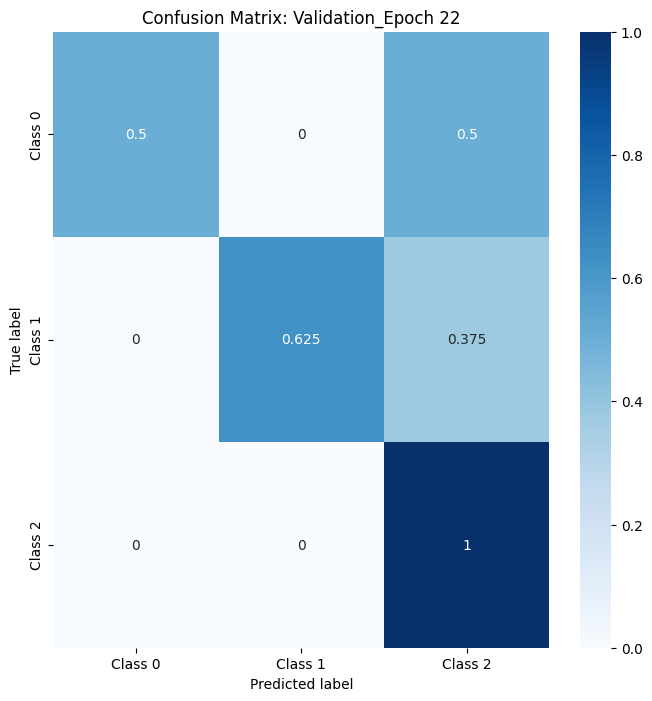

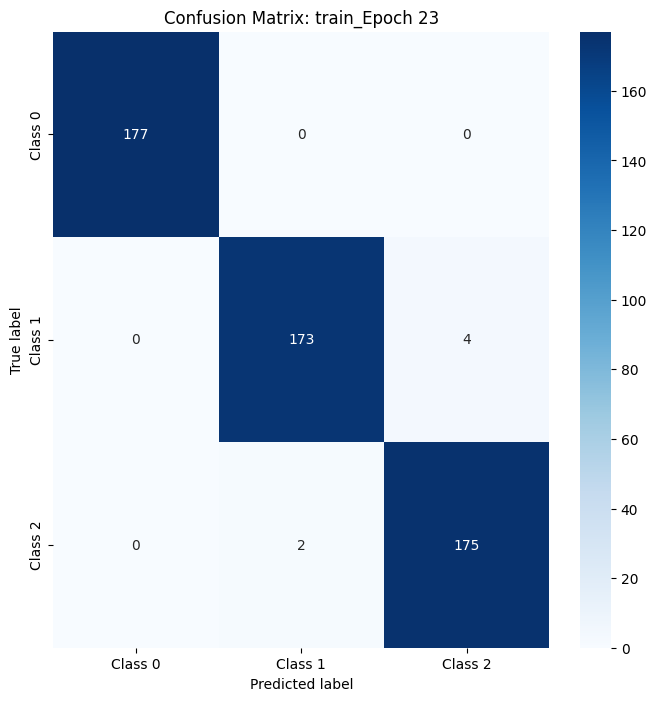

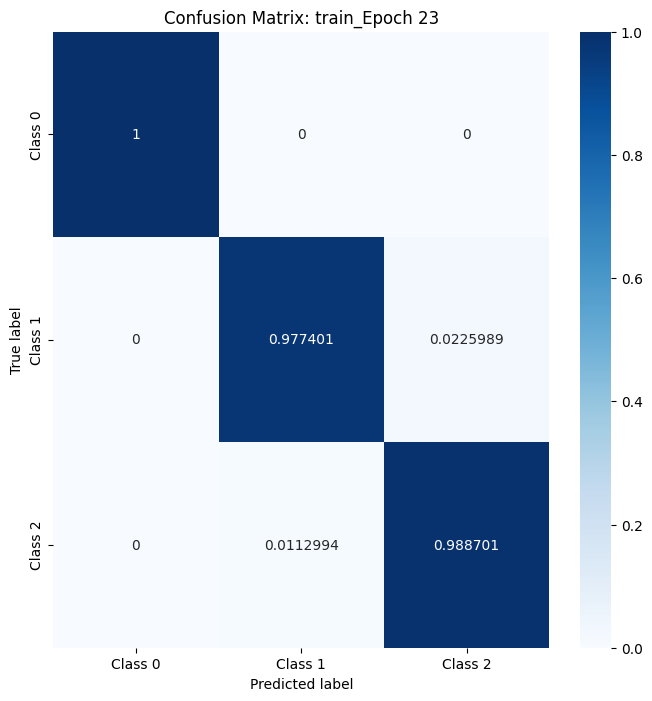

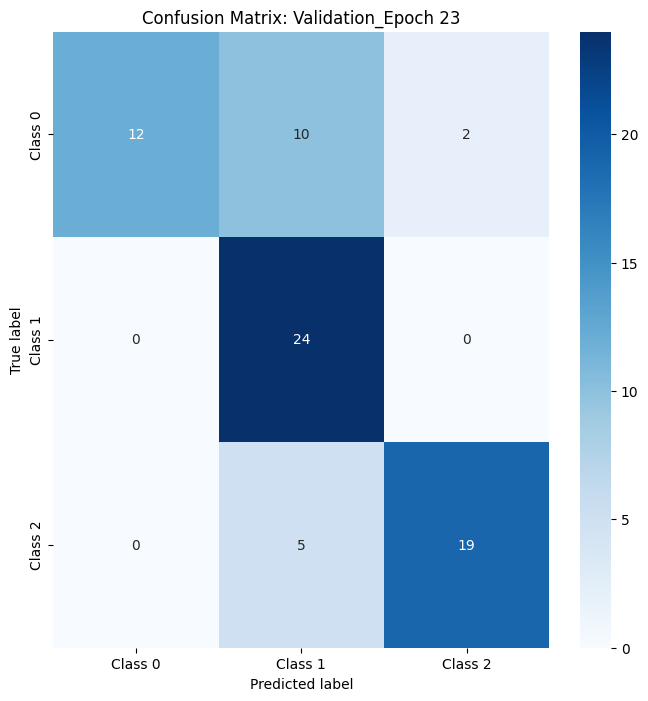

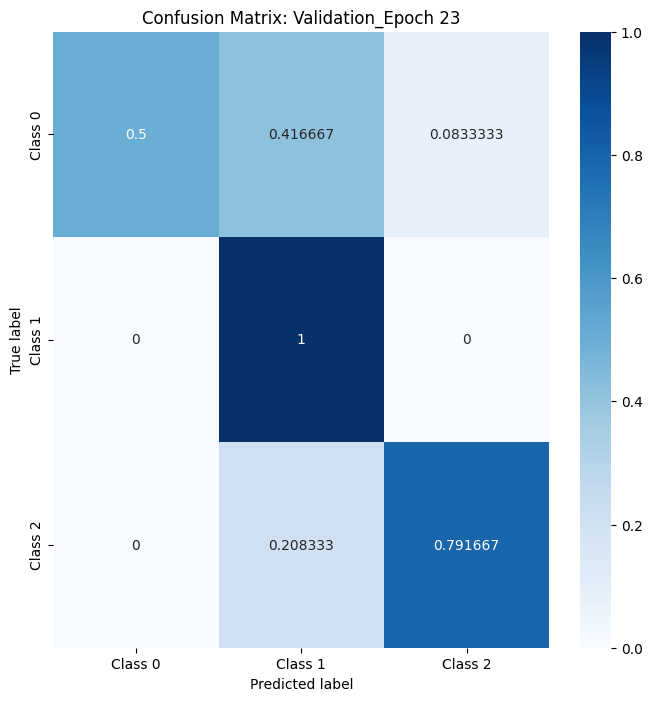

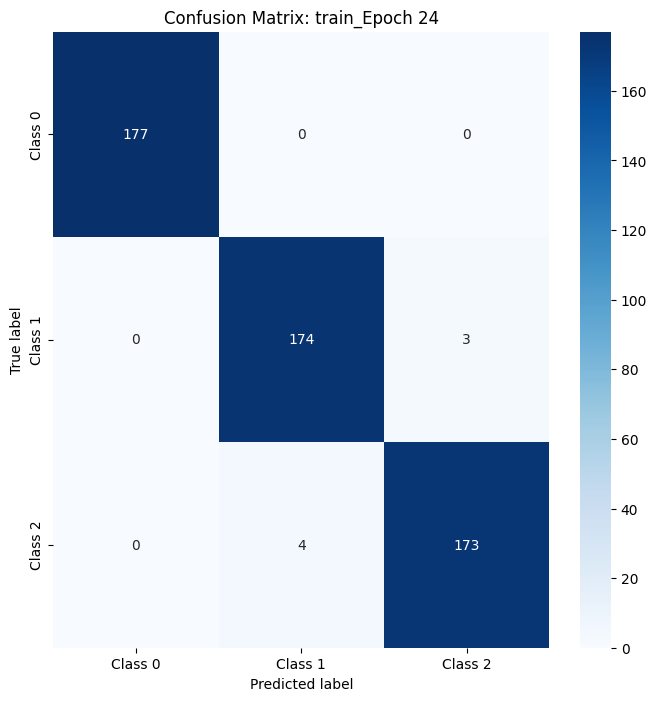

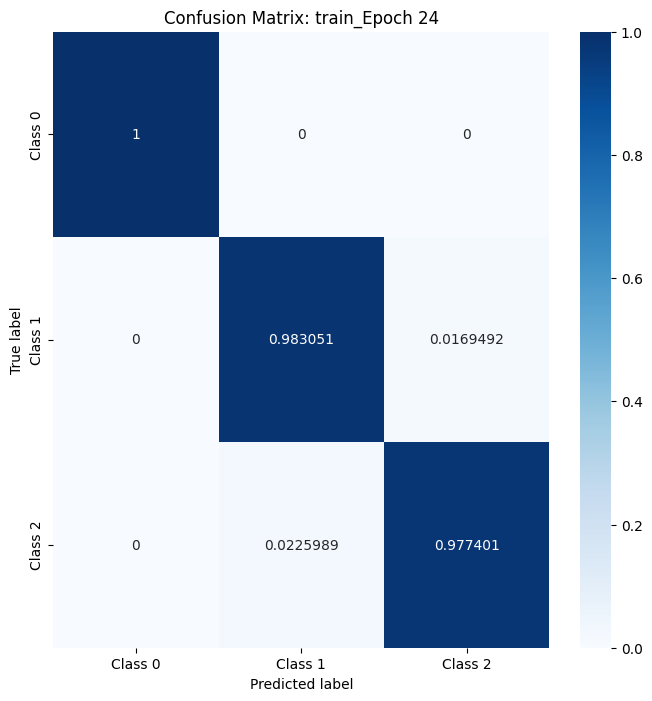

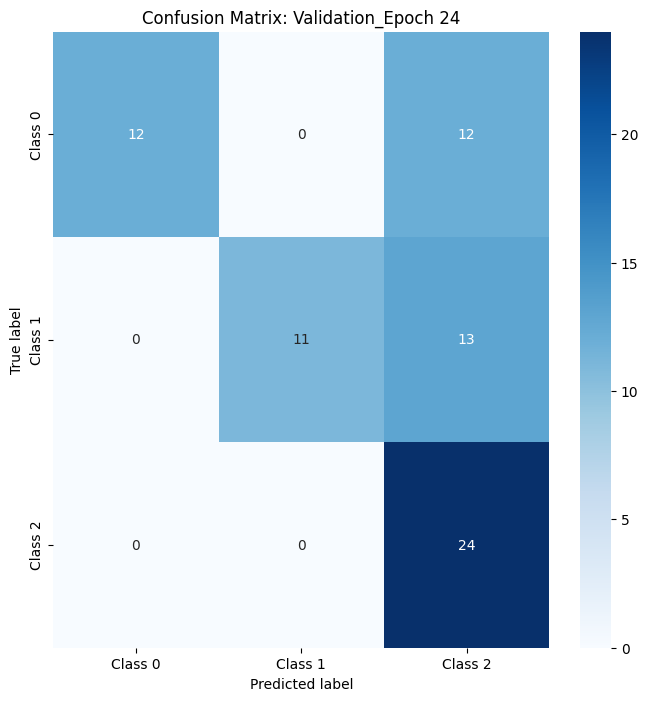

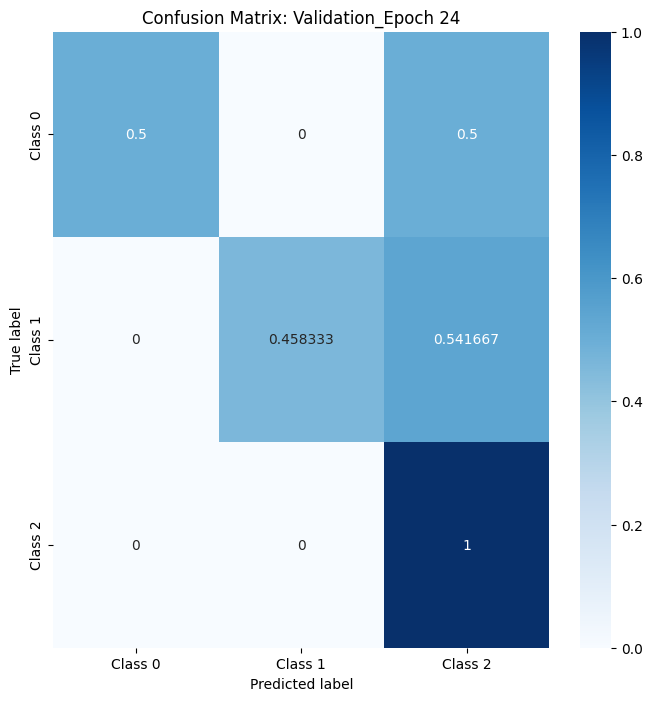

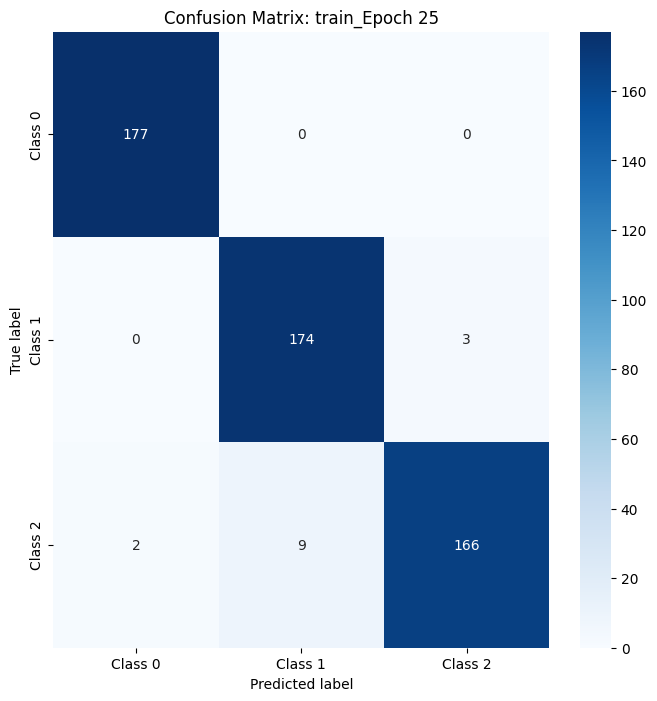

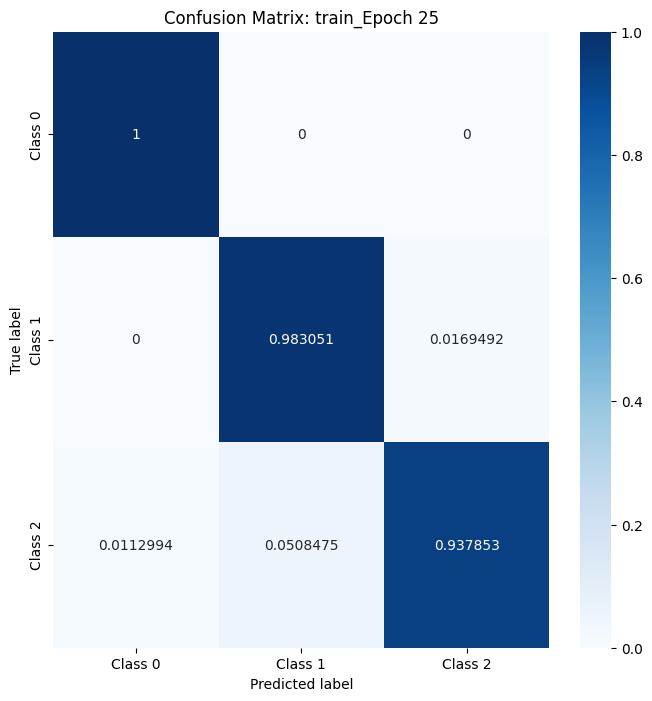

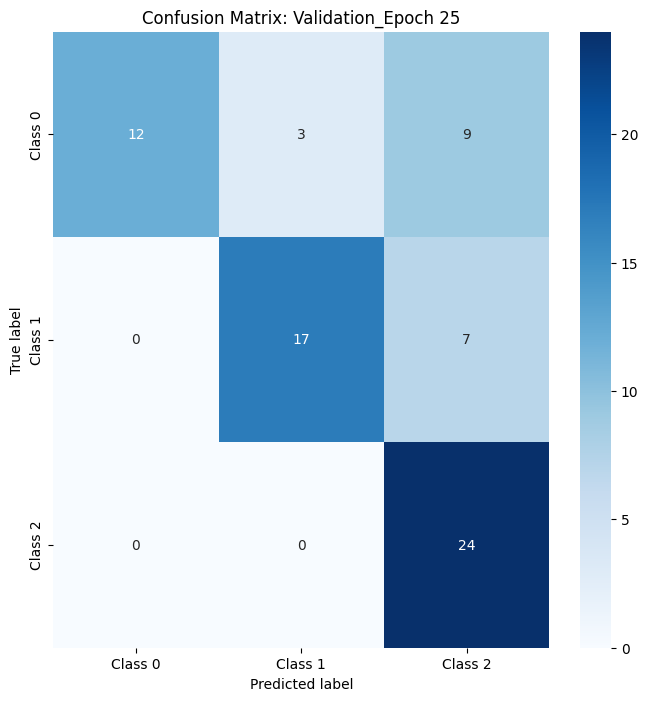

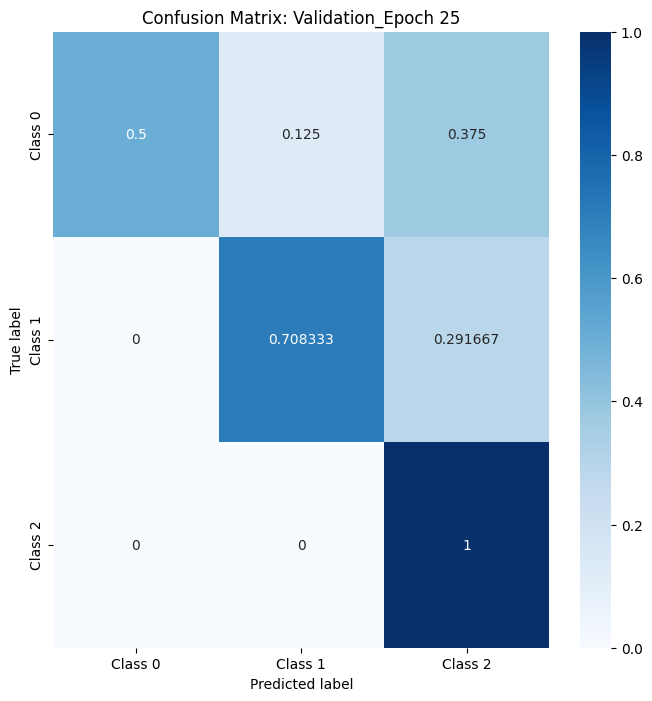

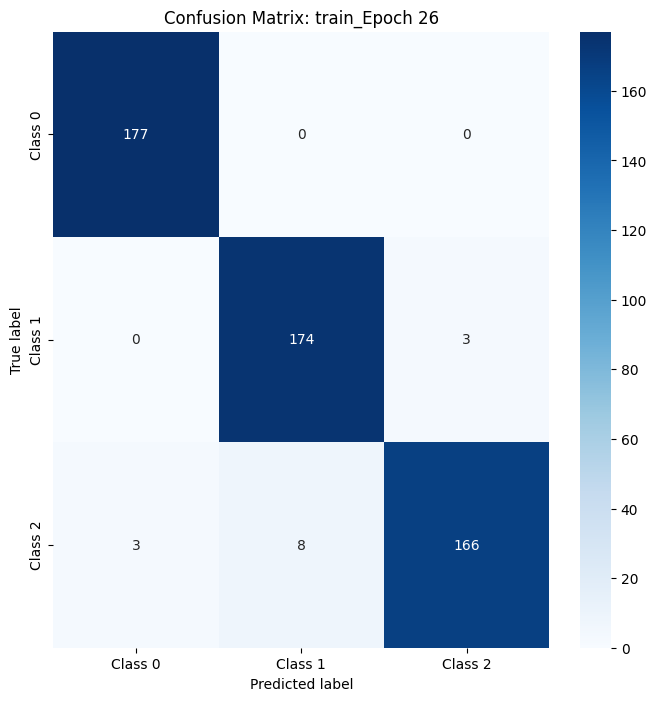

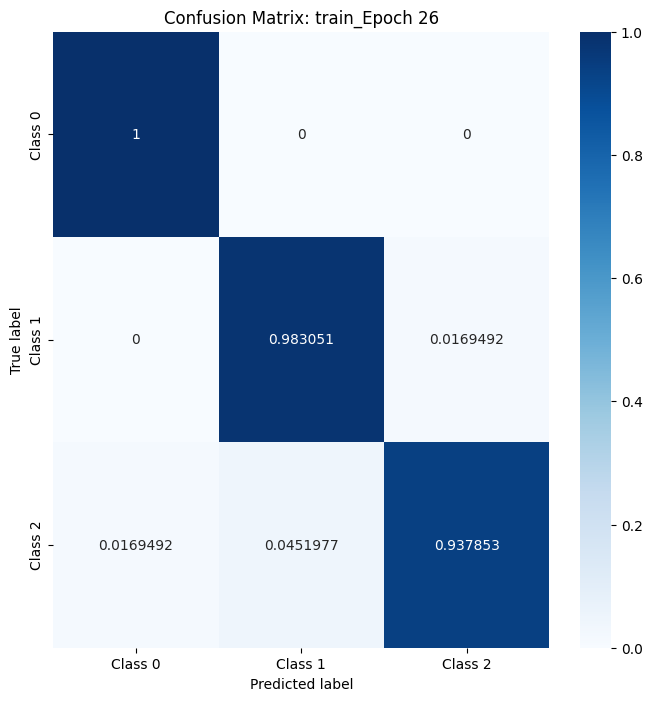

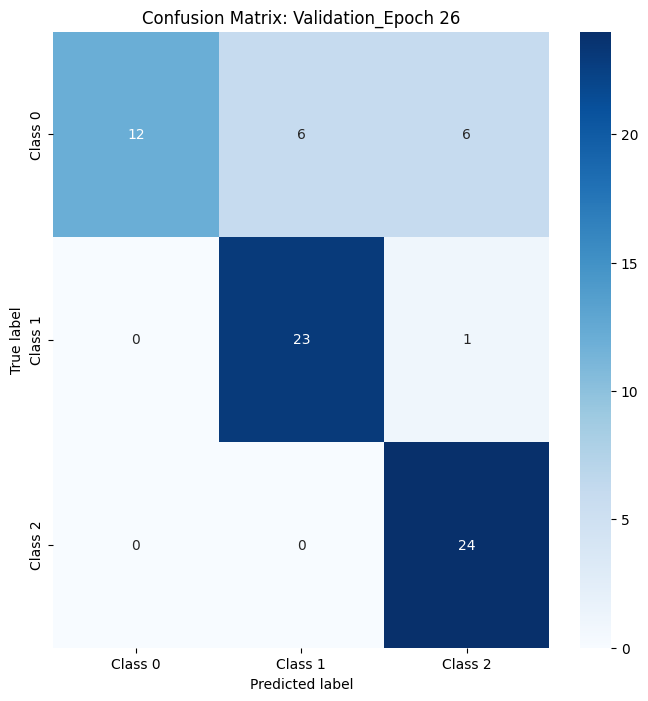

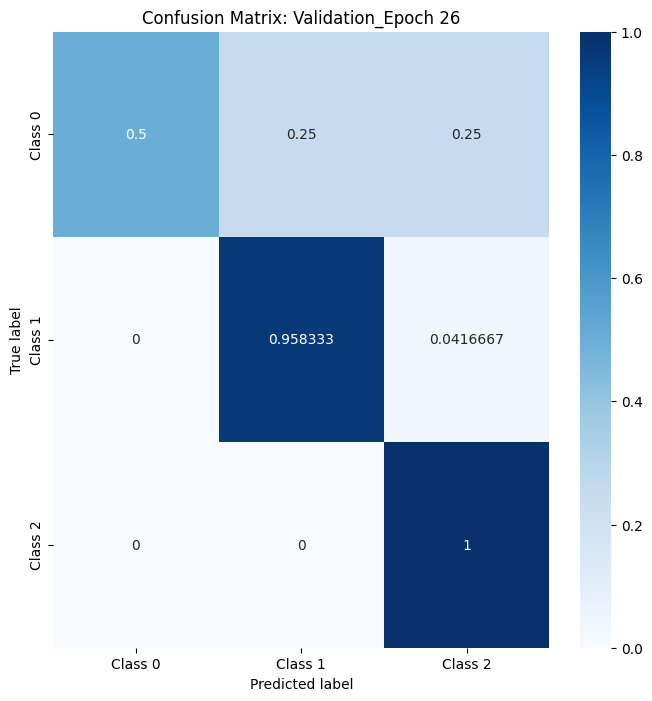

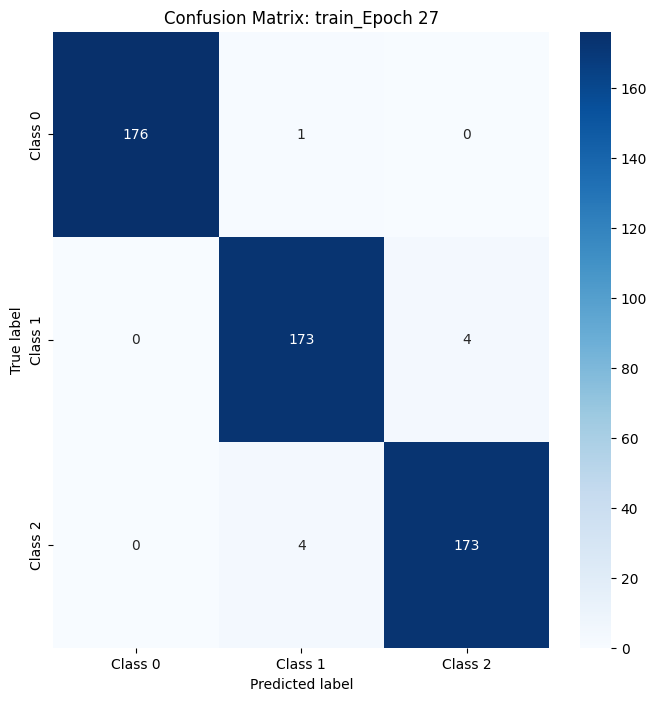

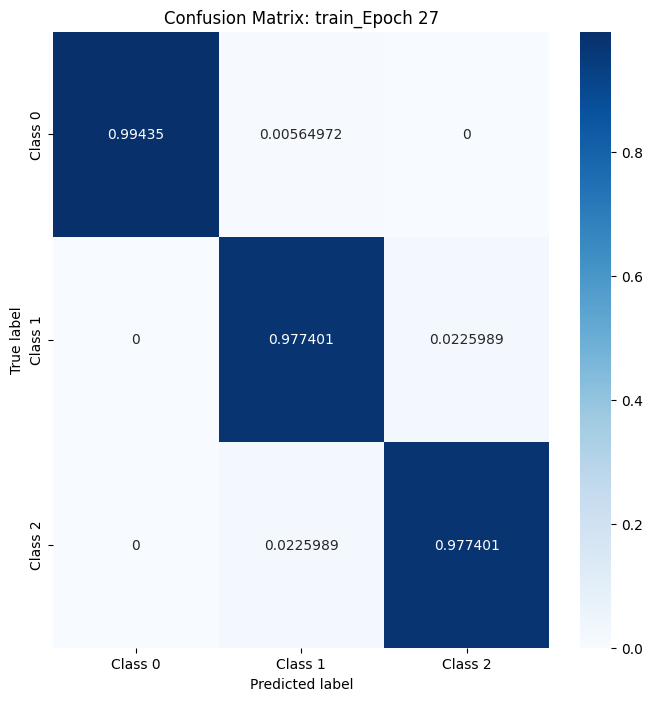

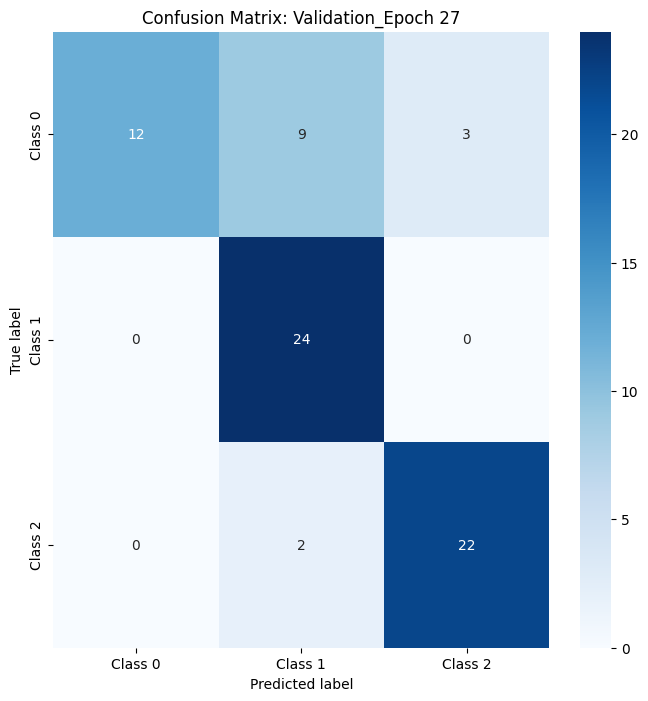

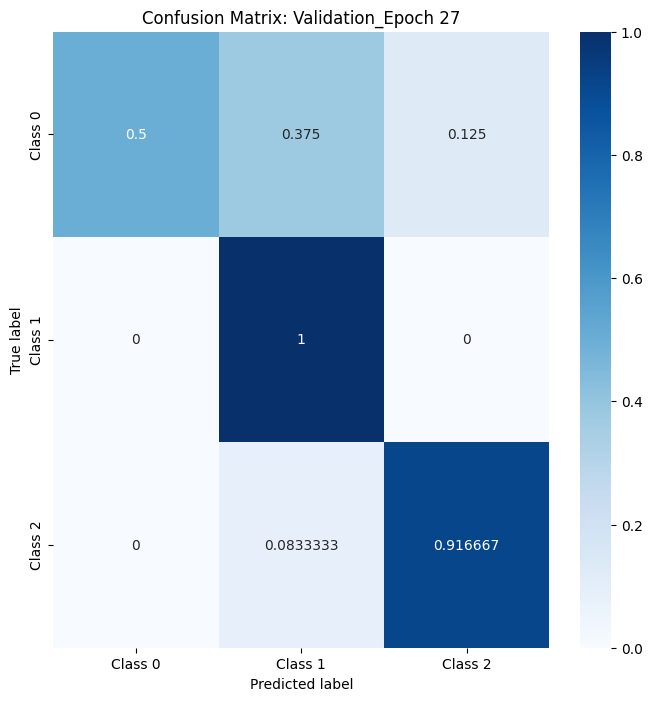

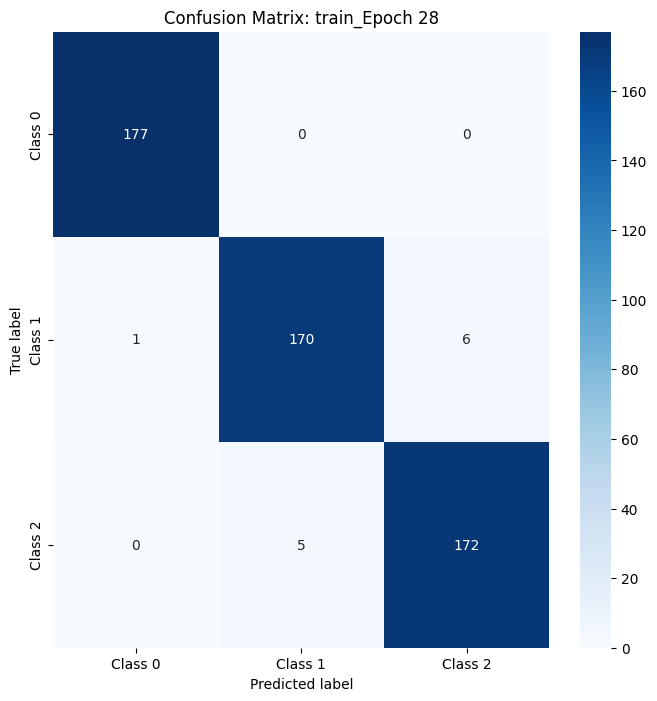

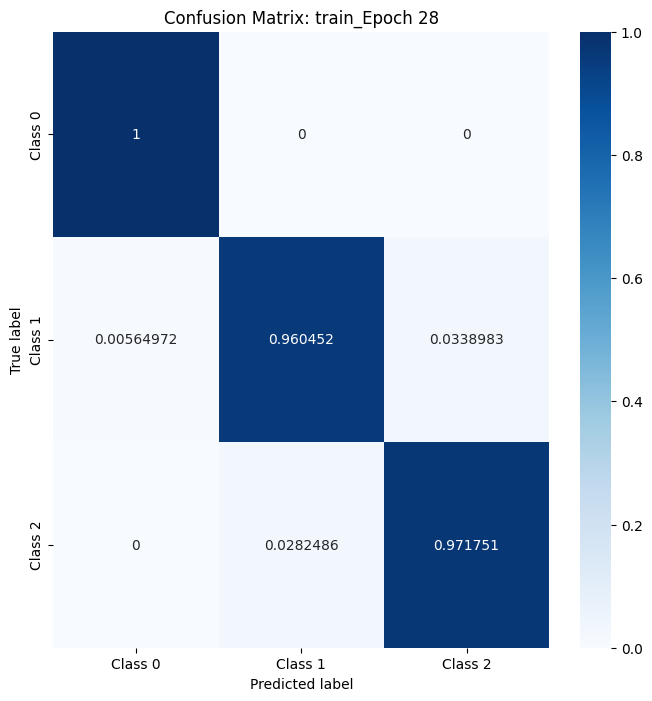

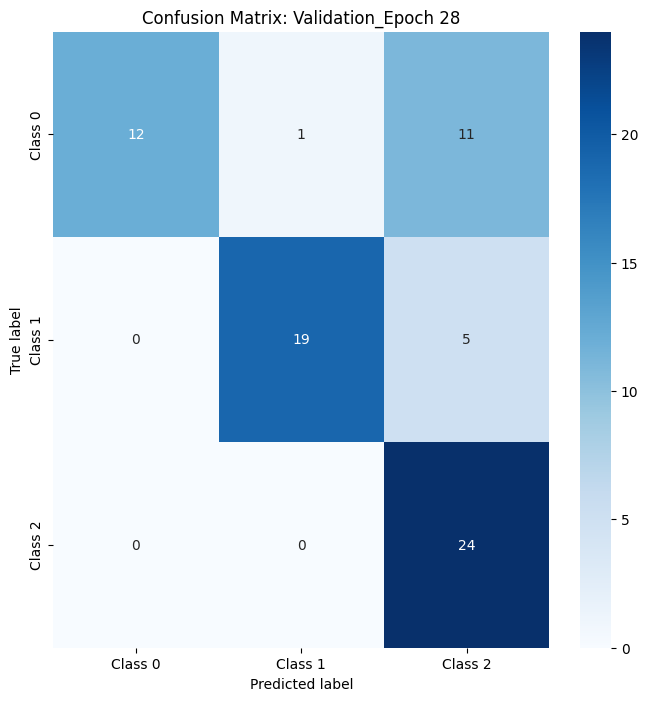

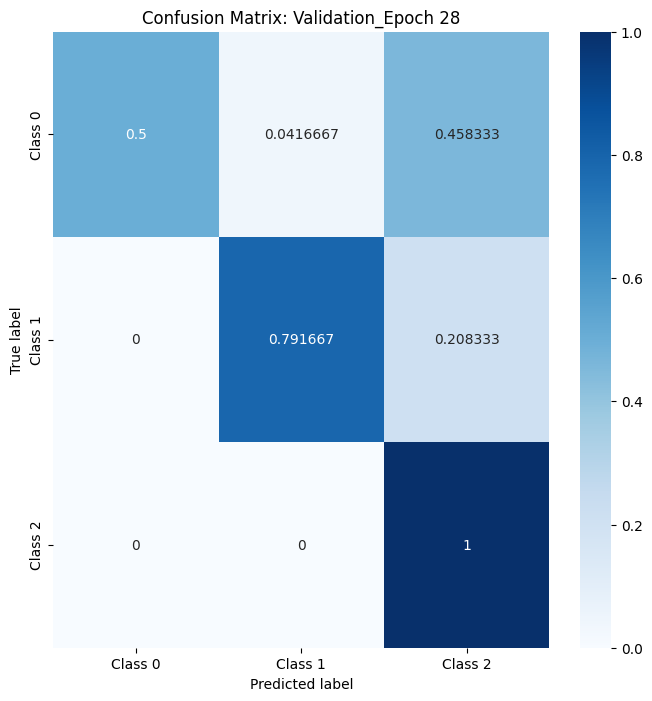

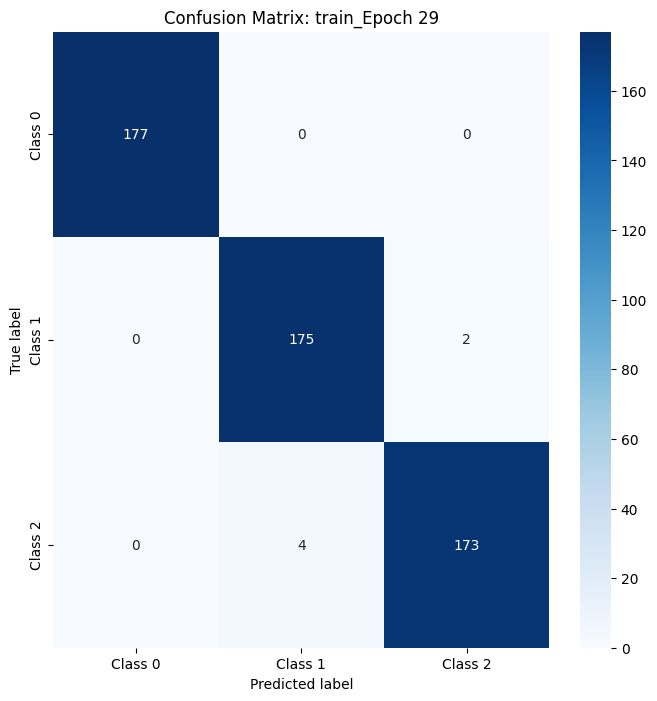

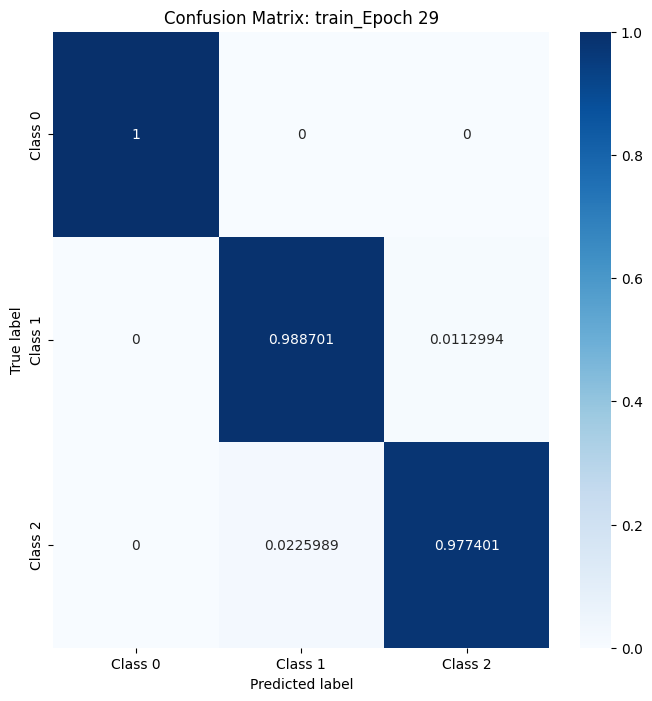

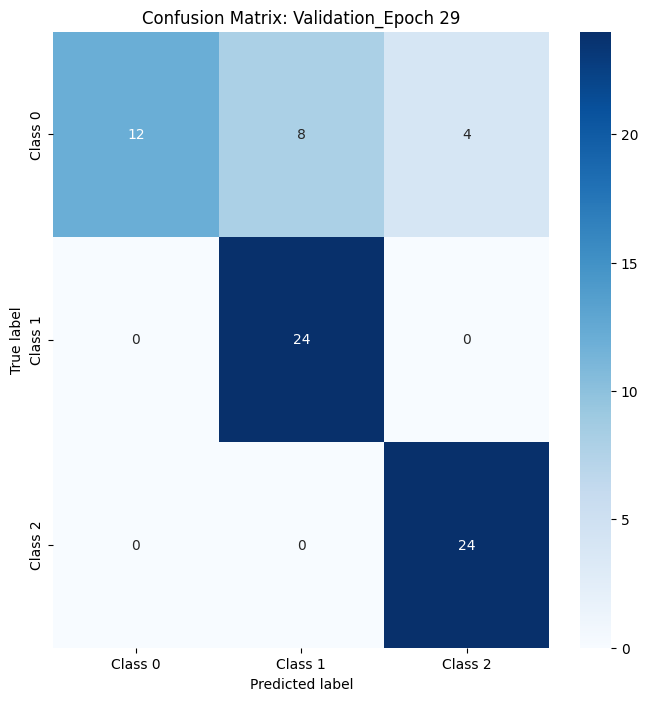

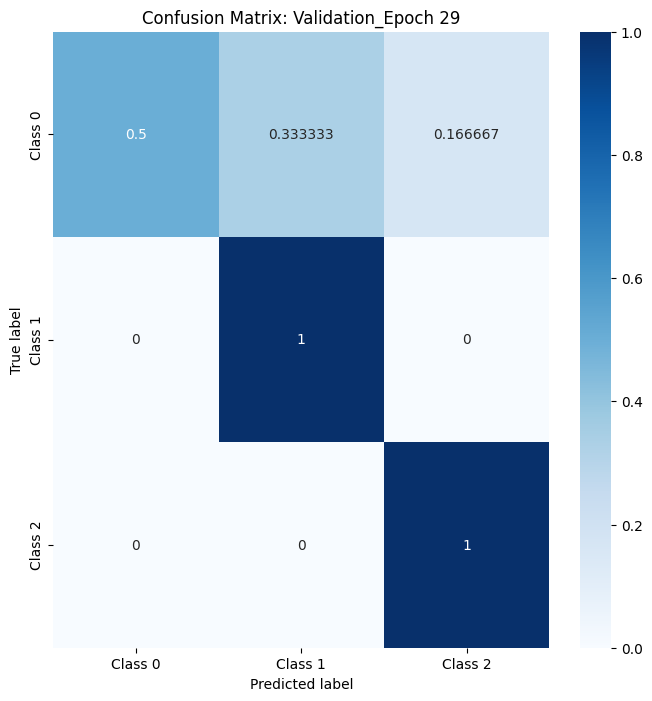

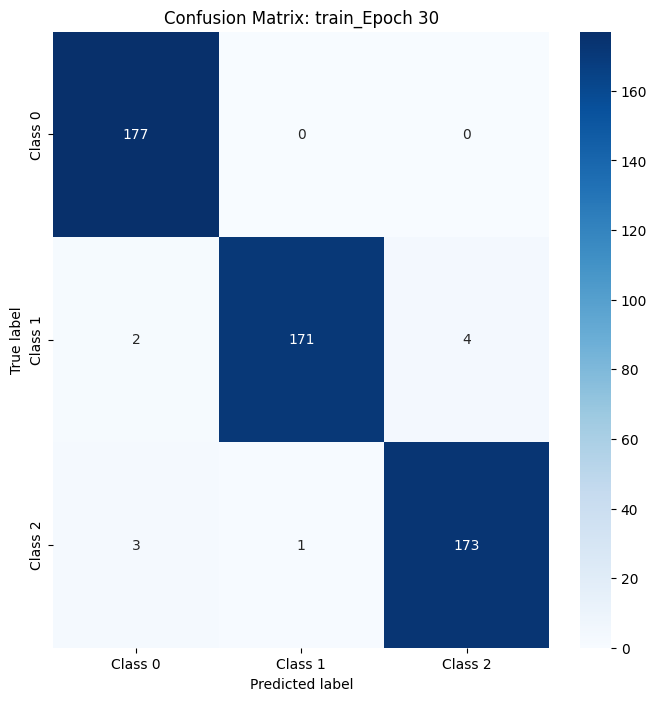

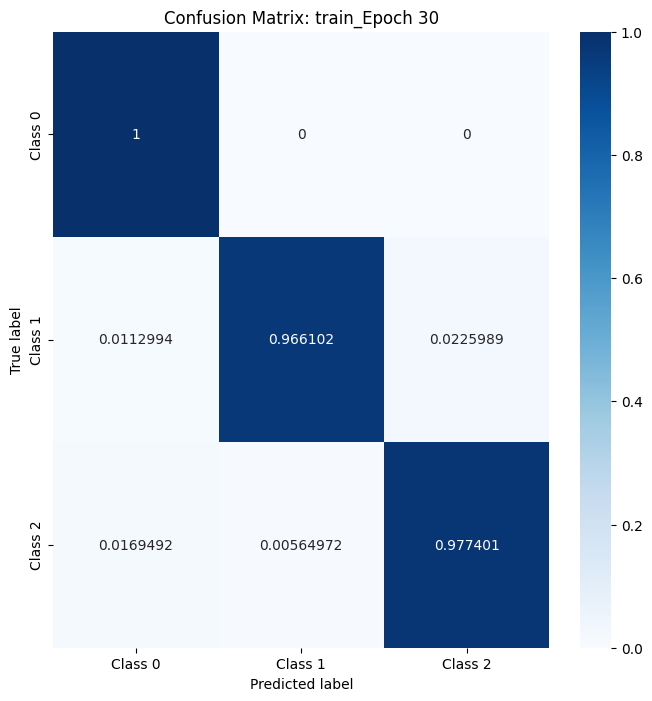

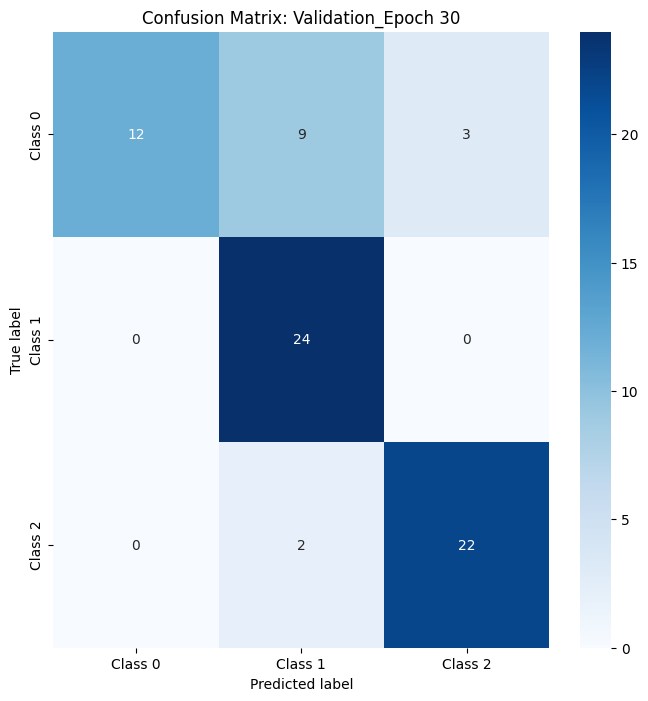

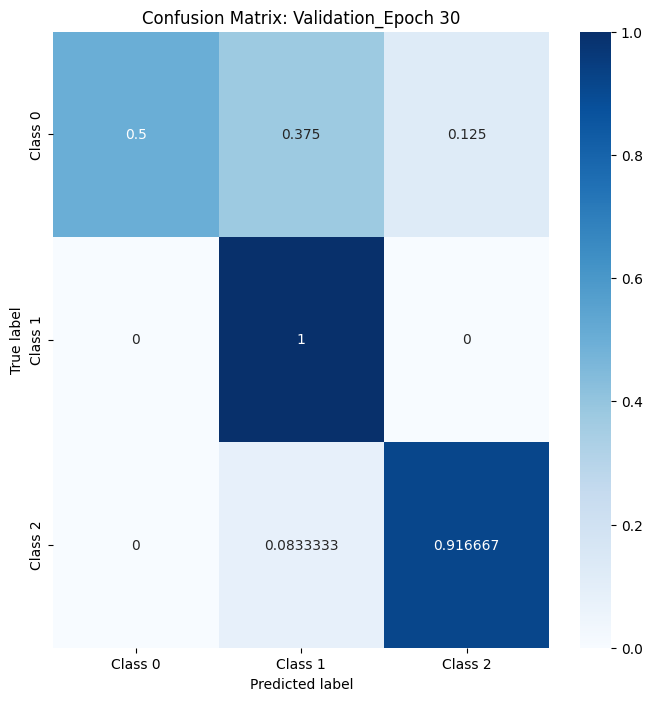

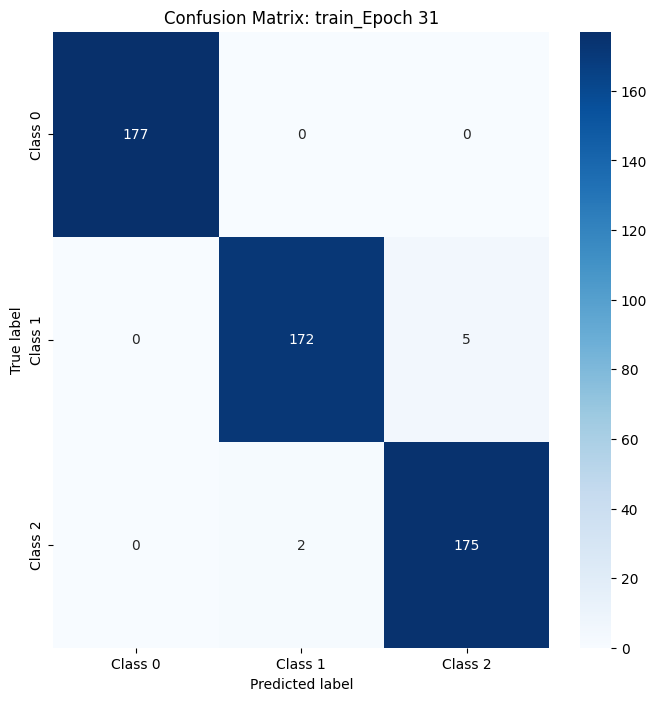

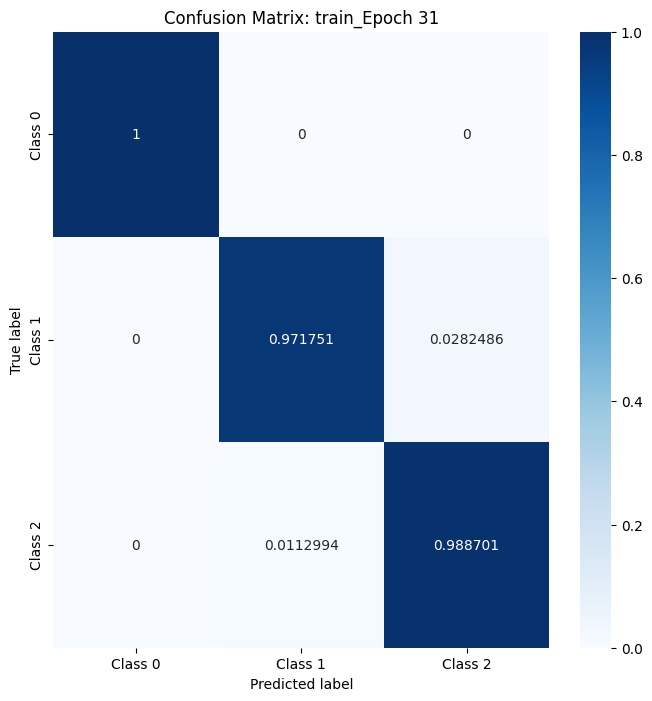

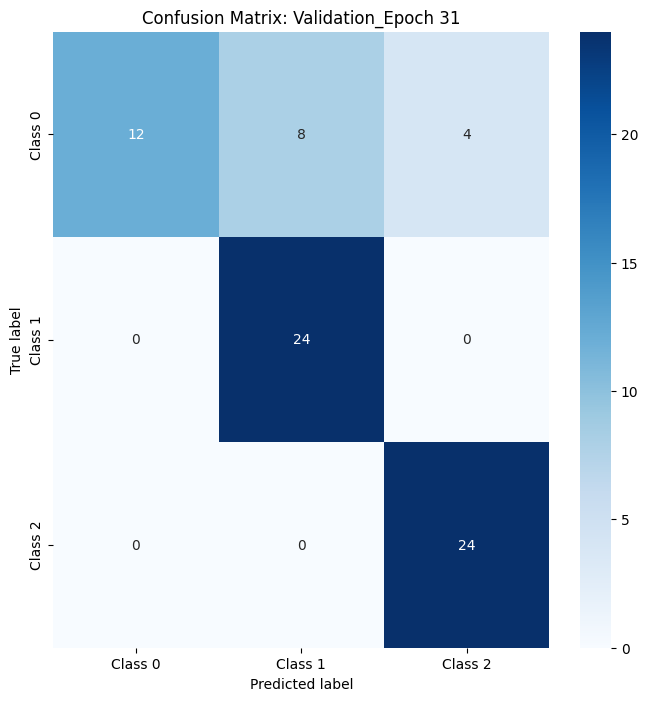

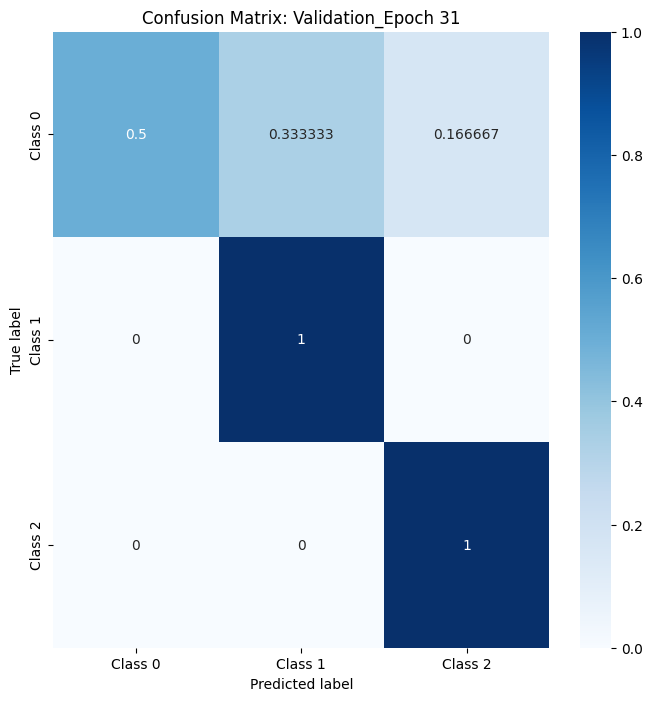

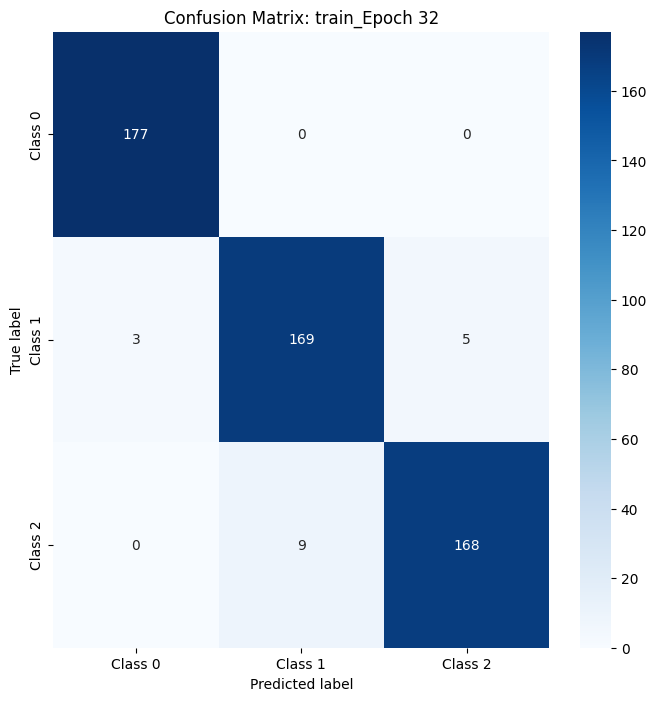

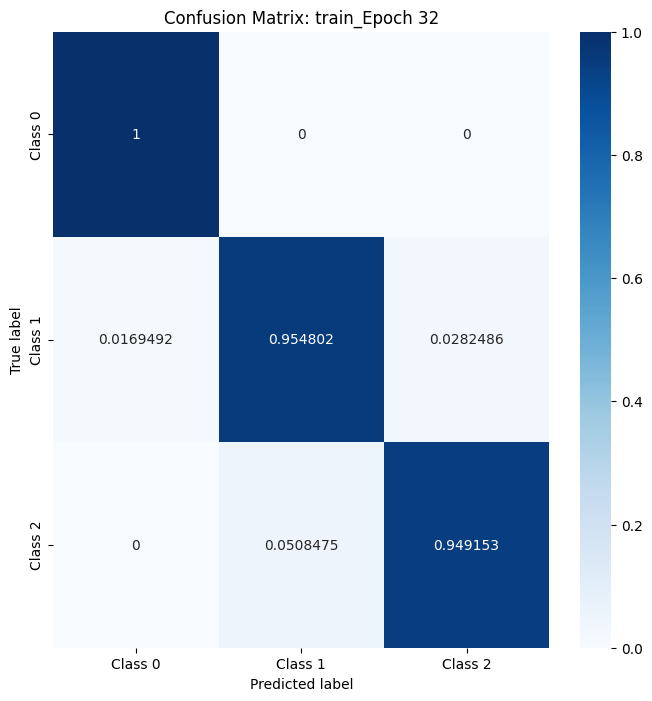

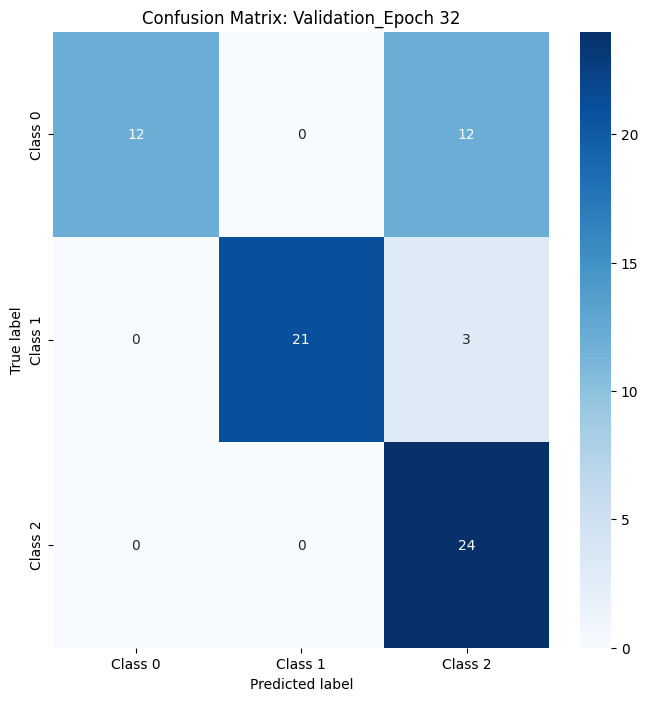

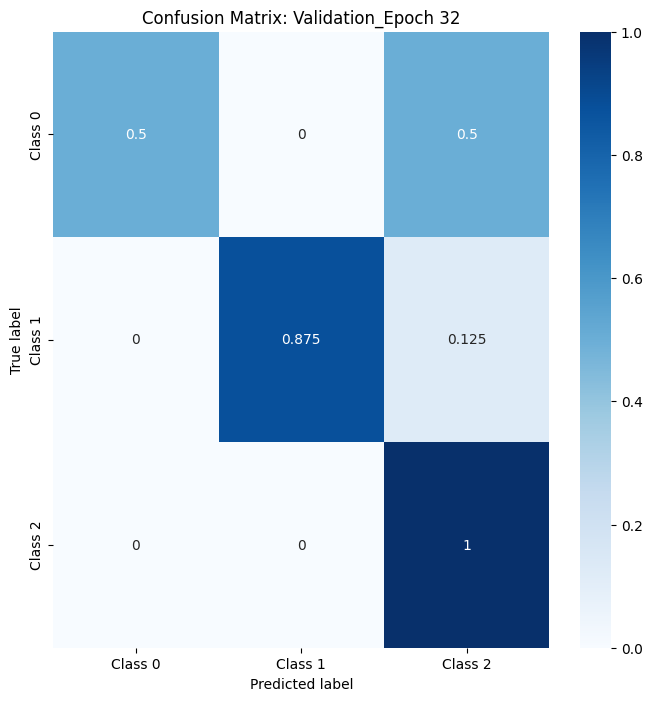

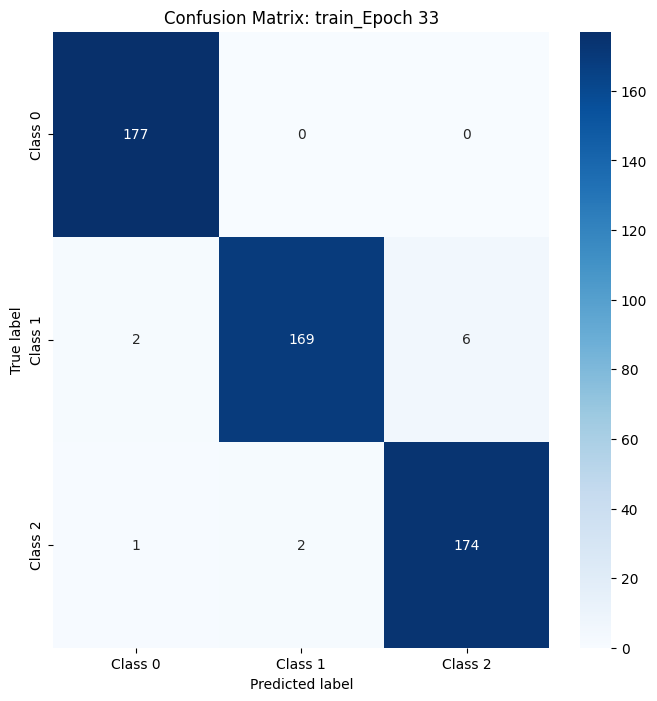

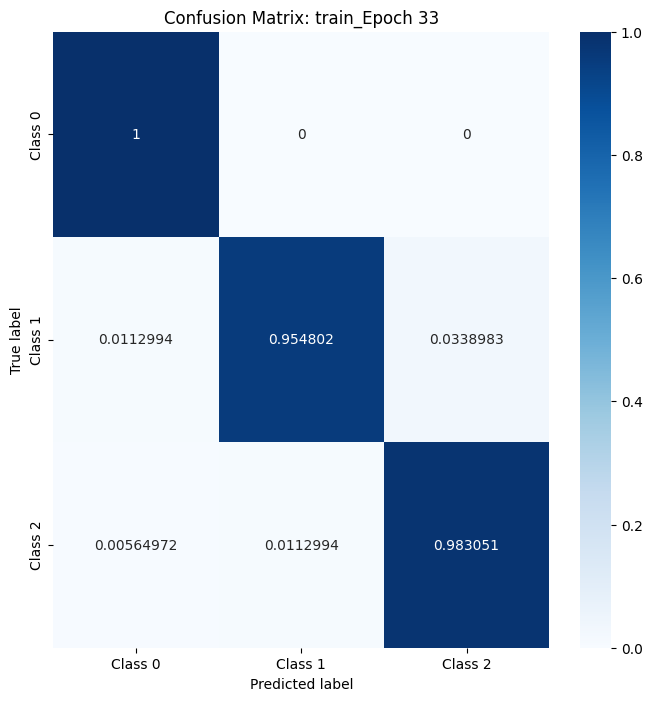

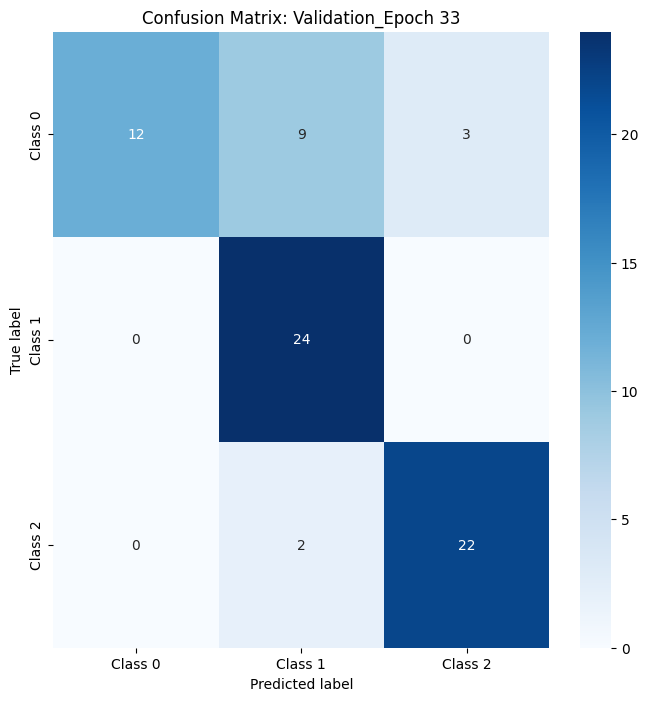

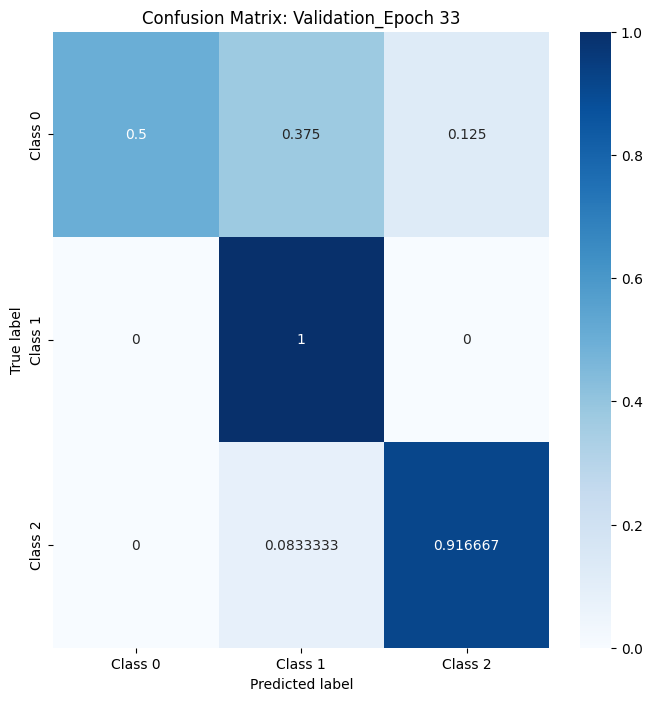

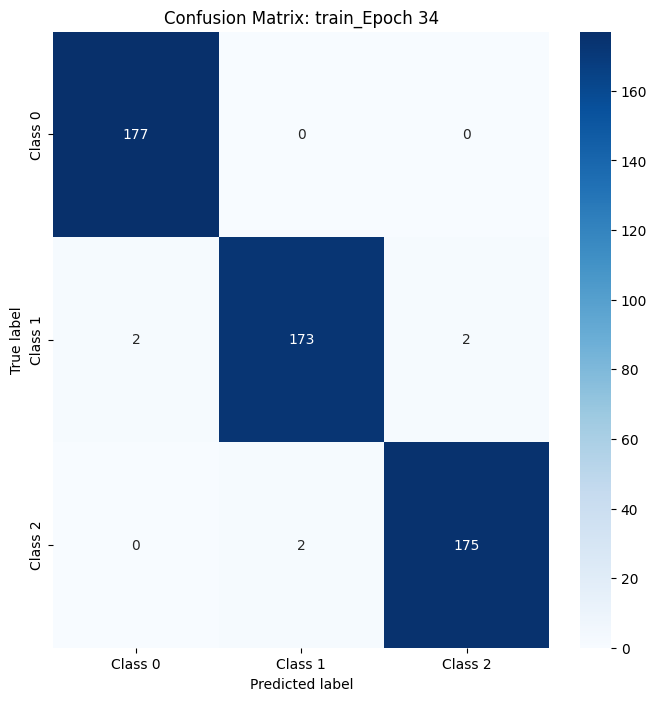

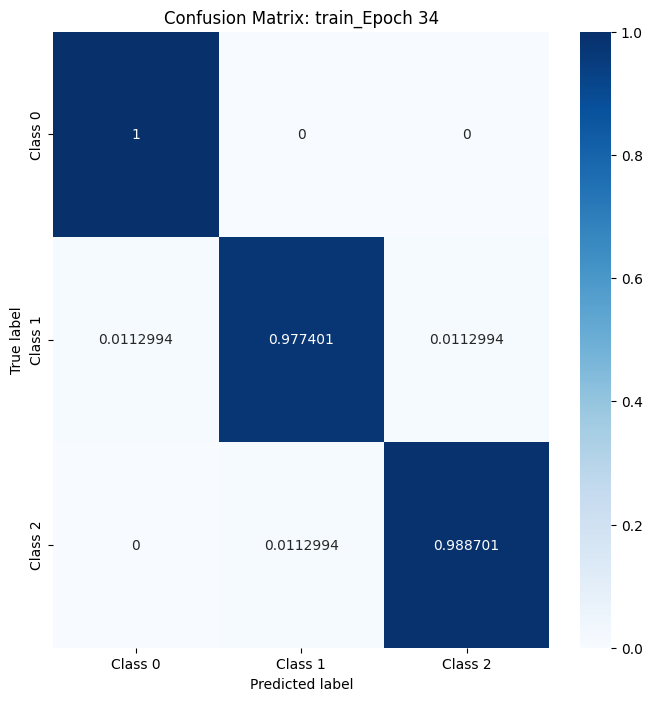

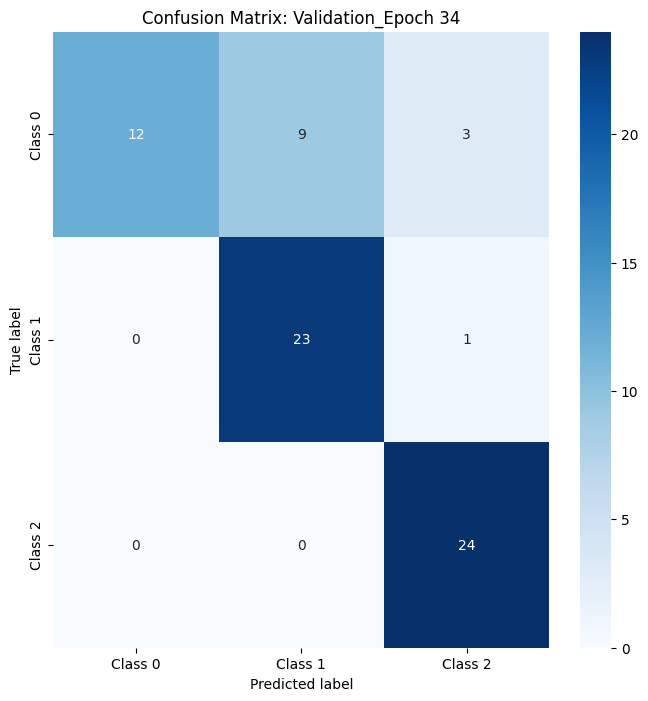

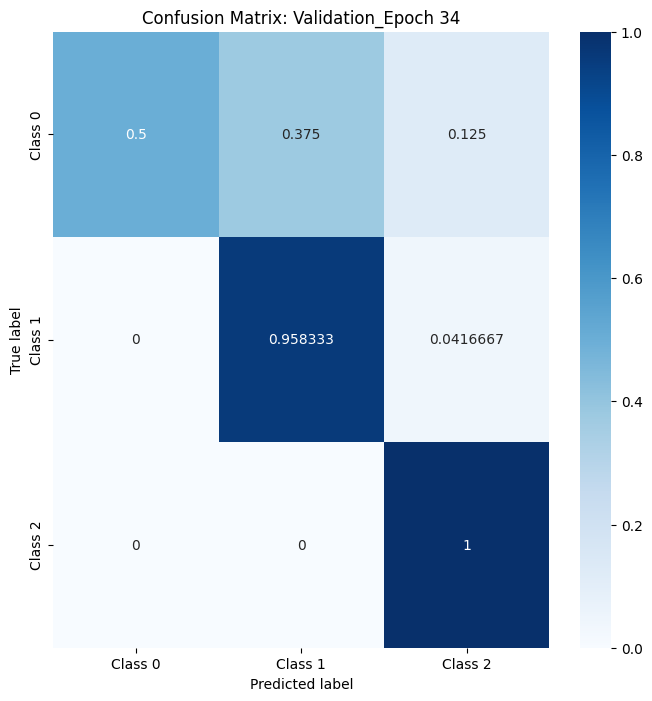

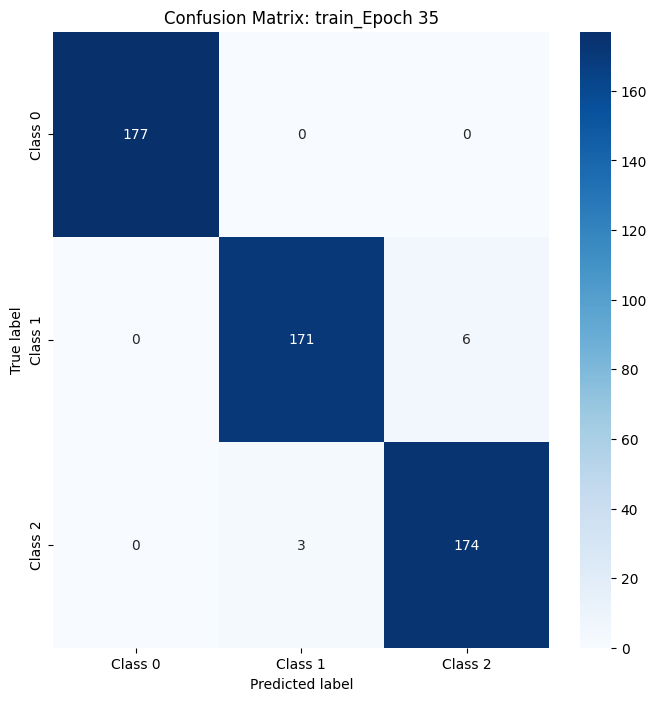

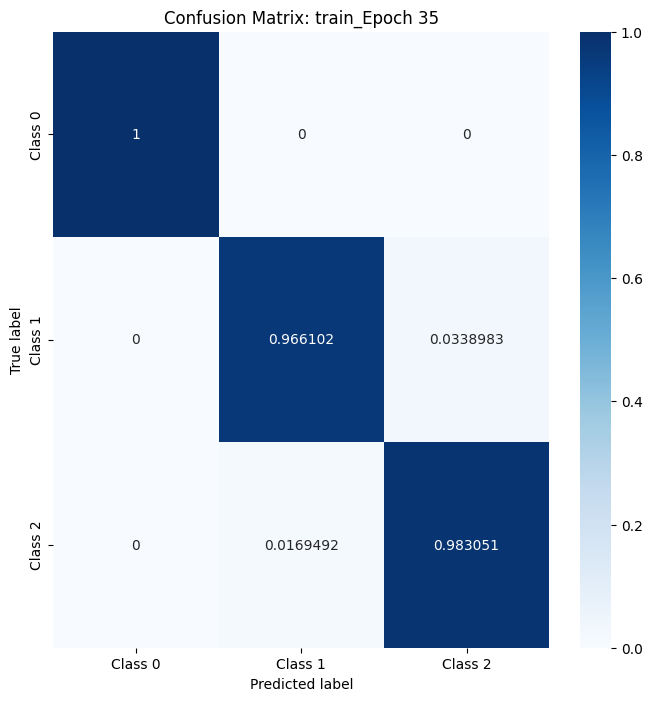

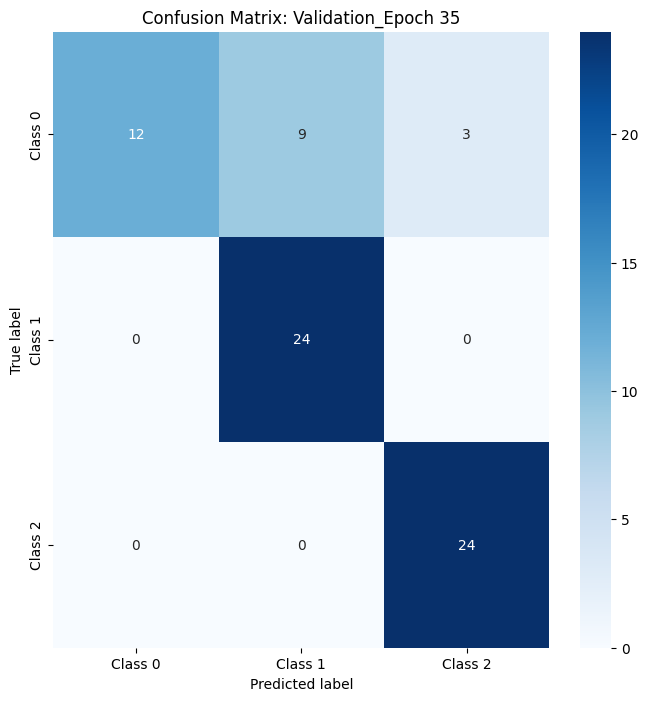

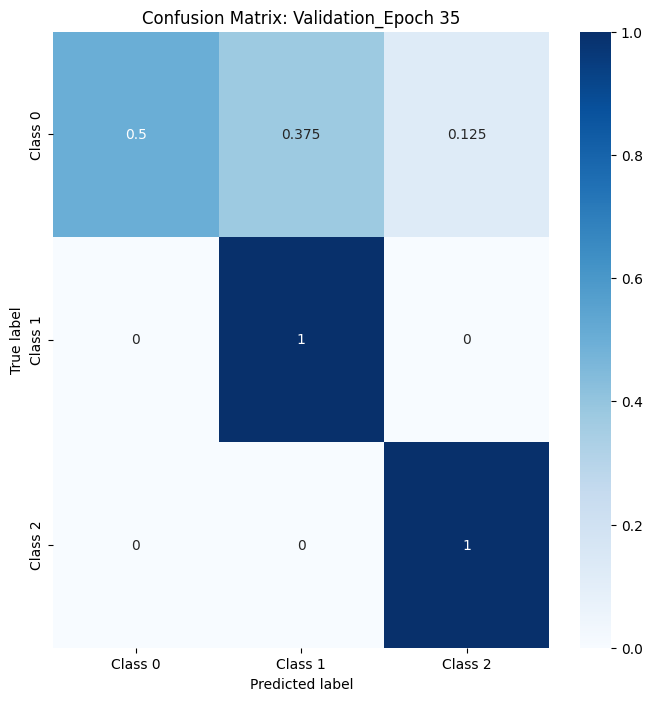

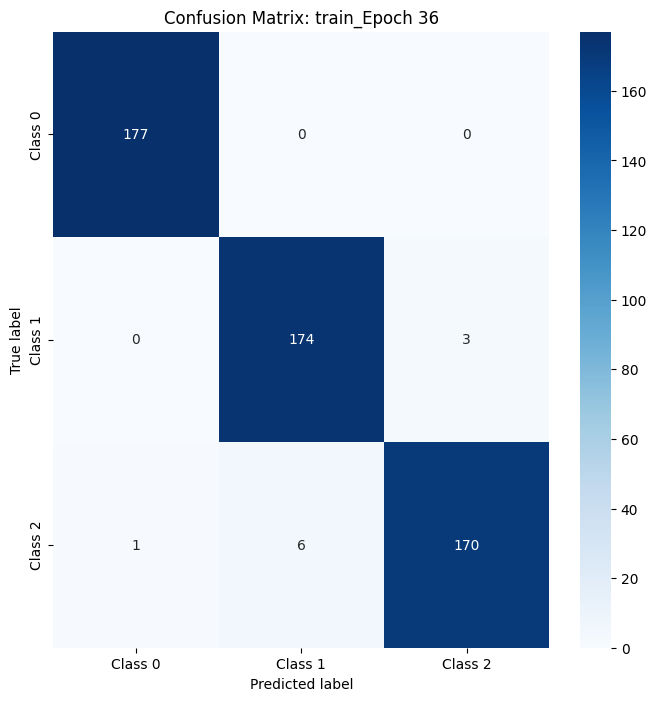

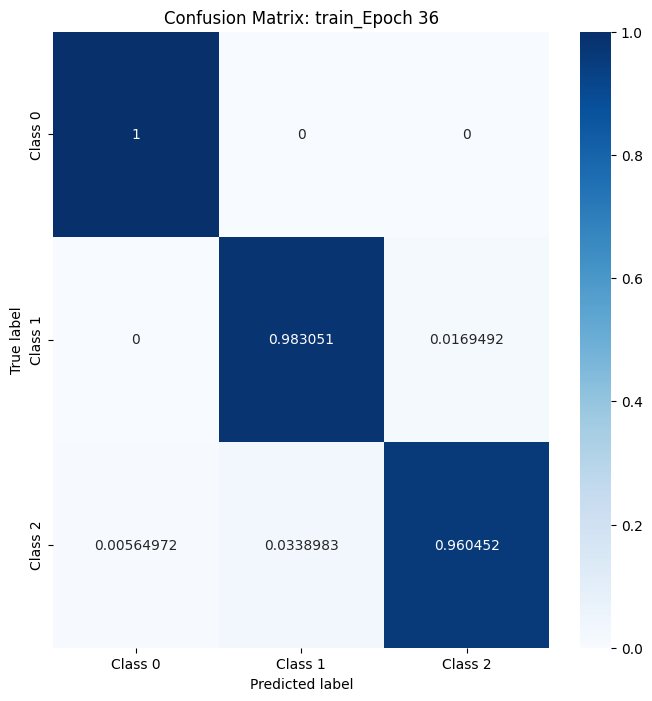

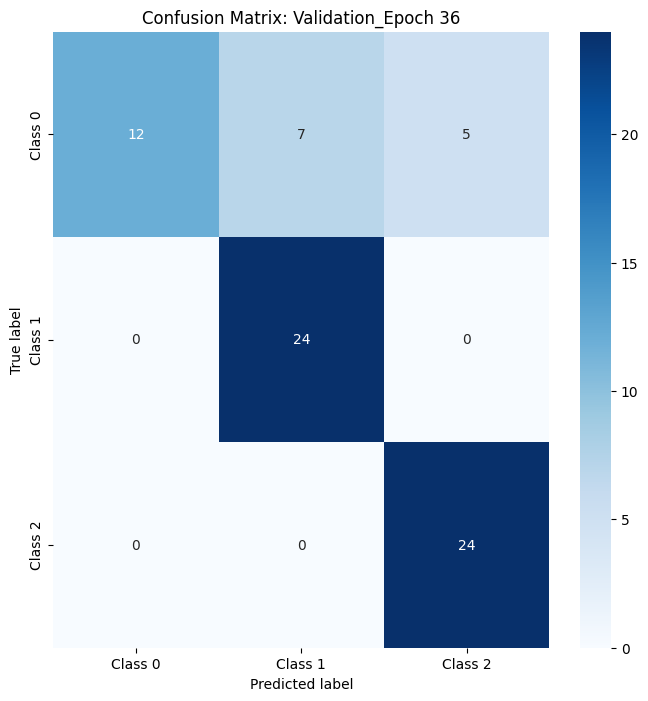

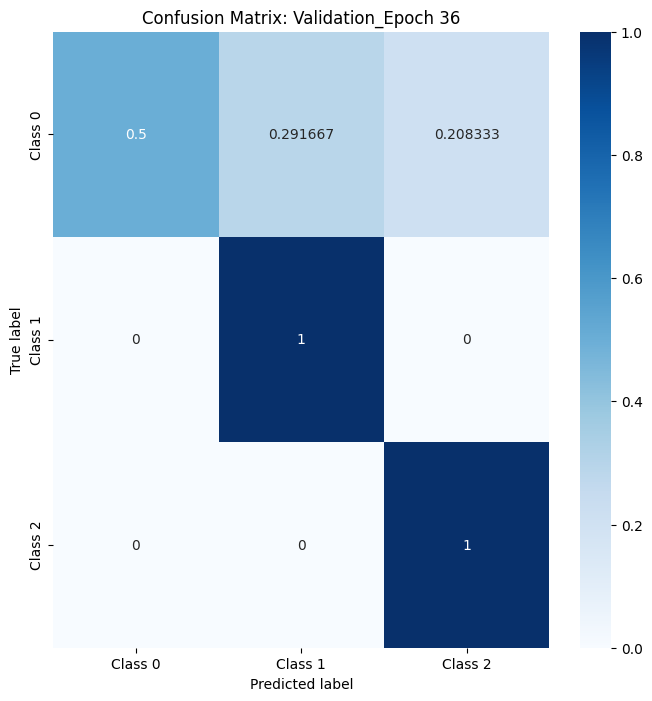

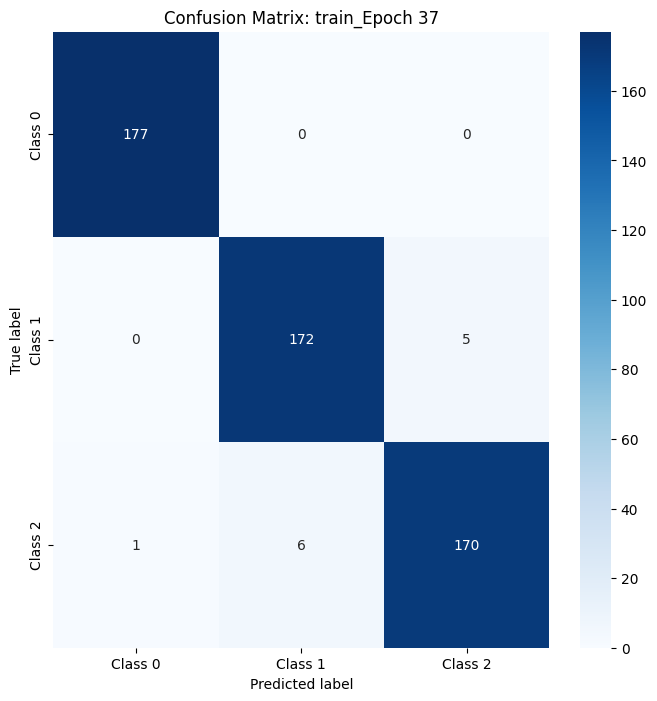

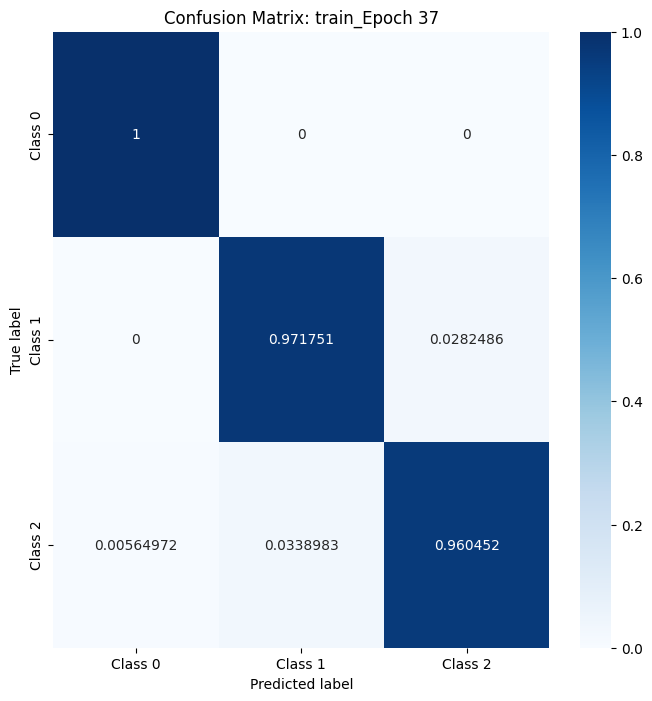

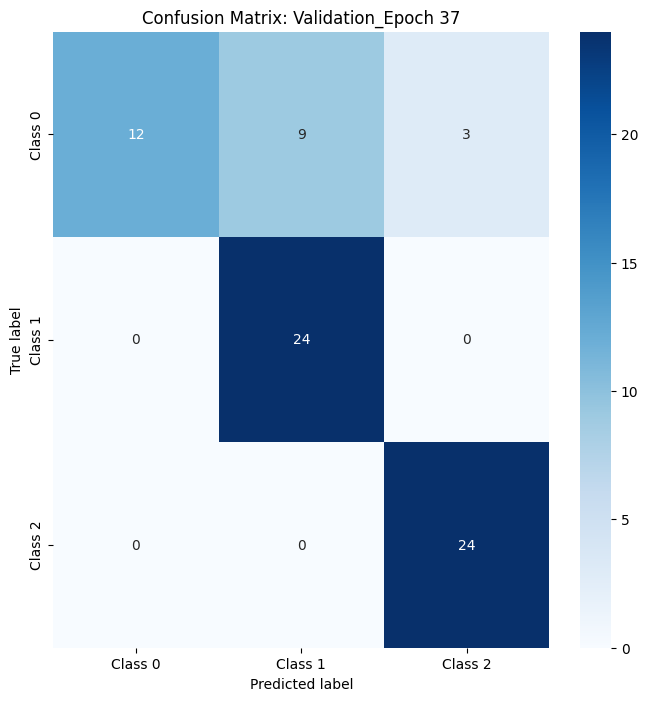

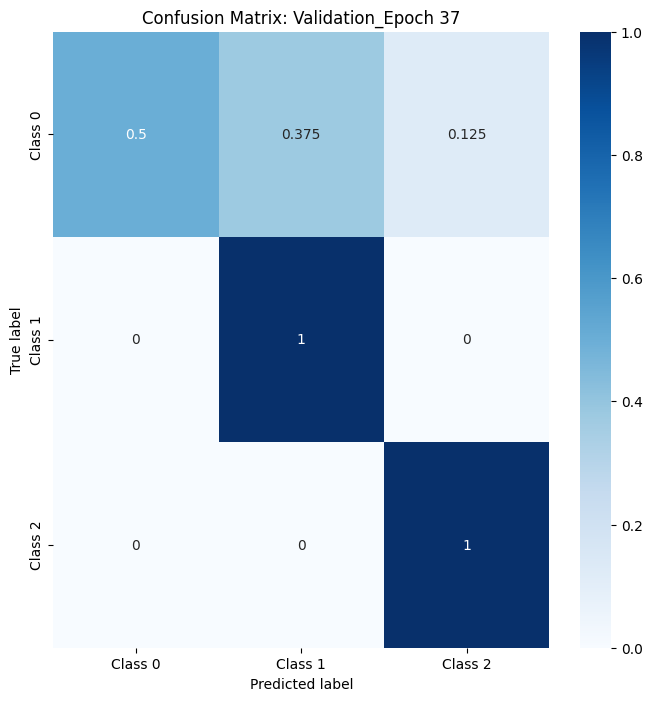

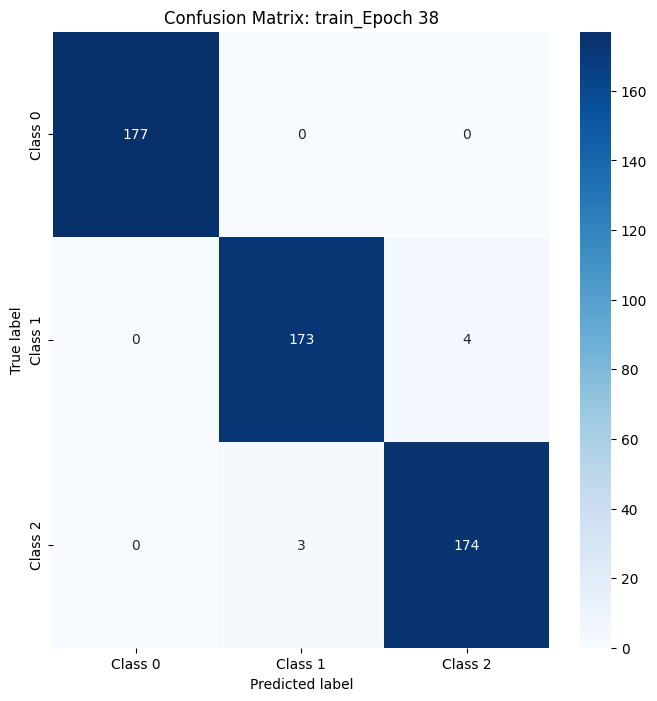

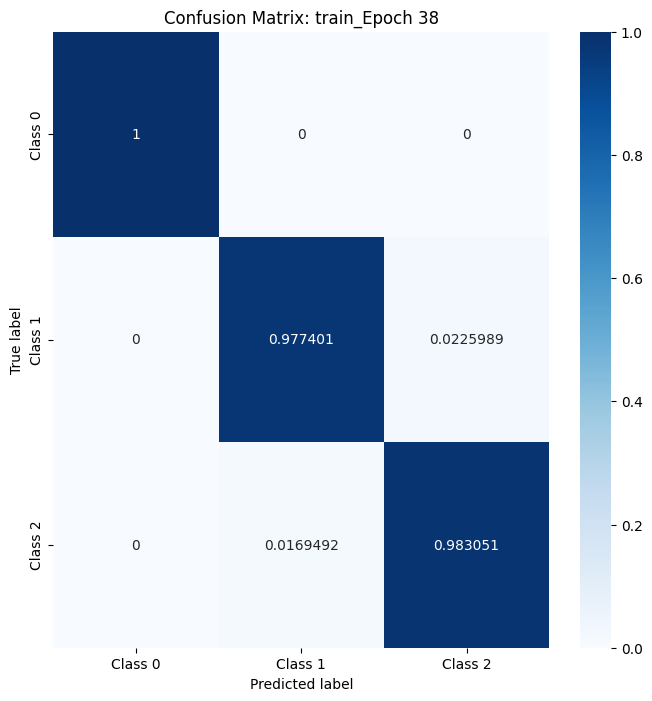

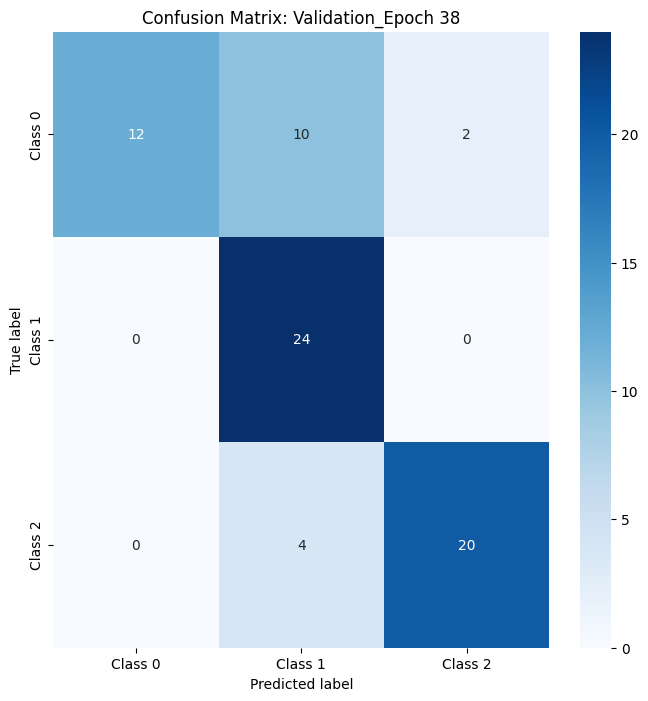

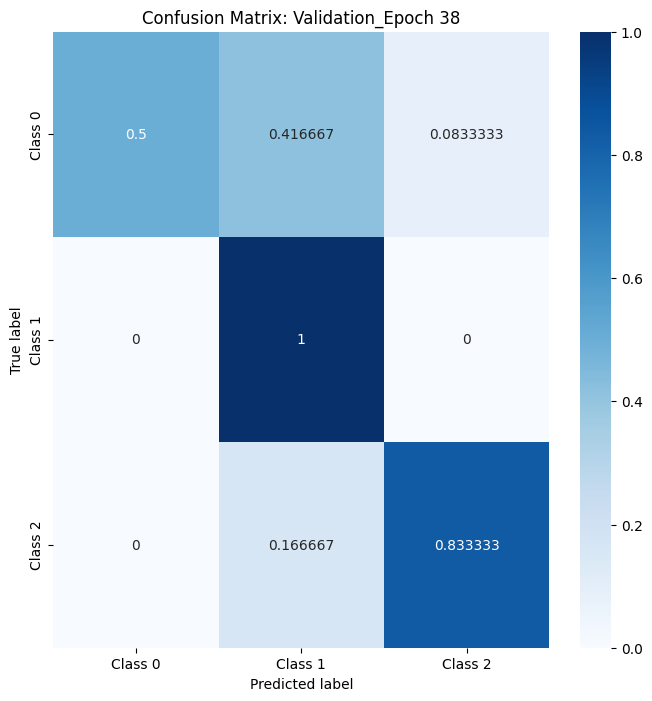

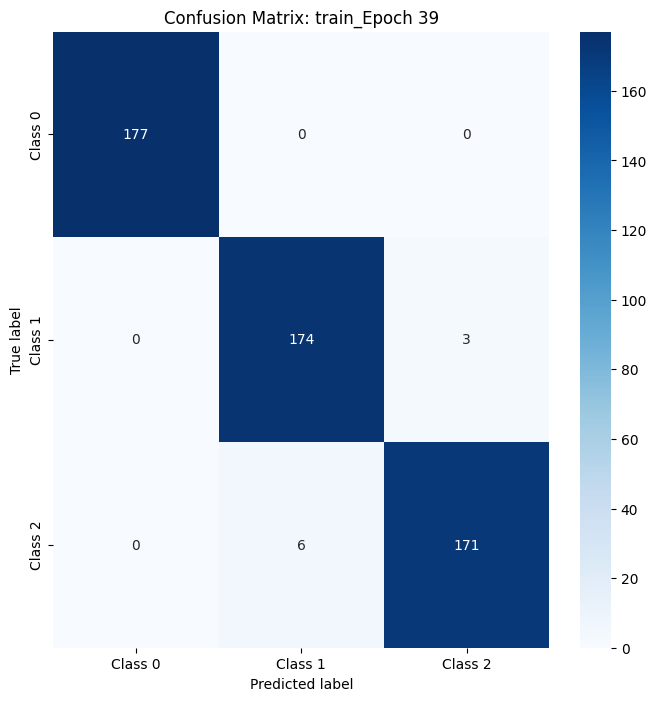

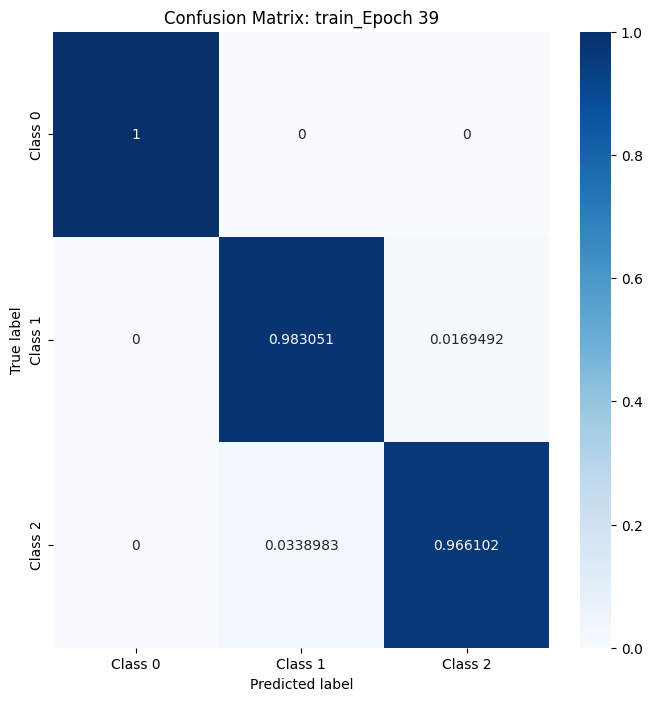

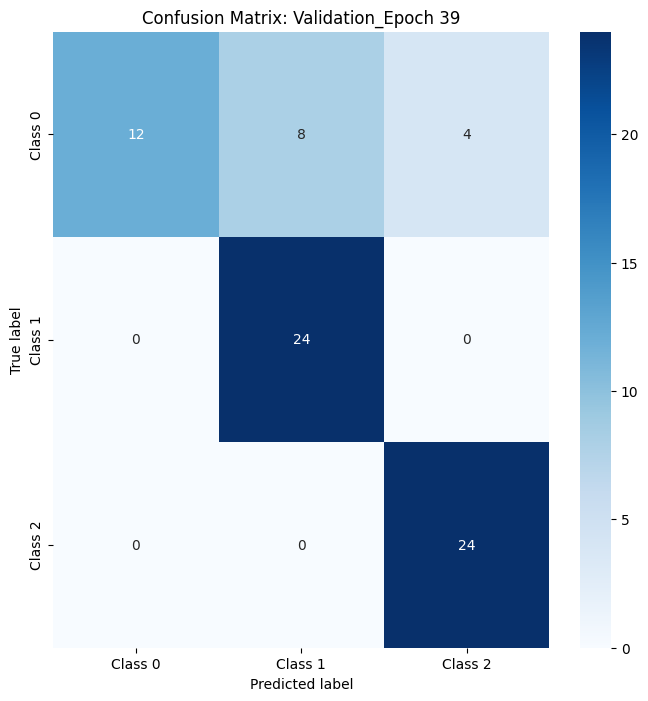

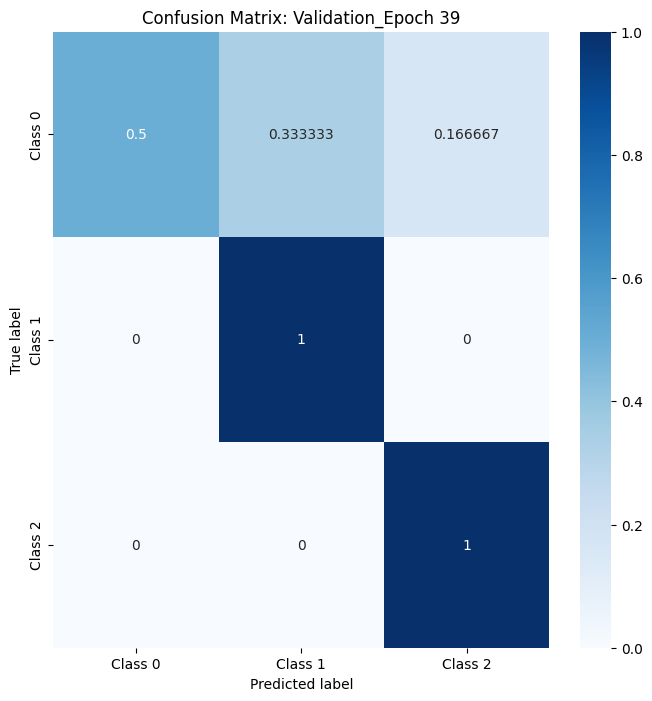

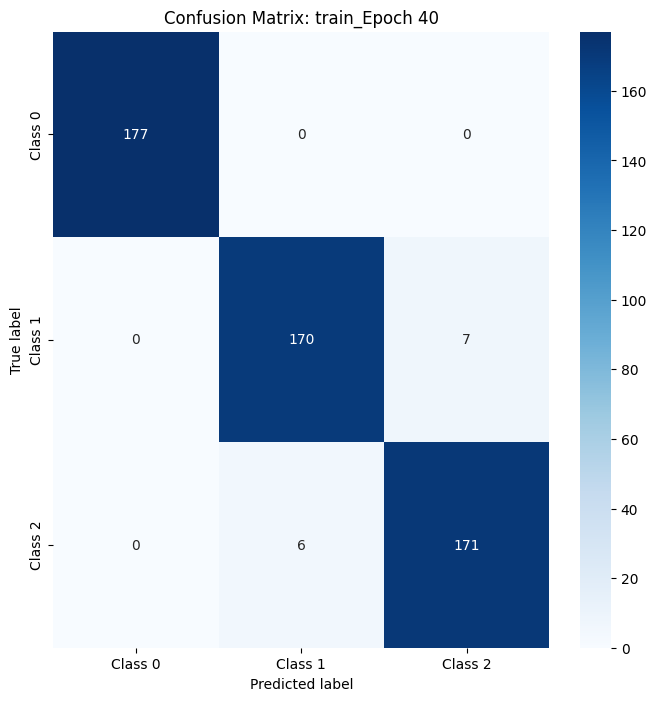

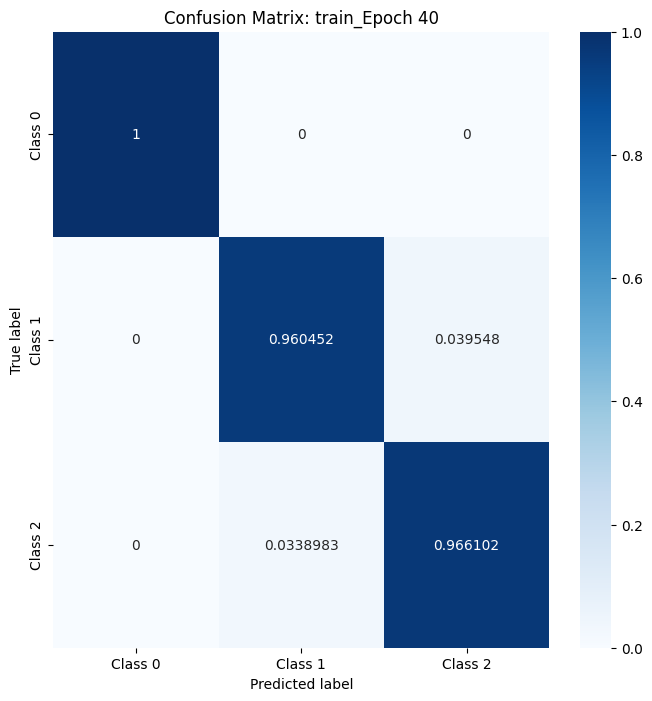

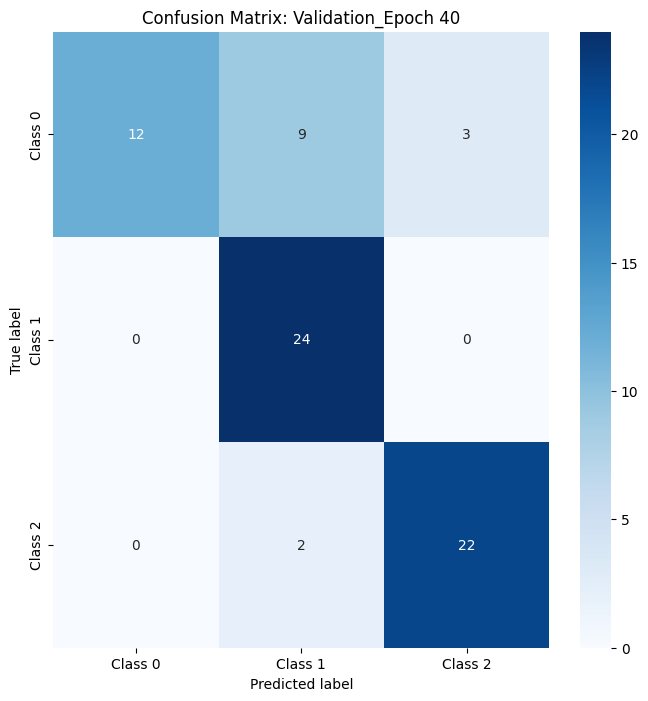

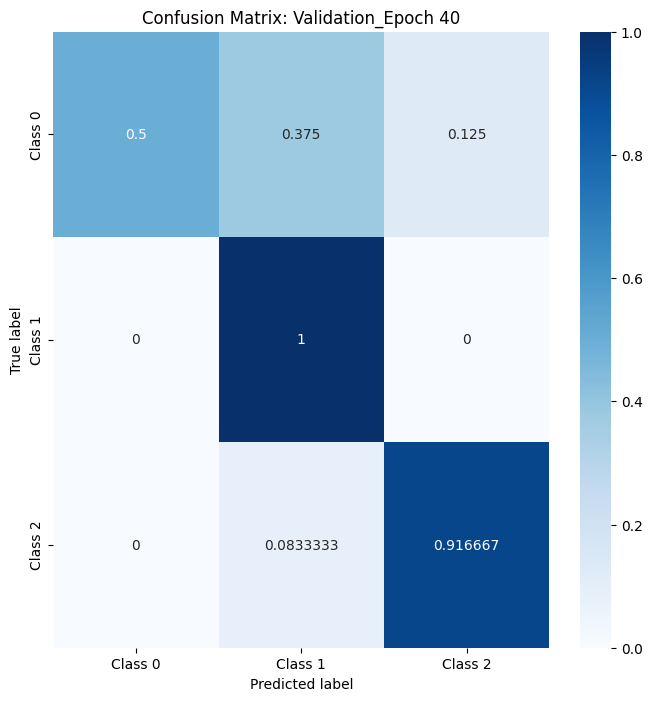

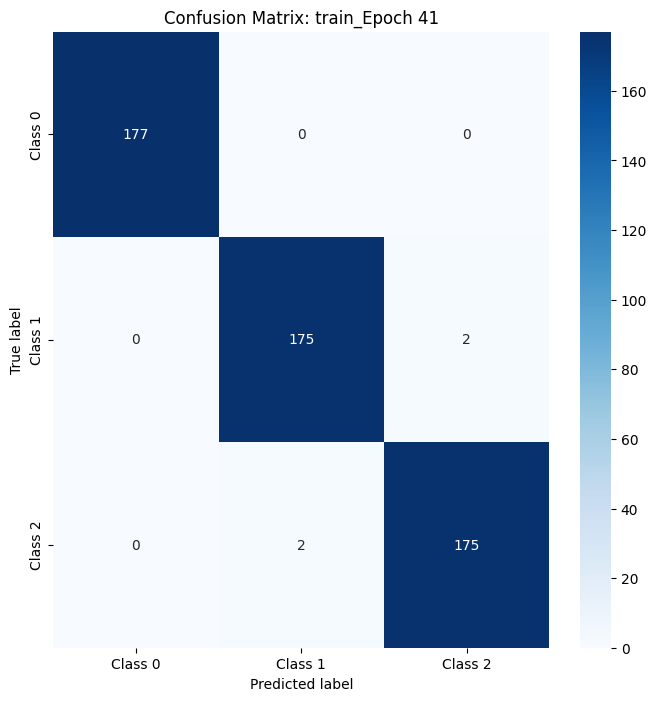

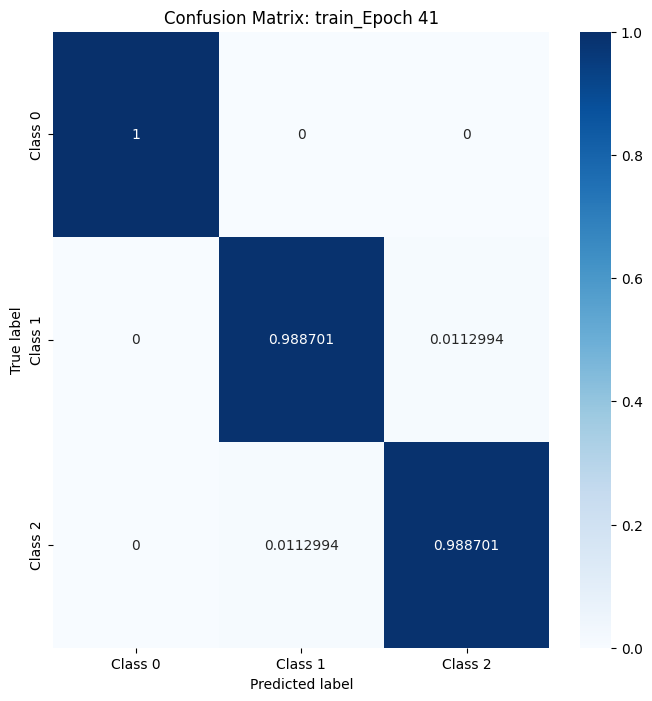

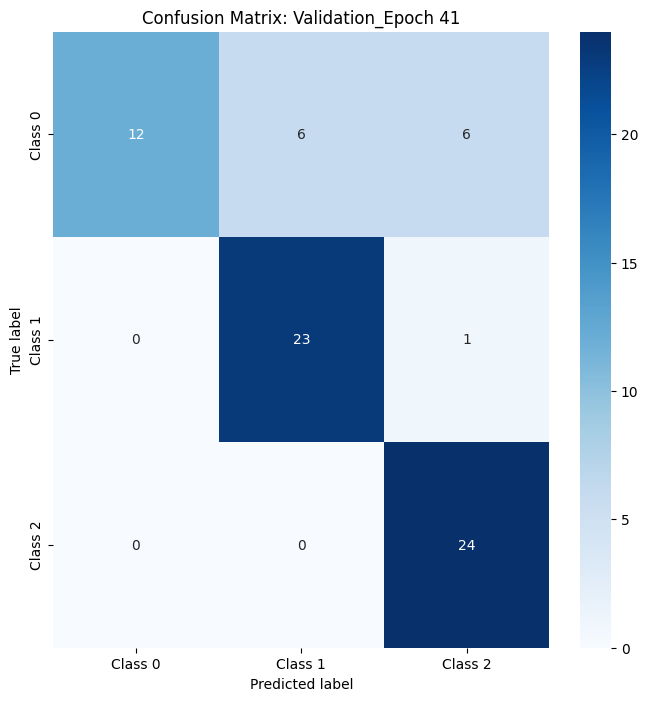

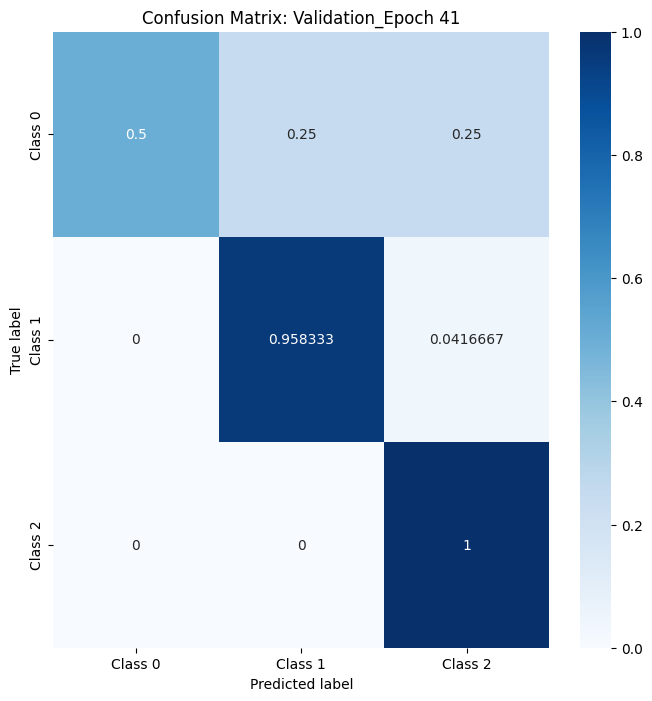

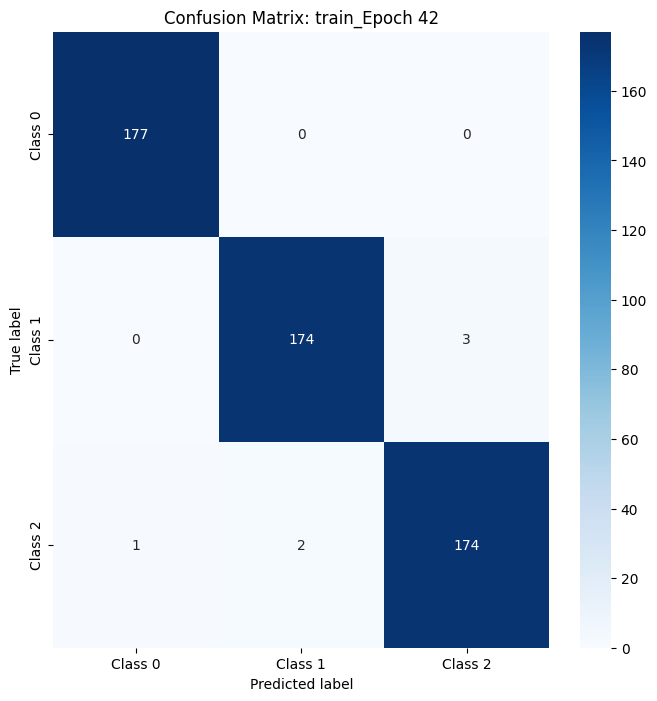

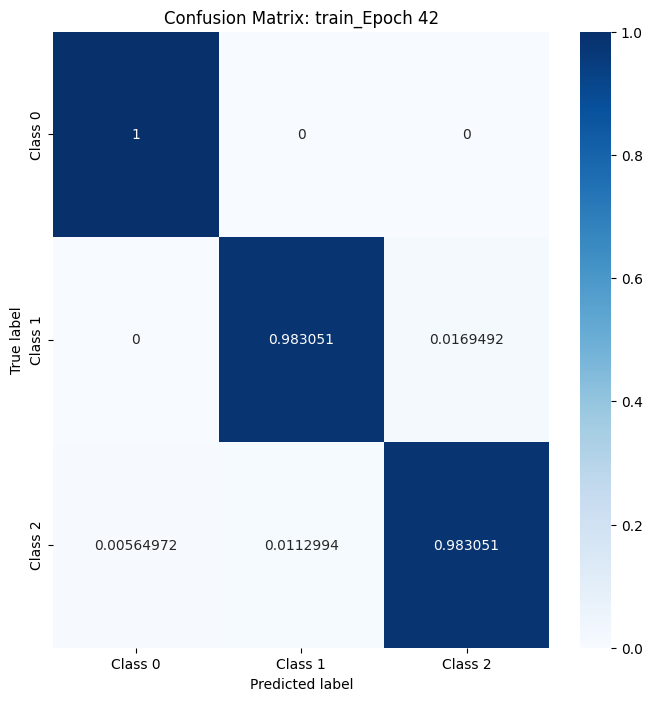

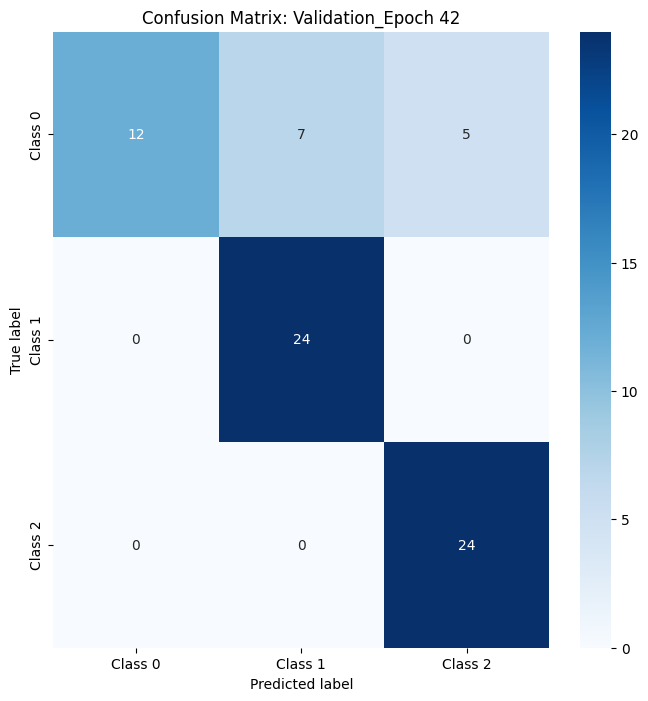

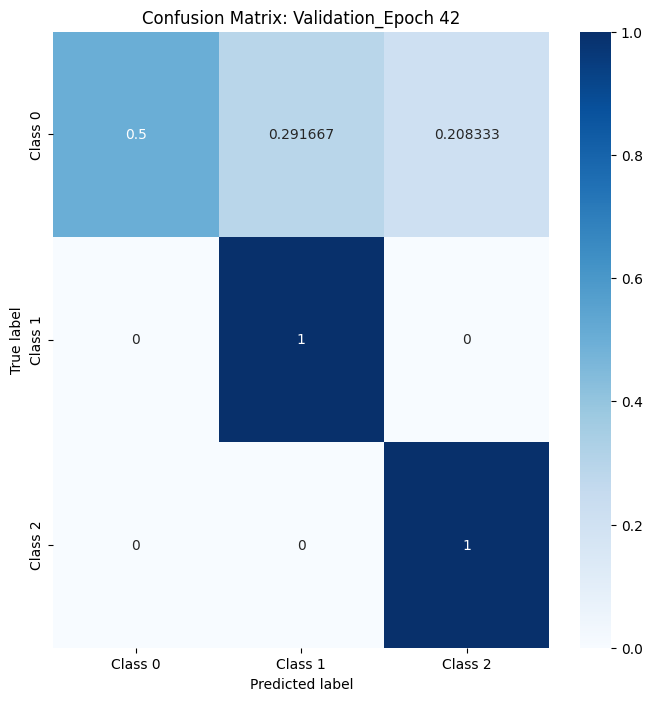

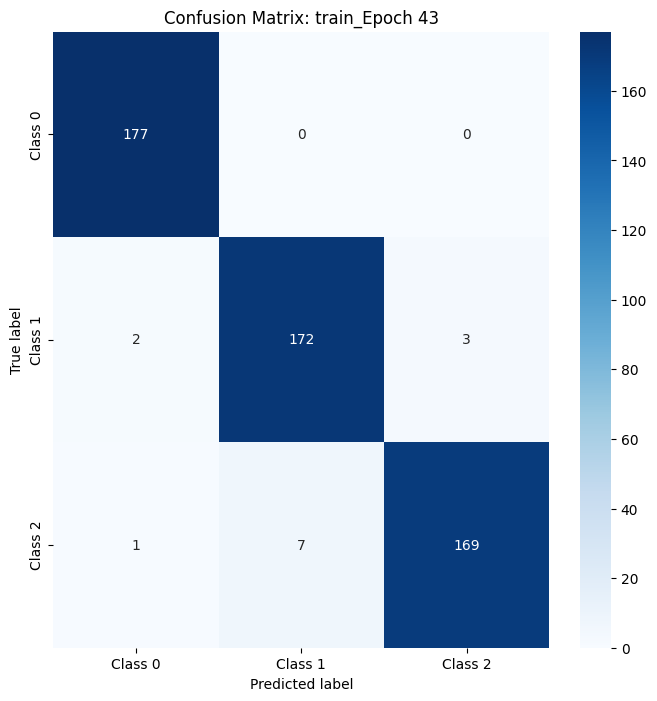

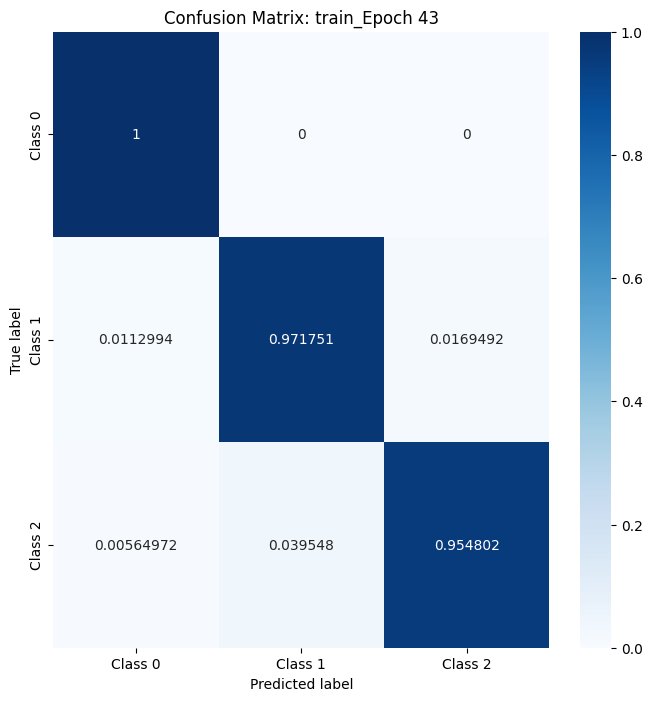

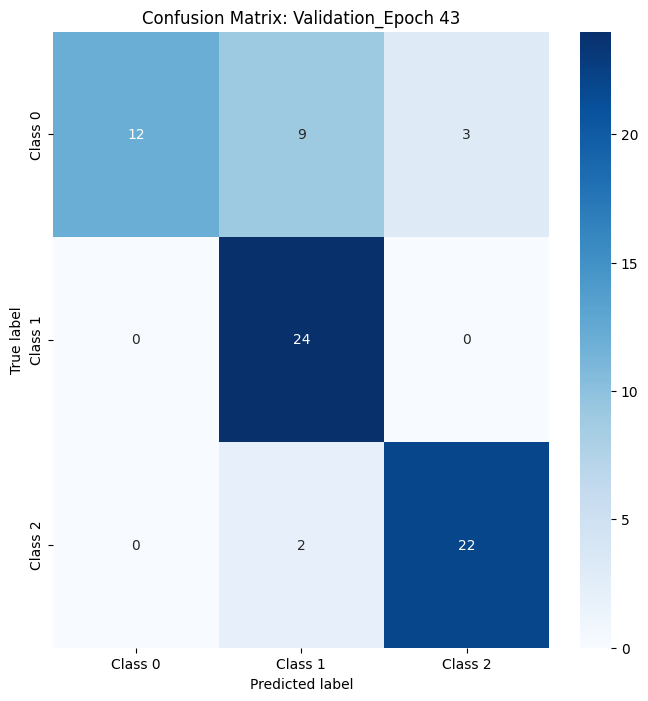

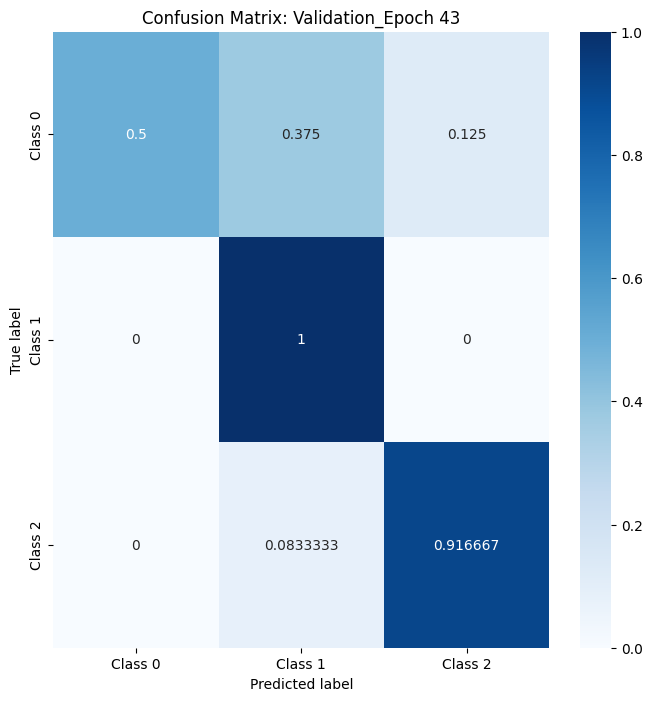

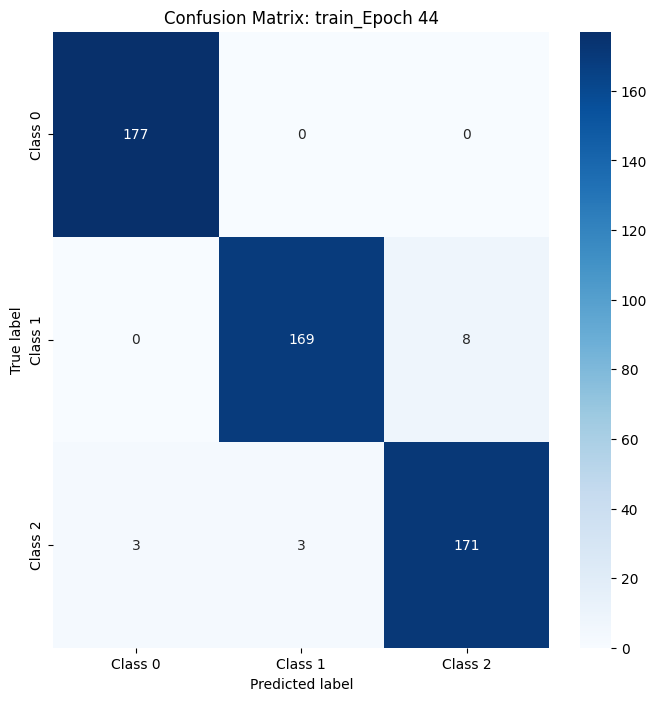

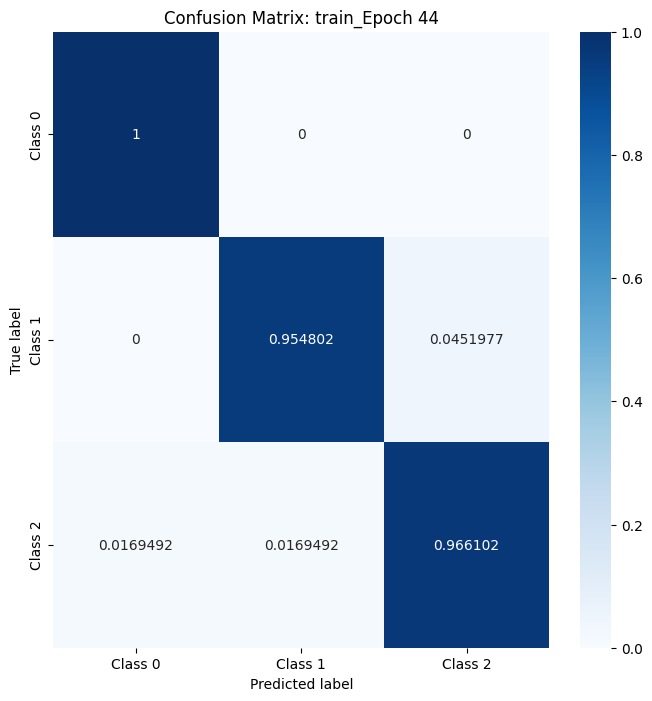

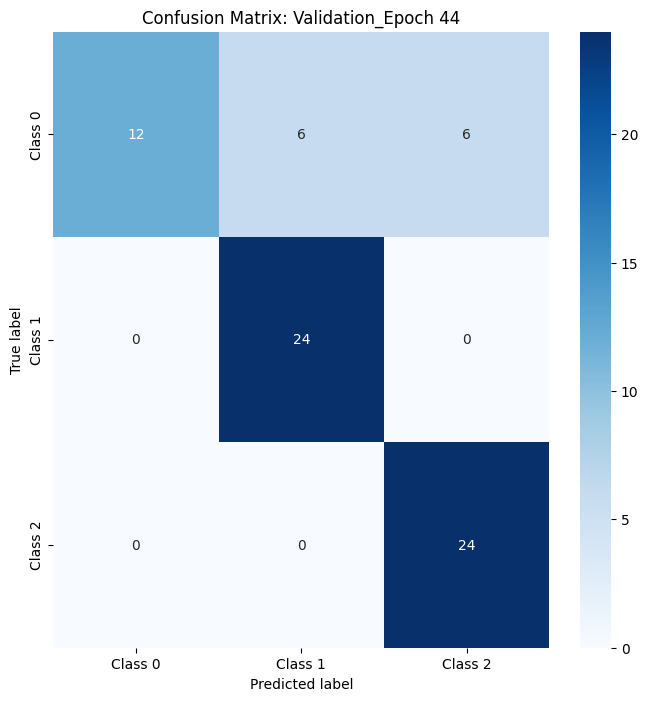

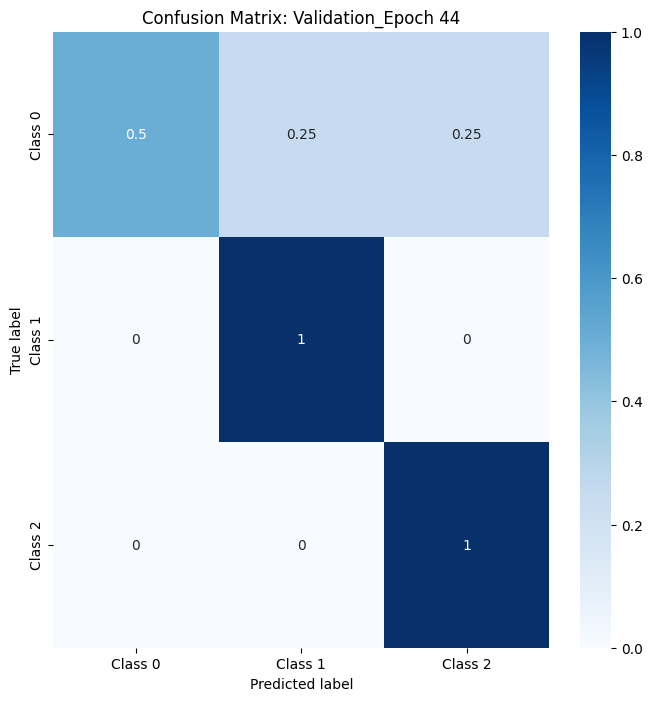

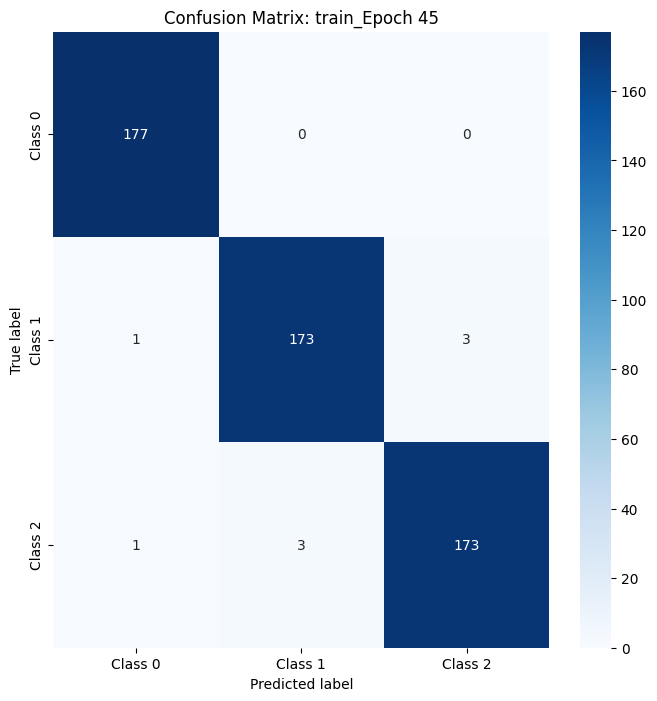

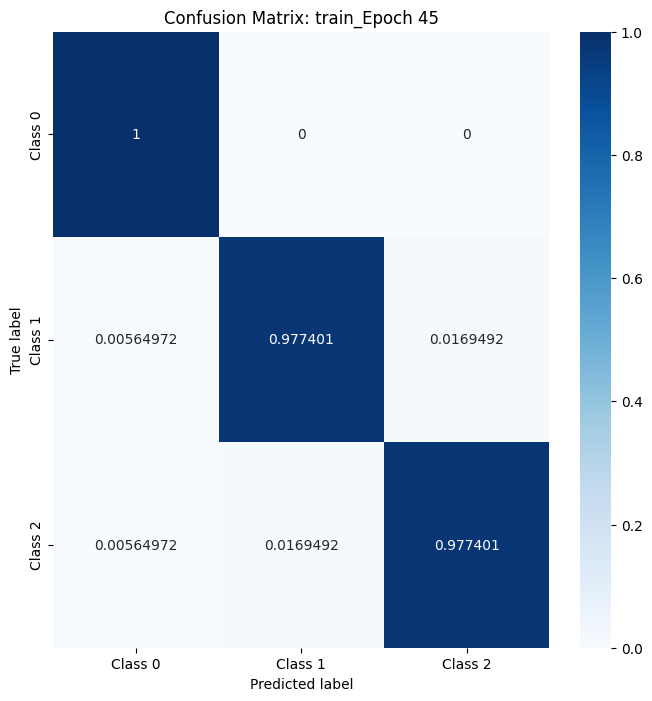

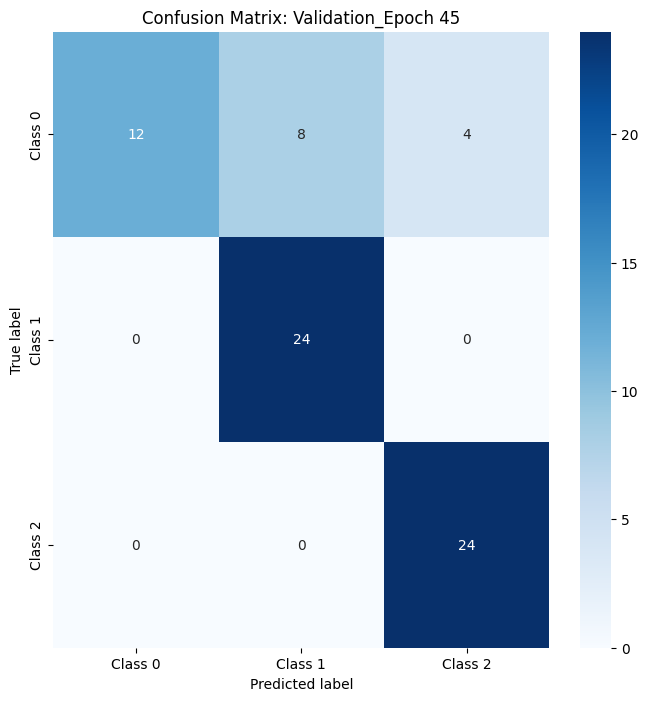

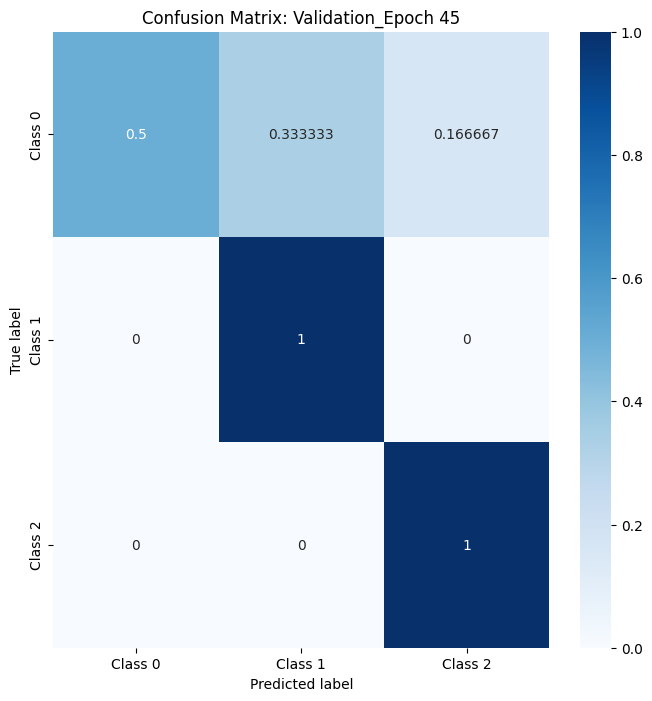

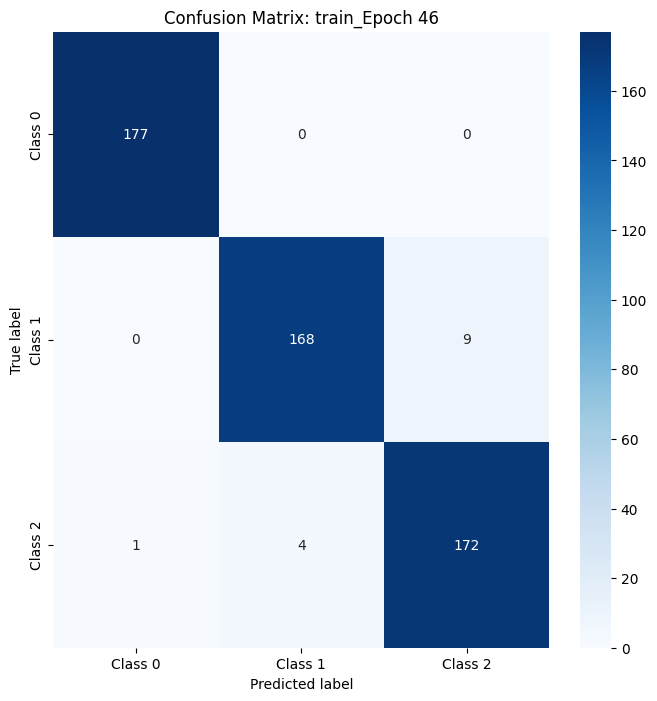

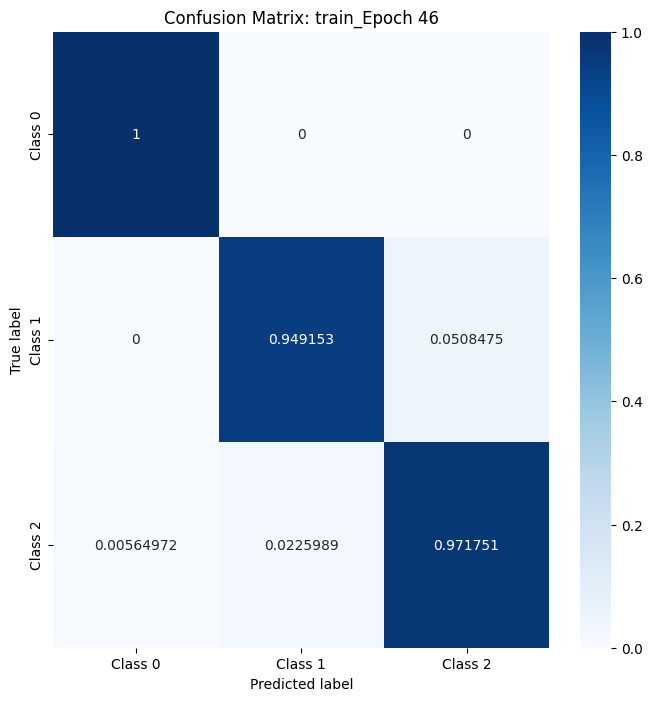

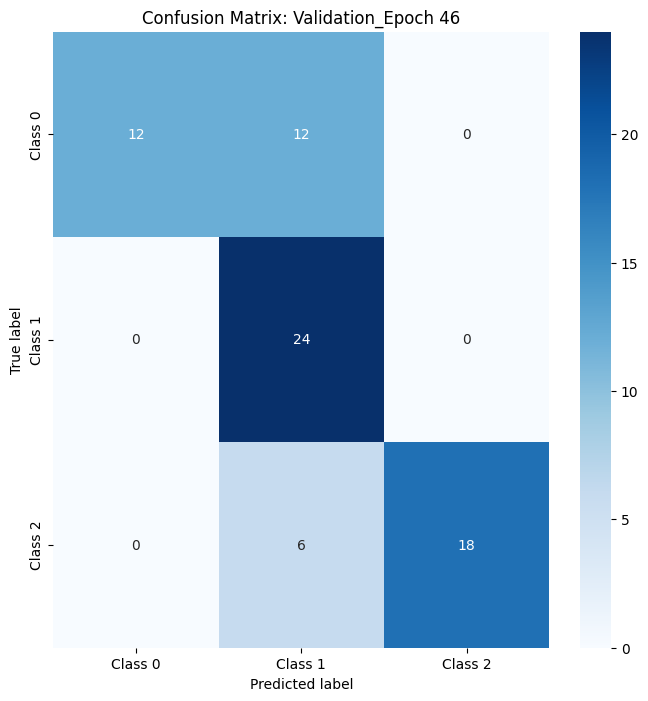

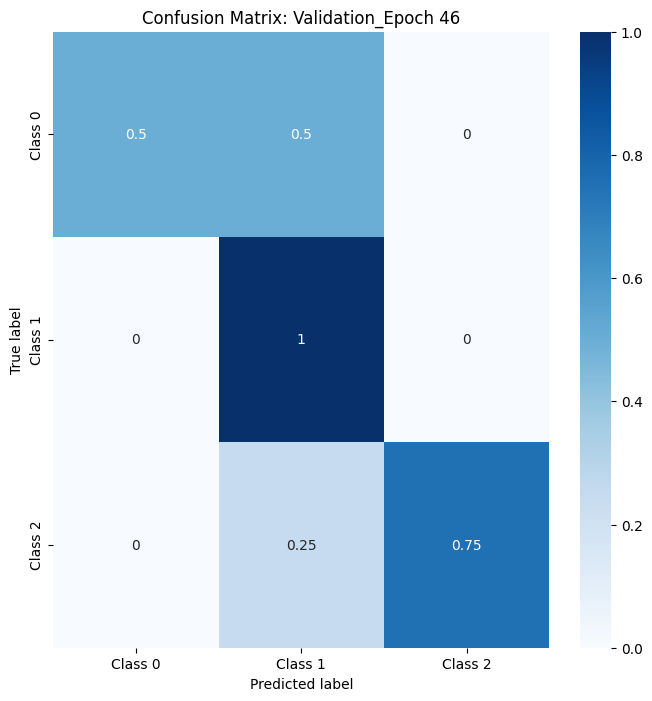

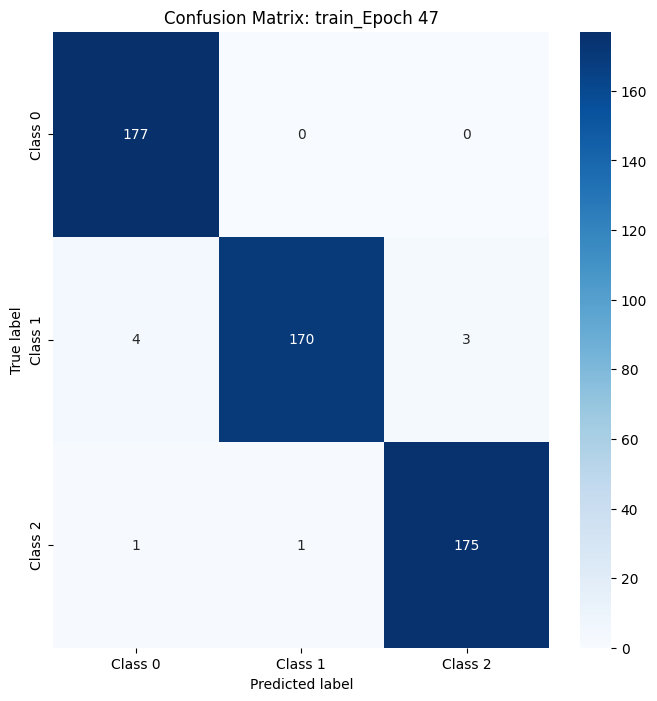

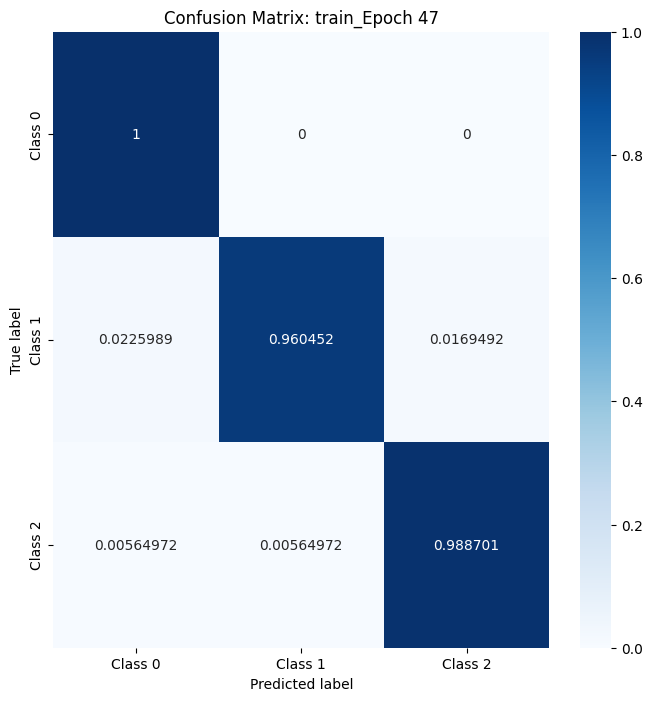

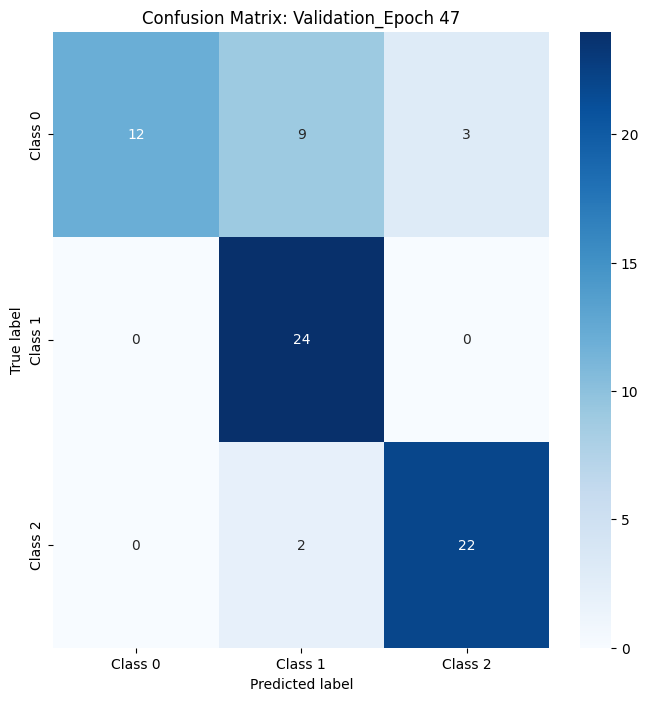

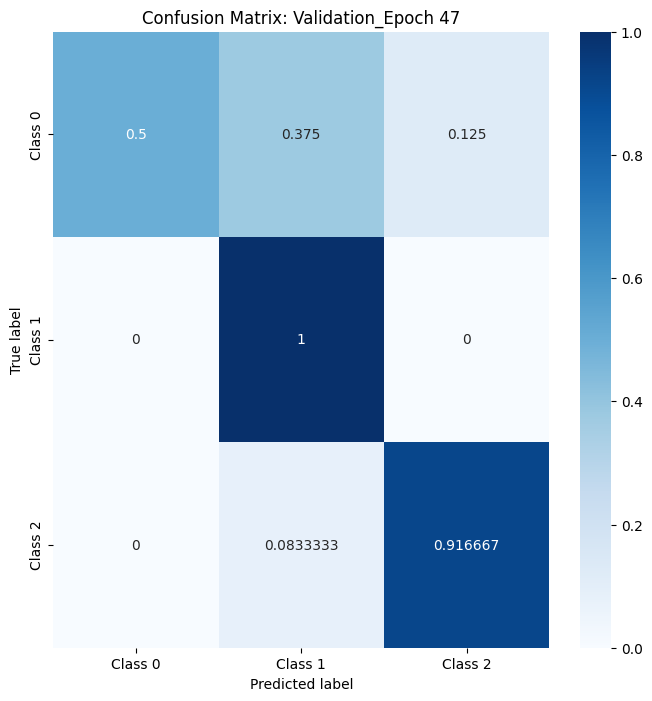

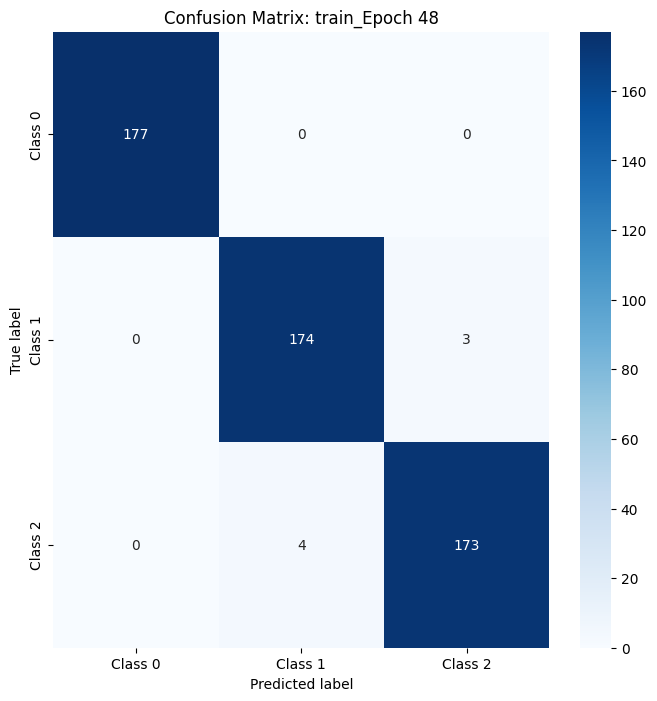

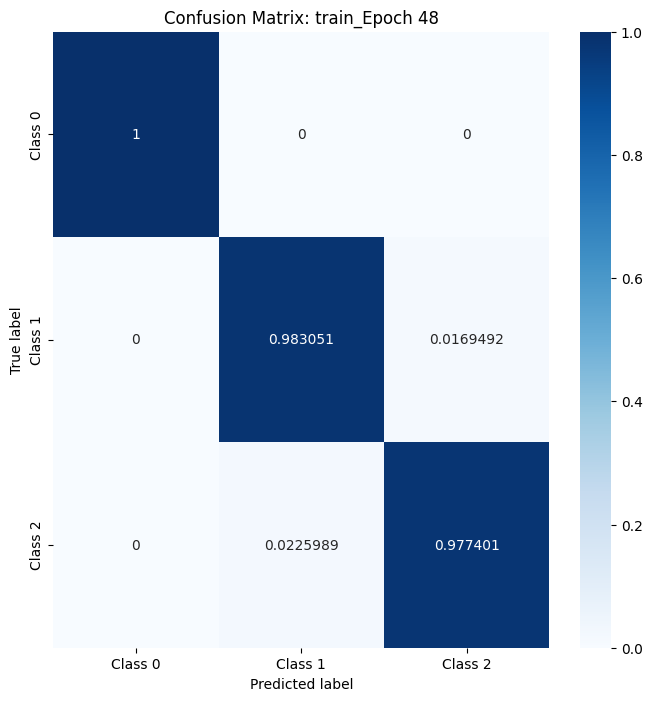

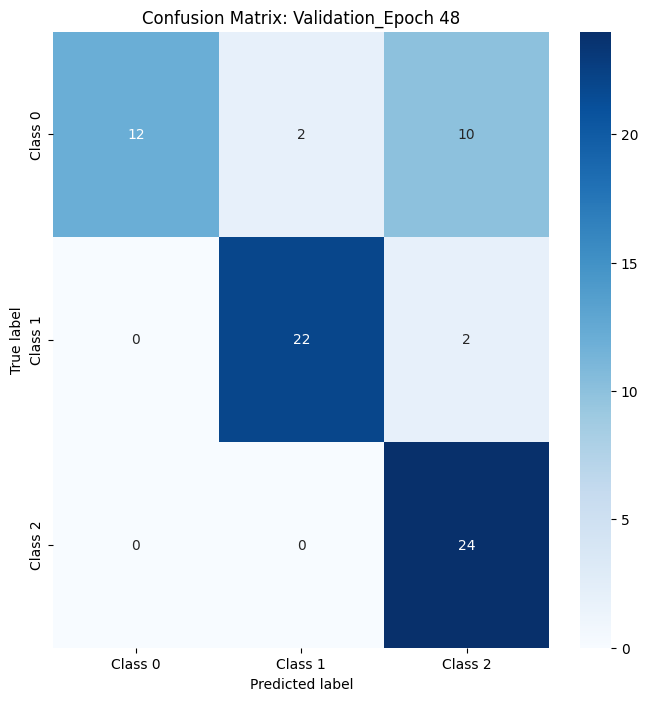

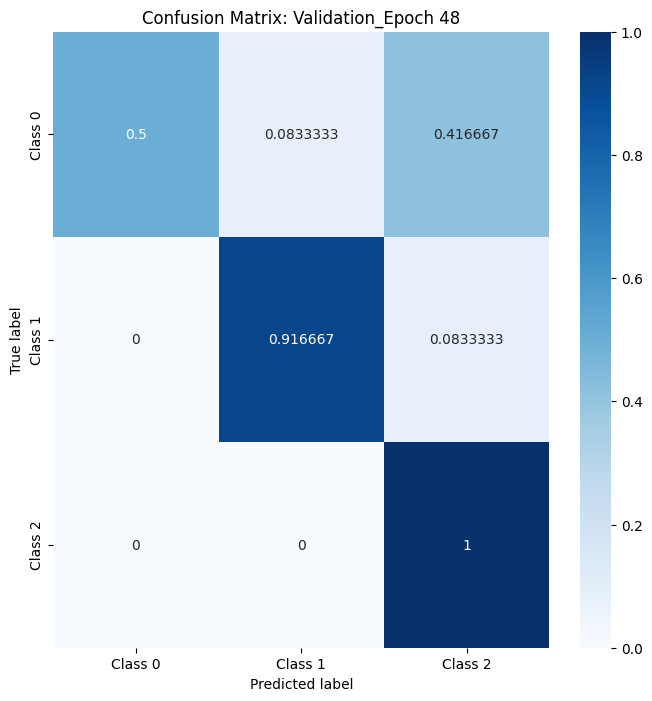

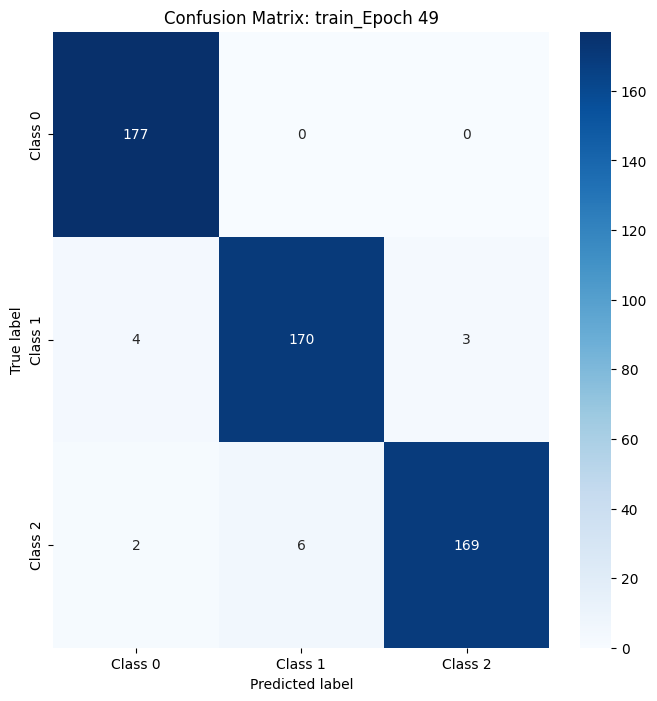

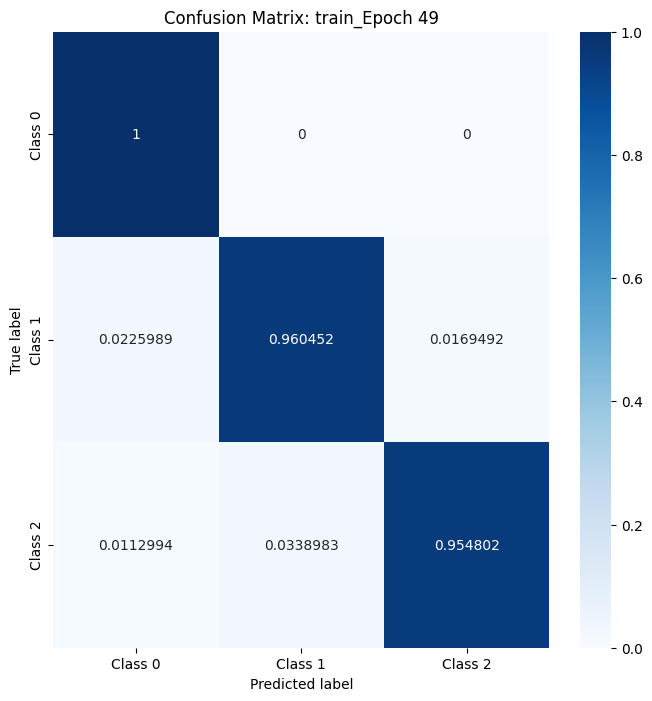

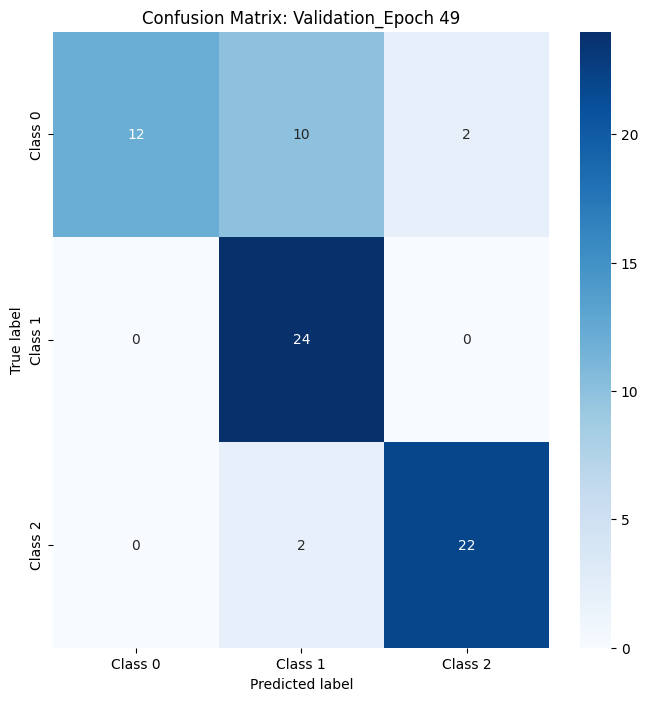

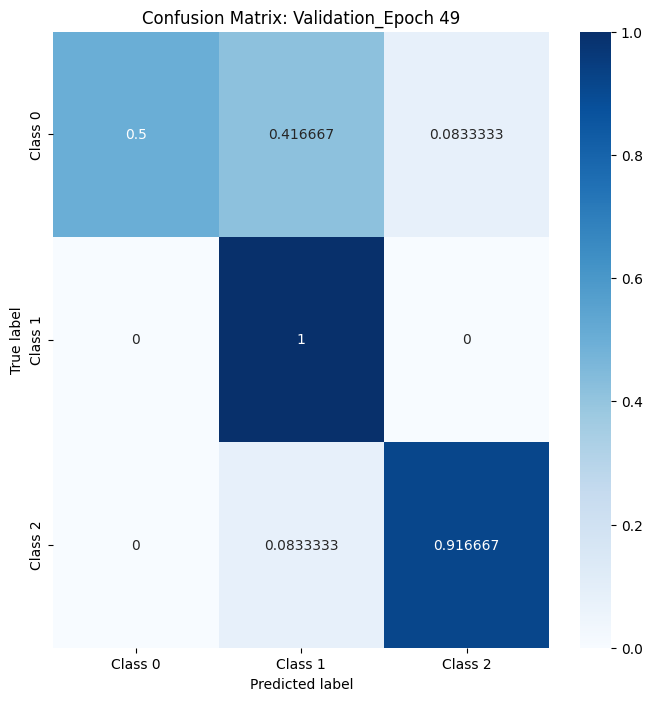

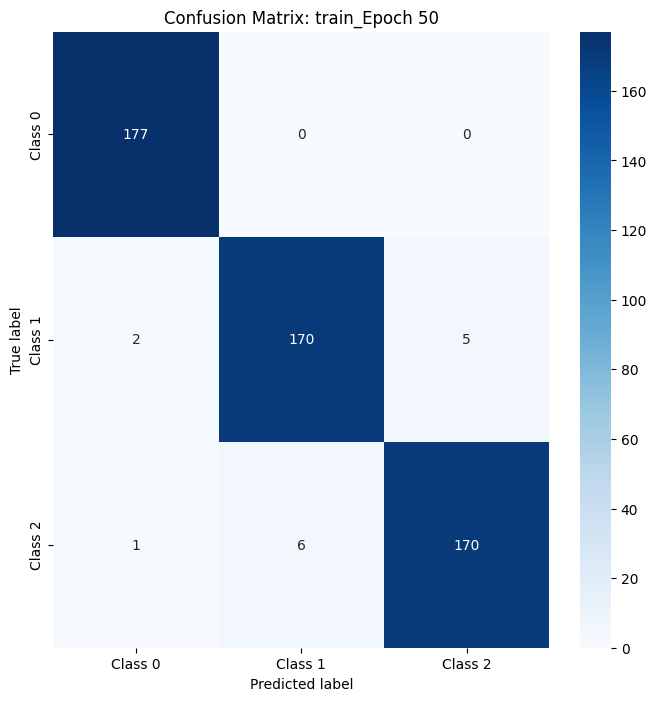

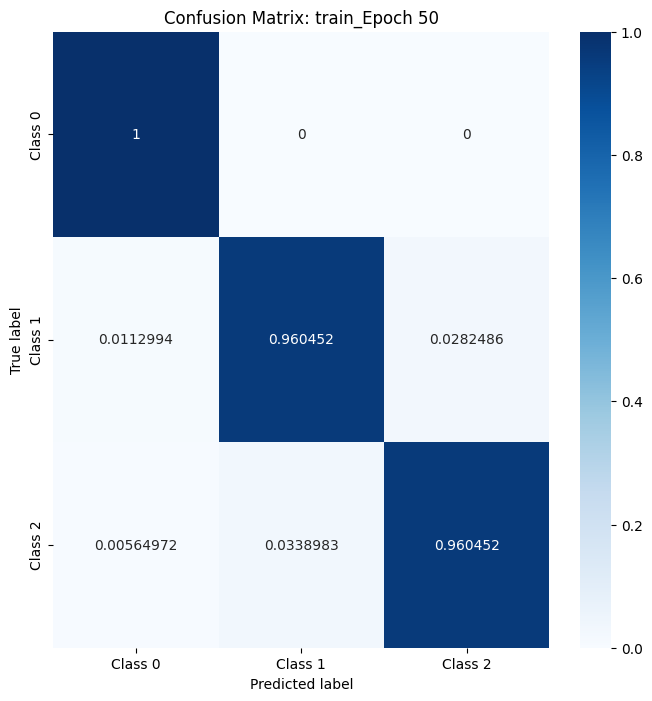

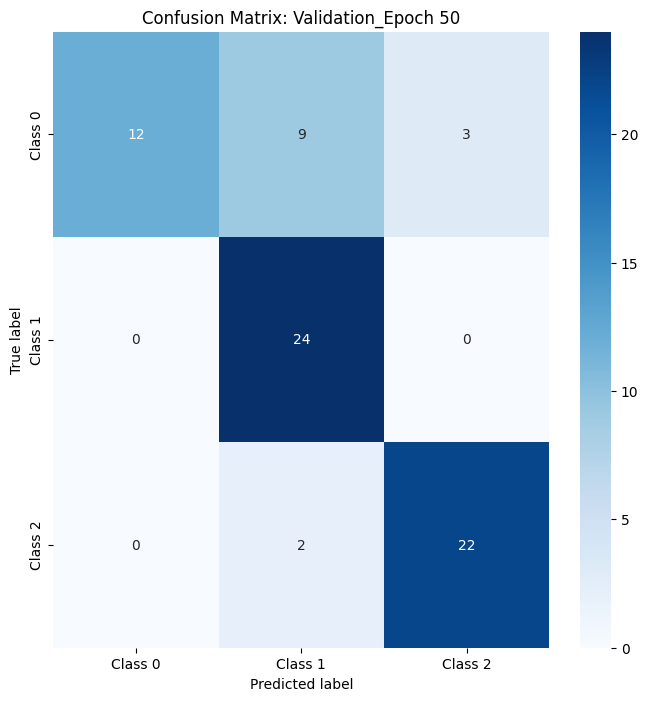

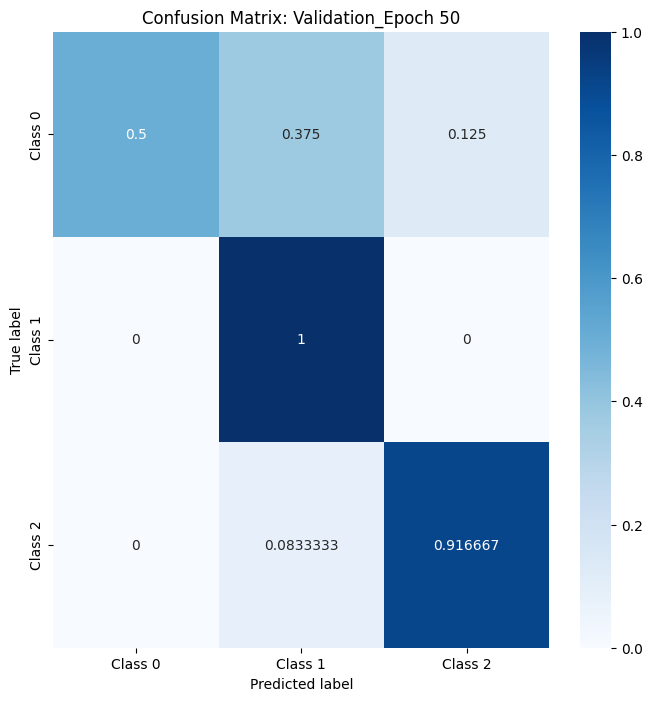

In [7]:
model = run(cfg, model, optimizer,scheduler, criterion, device, train_loader, val_loader,best_accuracy,path='weight_resent50')